In [1]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn.preprocessing import StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# representation of model layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import joblib
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

2025-05-02 12:28:35.815739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746188916.001723      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746188916.058196      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **ĐỌC DỮ LIỆU 34 NHÃN**

📌 Nhãn Mirai-greeth_flood: Thêm 5,042 dòng, tổng cộng 5,042 dòng
📌 Nhãn DDoS-TCP_Flood: Thêm 23,044 dòng, tổng cộng 23,044 dòng
📌 Nhãn DDoS-RSTFINFlood: Thêm 20,625 dòng, tổng cộng 20,625 dòng
📌 Nhãn DDoS-UDP_Flood: Thêm 27,807 dòng, tổng cộng 27,807 dòng
📌 Nhãn DDoS-ICMP_Flood: Thêm 37,281 dòng, tổng cộng 37,281 dòng
📌 Nhãn DDoS-ACK_Fragmentation: Thêm 1,468 dòng, tổng cộng 1,468 dòng
📌 Nhãn DDoS-SynonymousIP_Flood: Thêm 18,637 dòng, tổng cộng 18,637 dòng
📌 Nhãn DDoS-PSHACK_Flood: Thêm 21,226 dòng, tổng cộng 21,226 dòng
📌 Nhãn Mirai-udpplain: Thêm 4,643 dòng, tổng cộng 4,643 dòng
📌 Nhãn DDoS-SYN_Flood: Thêm 20,806 dòng, tổng cộng 20,806 dòng
📌 Nhãn MITM-ArpSpoofing: Thêm 1,603 dòng, tổng cộng 1,603 dòng
📌 Nhãn BenignTraffic: Thêm 5,645 dòng, tổng cộng 5,645 dòng
📌 Nhãn Mirai-greip_flood: Thêm 3,666 dòng, tổng cộng 3,666 dòng
📌 Nhãn DoS-UDP_Flood: Thêm 16,779 dòng, tổng cộng 16,779 dòng
📌 Nhãn DNS_Spoofing: Thêm 969 dòng, tổng cộng 969 dòng
📌 Nhãn DoS-TCP_Flood: Thêm 13,715 dòng, tổng 

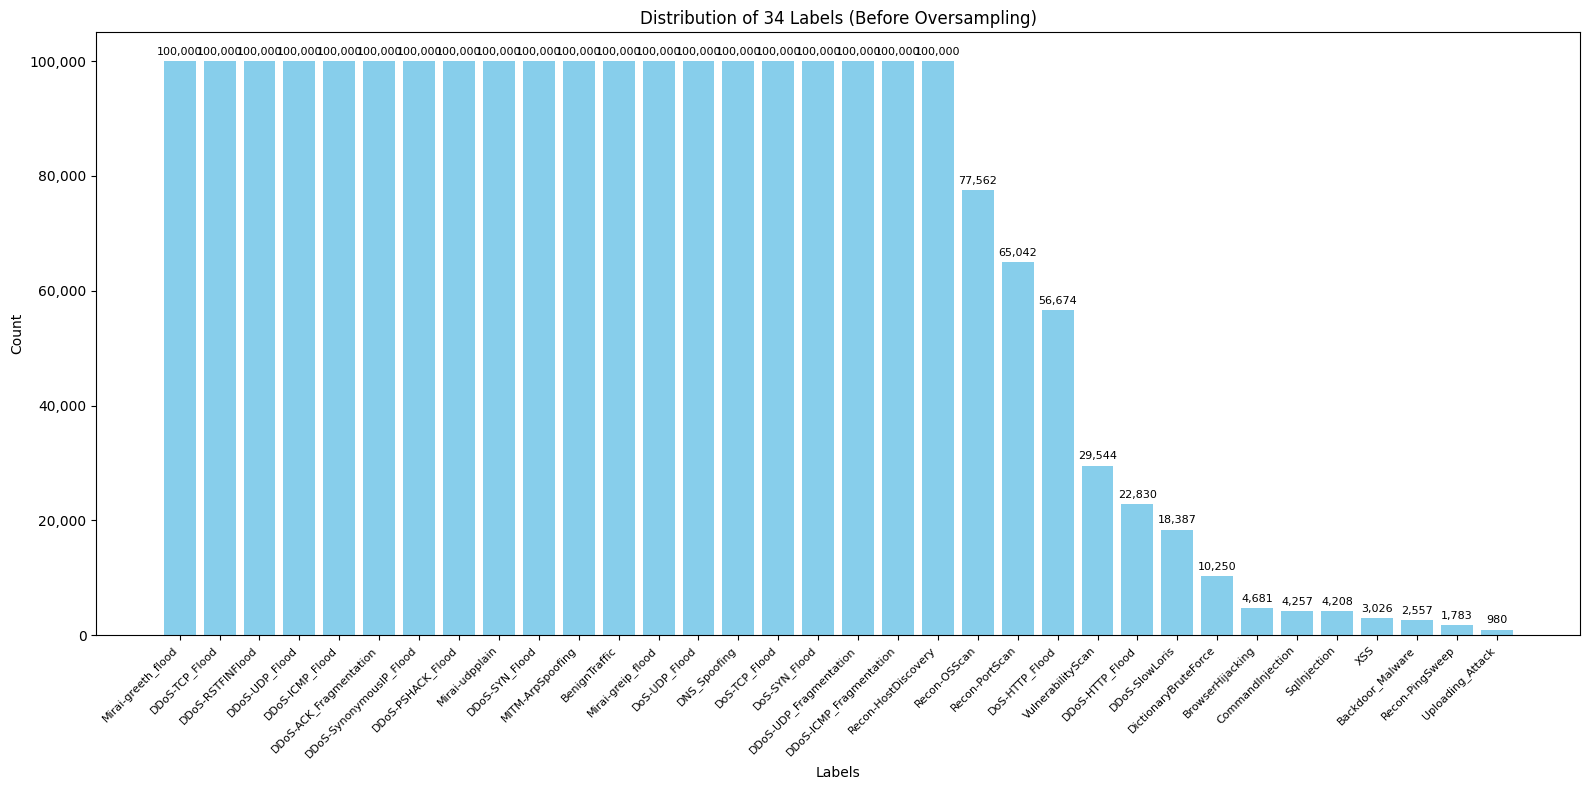

📌 Nhãn Mirai-greeth_flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-TCP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-RSTFINFlood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-UDP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-ICMP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-ACK_Fragmentation: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-SynonymousIP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-PSHACK_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn Mirai-udpplain: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-SYN_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn MITM-ArpSpoofing: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn BenignTraffic: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn Mirai-greip_flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-UDP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DNS_Spoofing: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-TCP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-SYN_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-UDP_Fragmentation: Đã có 100,000 dòng, giữ n

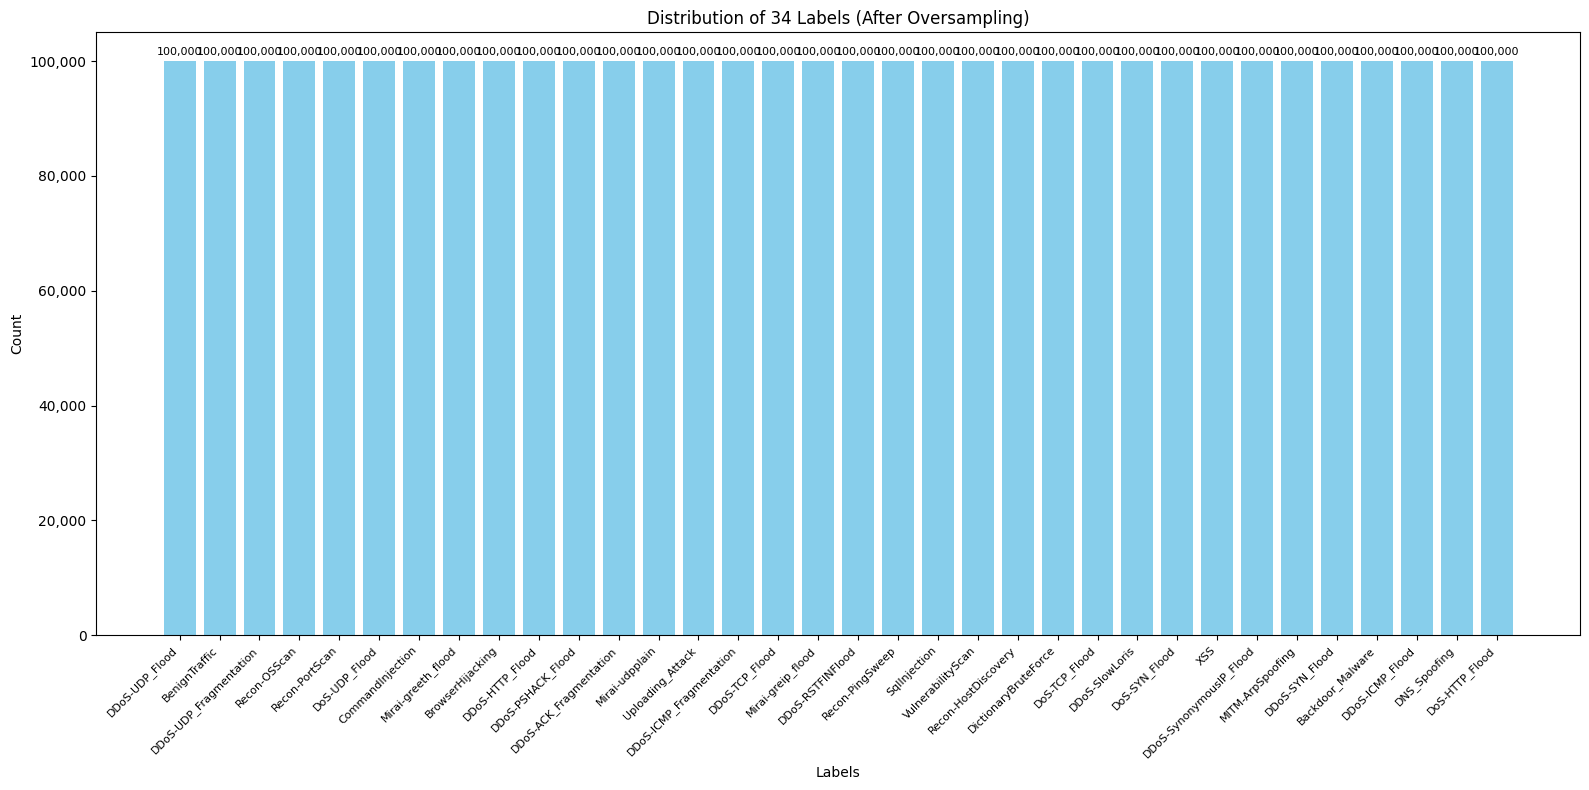

In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import cudf  # Dùng cuDF để xử lý dữ liệu nhanh hơn trên GPU
import numpy as np
from sklearn.utils import resample

# Định nghĩa thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Danh sách 34 nhãn gốc từ CICIoT2023
labels = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Khởi tạo dictionary để theo dõi số dòng của từng nhãn
label_counts = {label: 0 for label in labels}

# Giới hạn tối đa và tối thiểu 200,000 dòng cho mỗi nhãn
MAX_ROWS_PER_LABEL = 100_000
MIN_ROWS_PER_LABEL = 100_000

# Hàm đọc file và lọc dữ liệu
def read_file(filename, index):
    try:
        # Đọc file CSV bằng cuDF
        df = cudf.read_csv(filename)
        
        # Kiểm tra cột 'label'
        if 'label' not in df.columns:
            print(f"❌ File {filename}: Không tìm thấy cột 'label'!")
            return None
        
        # Lọc dữ liệu dựa trên giới hạn 200K cho mỗi nhãn
        valid_rows = []
        unique_labels = df['label'].unique().to_pandas().tolist()
        for label in unique_labels:
            if label not in labels:
                continue  # Bỏ qua nhãn không thuộc danh sách 34 nhãn
            
            current_count = label_counts.get(label, 0)
            remaining_quota = MAX_ROWS_PER_LABEL - current_count
            
            if remaining_quota <= 0:
                print(f"⚠ Nhãn {label} đã đủ {MAX_ROWS_PER_LABEL:,} dòng, không đọc thêm!")
                continue
            
            # Lấy các dòng thuộc nhãn này
            label_df = df[df['label'] == label]
            rows_to_take = min(len(label_df), remaining_quota)
            
            if rows_to_take > 0:
                valid_rows.append(label_df[:rows_to_take])
                label_counts[label] = current_count + rows_to_take
                print(f"📌 Nhãn {label}: Thêm {rows_to_take:,} dòng, tổng cộng {label_counts[label]:,} dòng")
        
        # Gộp các dòng hợp lệ
        if valid_rows:
            df_filtered = cudf.concat(valid_rows, ignore_index=True)
            print(f"📌 File {index}: Giữ {df_filtered.shape[0]:,} dòng sau khi lọc giới hạn")
            return df_filtered
        else:
            print(f"⚠ File {index}: Không có dữ liệu nào được giữ lại!")
            return None
    except Exception as e:
        print(f"❌ Lỗi khi đọc file {filename}: {e}")
        return None

# Đọc dữ liệu từ thư mục
data_dir = "/kaggle/input/cic-iot-2023/"
file_list = glob.glob(f"{data_dir}*.csv")[:134]  # Lấy tối đa 134 file

# Đọc tuần tự từng file
dfs = []
for idx, fname in enumerate(file_list):
    df = read_file(fname, idx)
    if df is not None:
        dfs.append(df)

# Nối dữ liệu và xử lý cân bằng
if dfs:
    df_full = cudf.concat(dfs, ignore_index=True)
    print(f"✅ Dữ liệu đã được nối! Kích thước: {df_full.shape}")
    print(f"📋 Nhãn duy nhất: {df_full['label'].unique().to_pandas().tolist()}")
    
    # Chuyển sang pandas để xử lý oversampling
    df_pandas = df_full.to_pandas()
    
    # Kiểm tra phân bố nhãn trước khi cân bằng
    print("\n📋 Phân bố nhãn trước khi cân bằng:")
    label_distribution = df_pandas["label"].value_counts()
    print(label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn trước khi cân bằng
    fig, ax = plt.subplots(figsize=(16, 8))
    bars = ax.bar(label_distribution.index, label_distribution.values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 34 Labels (Before Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_before_oversampling_34labels.png')
    plt.show()
    
    # Chuẩn bị dữ liệu cho oversampling
    balanced_dfs = []
    unique_labels = df_pandas['label'].unique()
    
    # Áp dụng oversampling thủ công cho mỗi nhãn
    for label in unique_labels:
        if label not in labels:
            continue
        label_df = df_pandas[df_pandas['label'] == label]
        current_count = len(label_df)
        
        if current_count < MIN_ROWS_PER_LABEL:
            # Oversampling bằng resample
            oversampled_df = resample(
                label_df,
                replace=True,  # Cho phép sao chép mẫu
                n_samples=MIN_ROWS_PER_LABEL,  # Đạt 200K
                random_state=42
            )
            print(f"📌 Oversampling nhãn {label}: Từ {current_count:,} lên {MIN_ROWS_PER_LABEL:,} dòng")
            balanced_dfs.append(oversampled_df)
        else:
            print(f"📌 Nhãn {label}: Đã có {current_count:,} dòng, giữ nguyên")
            balanced_dfs.append(label_df)
    
    # Gộp dữ liệu đã cân bằng
    df_balanced = pd.concat(balanced_dfs, ignore_index=True)
    
    # Chuyển lại thành cuDF để đồng bộ
    df_full = cudf.from_pandas(df_balanced)
    
    # Kiểm tra phân bố nhãn sau khi cân bằng
    print("\n📋 Phân bố nhãn sau khi cân bằng bằng oversampling:")
    balanced_label_distribution = df_full["label"].value_counts().to_pandas()
    print(balanced_label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn sau khi cân bằng
    fig, ax = plt.subplots(figsize=(16, 8))
    bars = ax.bar(balanced_label_distribution.index, balanced_label_distribution.values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 34 Labels (After Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_after_oversampling_34labels.png')
    plt.show()
    
   
    
else:
    print("⚠ Không có file nào được đọc thành công hoặc tất cả dữ liệu rỗng!")

# **ÁNH XẠ NHÃN**

📋 Nhãn duy nhất trong dữ liệu: ['Mirai-greeth_flood', 'DDoS-TCP_Flood', 'DDoS-RSTFINFlood', 'DDoS-UDP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ACK_Fragmentation', 'DDoS-SynonymousIP_Flood', 'DDoS-PSHACK_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood', 'MITM-ArpSpoofing', 'BenignTraffic', 'Mirai-greip_flood', 'DoS-UDP_Flood', 'DNS_Spoofing', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DDoS-UDP_Fragmentation', 'DDoS-ICMP_Fragmentation', 'Recon-OSScan', 'Recon-HostDiscovery', 'Recon-PortScan', 'DoS-HTTP_Flood', 'VulnerabilityScan', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'DictionaryBruteForce', 'CommandInjection', 'SqlInjection', 'BrowserHijacking', 'Backdoor_Malware', 'Recon-PingSweep', 'XSS', 'Uploading_Attack']
📌 Số đặc trưng được chọn: 46
⚠️ Cảnh báo: Tìm thấy 46 đặc trưng, kỳ vọng 45 đặc trưng sau khi loại bỏ 'label'!
📊 Ánh xạ nhãn (34 nhãn): {'Backdoor_Malware': 0, 'BenignTraffic': 1, 'BrowserHijacking': 2, 'CommandInjection': 3, 'DDoS-ACK_Fragmentation': 4, 'DDoS-HTTP_Flood': 5, 'DDoS-ICMP_Flood': 6, 'DDoS

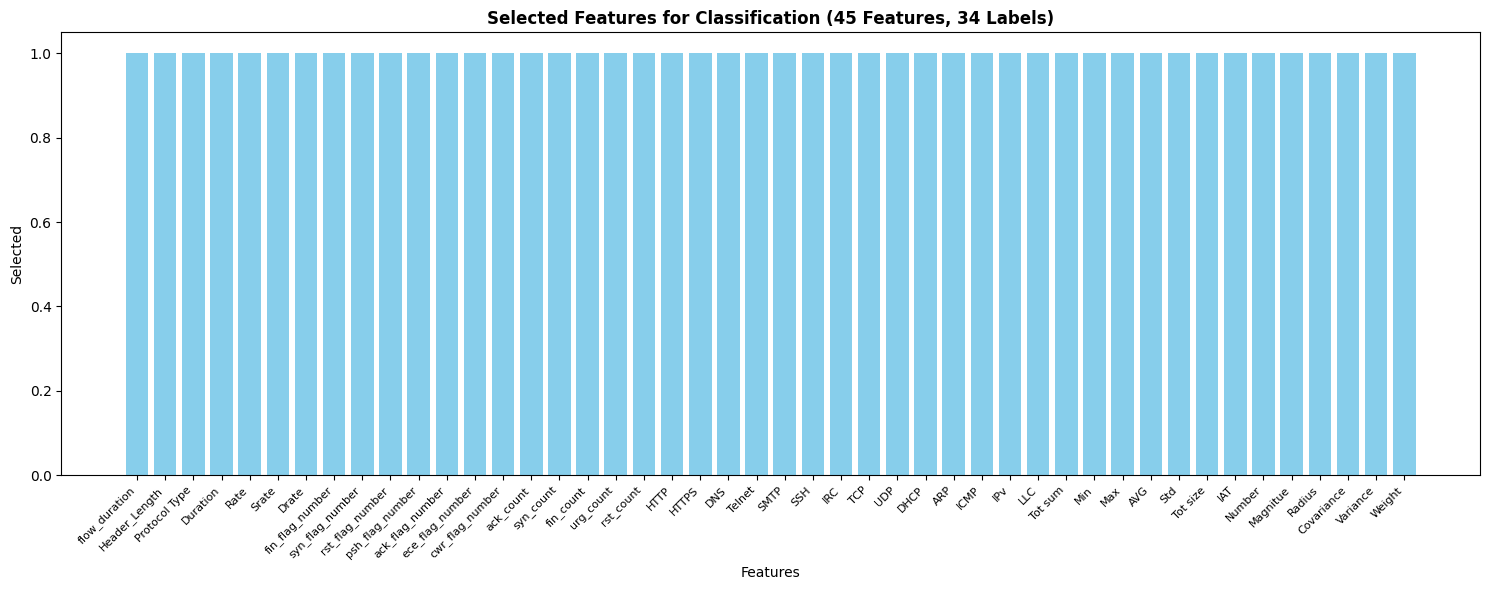

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
import pickle
import os
import matplotlib.pyplot as plt

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full là DataFrame từ cell đọc dữ liệu trước đó (cuDF)
# Chuyển từ cuDF sang Pandas
df_original = df_full.to_pandas()

# Kiểm tra dữ liệu đầu vào
if df_original.empty or 'label' not in df_original.columns:
    raise ValueError("❌ Dữ liệu đầu vào rỗng hoặc thiếu cột 'label'!")

# Xử lý giá trị thiếu cho cột số
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# Kiểm tra nhãn duy nhất
print("📋 Nhãn duy nhất trong dữ liệu:", y.unique().tolist())
if len(y.unique()) != 34:
    print(f"⚠️ Cảnh báo: Tìm thấy {len(y.unique())} nhãn, kỳ vọng 34 nhãn!")

# Lấy tất cả đặc trưng (loại bỏ cột 'label')
selected_features = list(X.columns)
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
if len(selected_features) != 45:
    print(f"⚠️ Cảnh báo: Tìm thấy {len(selected_features)} đặc trưng, kỳ vọng 45 đặc trưng sau khi loại bỏ 'label'!")

# Kiểm tra xem các đặc trưng có tồn tại trong dữ liệu không
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại trong dữ liệu: {missing_features}")

# Lấy chỉ số của các đặc trưng
feature_indices = [list(X.columns).index(f) for f in selected_features]

# Áp dụng các đặc trưng (giữ nguyên toàn bộ 45 đặc trưng)
X = X[selected_features]

# Chia dữ liệu thành tập train, val, test
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Mã hóa nhãn (34 nhãn gốc)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("📊 Ánh xạ nhãn (34 nhãn):", label_mapping)

# Kiểm tra phân bố nhãn
print("\n📊 Phân bố nhãn trong tập huấn luyện:")
print(pd.Series(Y_train_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập validation:")
print(pd.Series(Y_val_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập kiểm tra:")
print(pd.Series(Y_test_encoded).value_counts().rename(label_mapping))

# Xử lý NaN và outlier bằng KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Kiểm tra giá trị sau khi chọn đặc trưng
print("🔍 Giá trị tối đa và tối thiểu trong X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_val_scaled:")
print(pd.DataFrame(X_val_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_test_scaled:")
print(pd.DataFrame(X_test_scaled, columns=selected_features).describe().loc[['min', 'max']])

# Lưu dữ liệu đã xử lý
np.save(f"{output_dir}/X_train_scaled_34labels.npy", X_train_scaled)
np.save(f"{output_dir}/Y_train_encoded_34labels.npy", Y_train_encoded)
np.save(f"{output_dir}/X_val_scaled_34labels.npy", X_val_scaled)
np.save(f"{output_dir}/Y_val_encoded_34labels.npy", Y_val_encoded)
np.save(f"{output_dir}/X_test_scaled_34labels.npy", X_test_scaled)
np.save(f"{output_dir}/Y_test_encoded_34labels.npy", Y_test_encoded)

# Lưu các đối tượng xử lý
with open(f"{output_dir}/label_encoder_34labels.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_34labels.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_34labels.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_34labels.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

# In thông tin chi tiết
print(f"✅ Dữ liệu đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
print(f"📋 Các đặc trưng được chọn: {selected_features}")

# Vẽ biểu đồ danh sách đặc trưng được chọn
plt.figure(figsize=(15, 6))  # Tăng kích thước để hiển thị 45 đặc trưng
plt.bar(selected_features, [1] * len(selected_features), color='skyblue')
plt.title('Selected Features for Classification (45 Features, 34 Labels)', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Selected', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_34labels.png")
plt.show()

# **CHUYỂN ĐỔI ĐẶC TRƯNG FUZZY**

In [4]:
import numpy as np
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import os

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Tải dữ liệu đã xử lý
X_train_scaled = np.load(f"{output_dir}/X_train_scaled_34labels.npy")
Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
X_val_scaled = np.load(f"{output_dir}/X_val_scaled_34labels.npy")
Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
X_test_scaled = np.load(f"{output_dir}/X_test_scaled_34labels.npy")
Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")

# Kiểm tra shape dữ liệu
print(f"📌 Shape dữ liệu: train {X_train_scaled.shape}, val {X_val_scaled.shape}, test {X_test_scaled.shape}")
if X_train_scaled.shape[1] != 46:
    raise ValueError(f"❌ Số đặc trưng không phải 46, tìm thấy {X_train_scaled.shape[1]} đặc trưng!")
if len(np.unique(Y_train_encoded)) != 34:
    raise ValueError(f"❌ Số nhãn không phải 34, tìm thấy {len(np.unique(Y_train_encoded))} nhãn!")

# Chia 46 đặc trưng thành 5 nhóm (4 nhóm 9 đặc trưng, 1 nhóm 10 đặc trưng)
n_groups = 5
base_group_size = 46 // n_groups  # 9 đặc trưng mỗi nhóm
remainder = 46 % n_groups  # 1 đặc trưng dư
group_sizes = [base_group_size + 1 if i < remainder else base_group_size for i in range(n_groups)]
group_boundaries = np.cumsum([0] + group_sizes)
X_train_grouped = []
X_val_grouped = []
X_test_grouped = []

print("🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...")
for i in range(n_groups):
    start_idx = group_boundaries[i]
    end_idx = group_boundaries[i + 1]
    X_train_group = X_train_scaled[:, start_idx:end_idx]  # Shape: [n_samples, 9 hoặc 10]
    X_val_group = X_val_scaled[:, start_idx:end_idx]
    X_test_group = X_test_scaled[:, start_idx:end_idx]

    # Kiểm tra shape của nhóm
    print(f"Nhóm {i+1}: Shape X_train_group: {X_train_group.shape}")

    # Huấn luyện XGBoost trên nhóm đặc trưng
    xgb = XGBClassifier(
        n_estimators=50,
        max_depth=8,
        min_child_weight=10,
        tree_method="hist",
        device="cuda",
        random_state=42,
        objective="multi:softprob",
        num_class=34
    )
    xgb.fit(X_train_group, Y_train_encoded)

    # Tạo xác suất dự đoán
    train_probs = xgb.predict_proba(X_train_group)  # Shape: [n_samples, 34]
    val_probs = xgb.predict_proba(X_val_group)
    test_probs = xgb.predict_proba(X_test_group)

    X_train_grouped.append(train_probs)
    X_val_grouped.append(val_probs)
    X_test_grouped.append(test_probs)

    # Lưu mô hình XGBoost
    joblib.dump(xgb, f"{output_dir}/xgb_group_{i}_34labels.joblib")
    print(f"✅ Đã xử lý nhóm {i+1}/{n_groups}")

# Gộp đặc trưng xác suất
X_train_grouped = np.concatenate(X_train_grouped, axis=1)  # Shape: [n_samples, 5*34 = 170]
X_val_grouped = np.concatenate(X_val_grouped, axis=1)
X_test_grouped = np.concatenate(X_test_grouped, axis=1)

# Kiểm tra shape sau khi gộp
print(f"📌 Shape X_train_grouped: {X_train_grouped.shape}")

# Kết hợp với top-k đặc trưng gốc
k = 10  # Chọn 10 đặc trưng quan trọng nhất
xgb_full = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    min_child_weight=10,
    tree_method="hist",
    device="cuda",
    random_state=42,
    objective="multi:softprob",
    num_class=34
)
xgb_full.fit(X_train_scaled, Y_train_encoded)
feature_importance = xgb_full.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:k]

# Kết hợp đặc trưng xác suất và đặc trưng gốc
X_train_combined = np.concatenate([X_train_grouped, X_train_scaled[:, sorted_idx]], axis=1)  # Shape: [n_samples, 170+10 = 180]
X_val_combined = np.concatenate([X_val_grouped, X_val_scaled[:, sorted_idx]], axis=1)
X_test_combined = np.concatenate([X_test_grouped, X_test_scaled[:, sorted_idx]], axis=1)

# Kiểm tra shape sau khi kết hợp
print(f"📌 Shape X_train_combined: {X_train_combined.shape}")

# Chuẩn hóa lại dữ liệu
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_val_combined = scaler.transform(X_val_combined)
X_test_combined = scaler.transform(X_test_combined)

# Lưu dữ liệu
np.save(f"{output_dir}/X_train_combined_34labels.npy", X_train_combined)
np.save(f"{output_dir}/X_val_combined_34labels.npy", X_val_combined)
np.save(f"{output_dir}/X_test_combined_34labels.npy", X_test_combined)
joblib.dump(scaler, f"{output_dir}/scaler_combined_34labels.joblib")

# In thông tin
print(f"✅ Đã tạo đặc trưng kết hợp!")
print(f"📌 Shape: train {X_train_combined.shape}, val {X_val_combined.shape}, test {X_test_combined.shape}")
print(f"📌 Số đặc trưng: {X_train_combined.shape[1]} (170 xác suất + 10 gốc)")
print(f"📌 Top-10 đặc trưng gốc (chỉ số): {sorted_idx}")

📌 Shape dữ liệu: train (2210000, 46), val (510000, 46), test (680000, 46)
🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...
Nhóm 1: Shape X_train_group: (2210000, 10)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [12:34:02] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


✅ Đã xử lý nhóm 1/5
Nhóm 2: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 2/5
Nhóm 3: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 3/5
Nhóm 4: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 4/5
Nhóm 5: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 5/5
📌 Shape X_train_grouped: (2210000, 170)
📌 Shape X_train_combined: (2210000, 180)
✅ Đã tạo đặc trưng kết hợp!
📌 Shape: train (2210000, 180), val (510000, 180), test (680000, 180)
📌 Số đặc trưng: 180 (170 xác suất + 10 gốc)
📌 Top-10 đặc trưng gốc (chỉ số): [ 7 30 24  8 39 45 10 31 19 41]


# **LẤY ĐẶC TRƯNG GIẢM CHIỀU FUZZY BẰNG PCA**

In [ ]:
!pip install dask

In [ ]:
import pandas as pd
import numpy as np
import time
import gc
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from tqdm import tqdm
import joblib
import pickle
import os
import matplotlib.pyplot as plt
import dask.array as da
import torch  # Để xử lý dữ liệu trên GPU

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full đã được đọc trước đó
df_original = df_full.to_pandas()

# Xử lý giá trị thiếu
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# 30 đặc trưng đã chọn
selected_features = [
    'IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 
    'Protocol Type', 'rst_count', 'Weight', 'Number', 'Variance', 'Std', 'Radius', 
    'Covariance', 'Duration', 'urg_count', 'flow_duration', 'Rate', 'Srate', 'TCP', 
    'ack_flag_number', 'syn_count', 'HTTPS', 'ack_count', 'syn_flag_number', 'ICMP', 
    'fin_count', 'UDP'
]

# Kiểm tra đặc trưng
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại: {missing_features}")

X = X[selected_features]
selected_indices = [list(X.columns).index(f) for f in selected_features]

# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Lưu số mẫu để dùng sau
np.save(f"{output_dir}/n_train_samples.npy", X_train.shape[0])
np.save(f"{output_dir}/n_val_samples.npy", X_val.shape[0])
np.save(f"{output_dir}/n_test_samples.npy", X_test.shape[0])

# Mã hóa nhãn
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Xử lý NaN và chuẩn hóa
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Giải phóng bộ nhớ
del df_original, X, y, X_temp, Y_temp, X_train, X_val, X_test, Y_train, Y_val, Y_test
del X_train_imputed, X_val_imputed, X_test_imputed
gc.collect()

# Hàm xử lý fuzzy theo batch với Dask
def convert_to_fuzzy_features_xgb_batch(X_train, Y_train, X_val, X_test, selected_features, selected_indices, n_labels=34, n_estimators=50, batch_size=6):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train_fuzzy_batches = []
    X_val_fuzzy_batches = []
    X_test_fuzzy_batches = []

    for batch_start in tqdm(range(0, len(selected_indices), batch_size), desc="Xử lý batch đặc trưng fuzzy"):
        batch_indices = selected_indices[batch_start:batch_start + batch_size]
        batch_features = selected_features[batch_start:batch_start + batch_size]
        
        X_train_fuzzy_batch = []
        X_val_fuzzy_batch = []
        X_test_fuzzy_batch = []

        for idx, i in enumerate(batch_indices):
            # Chuyển dữ liệu sang GPU
            X_train_feature = torch.tensor(X_train[:, i].reshape(-1, 1), dtype=torch.float32).to(device)
            X_val_feature = torch.tensor(X_val[:, i].reshape(-1, 1), dtype=torch.float32).to(device)
            X_test_feature = torch.tensor(X_test[:, i].reshape(-1, 1), dtype=torch.float32).to(device)

            xgb = XGBClassifier(
                n_estimators=n_estimators,
                max_depth=10,
                min_child_weight=10,
                tree_method="hist",
                device="cuda",
                random_state=44,
                objective="multi:softprob"
            )
            # Huấn luyện trên CPU vì XGBoost yêu cầu NumPy array
            xgb.fit(X_train_feature.cpu().numpy(), Y_train)

            # Dự đoán trên CPU
            train_probs = xgb.predict_proba(X_train_feature.cpu().numpy()).astype(np.float32)
            val_probs = xgb.predict_proba(X_val_feature.cpu().numpy()).astype(np.float32)
            test_probs = xgb.predict_proba(X_test_feature.cpu().numpy()).astype(np.float32)

            if train_probs.shape[1] < n_labels:
                missing_labels = n_labels - train_probs.shape[1]
                train_probs = np.pad(train_probs, ((0, 0), (0, missing_labels)), mode='constant')
                val_probs = np.pad(val_probs, ((0, 0), (0, missing_labels)), mode='constant')
                test_probs = np.pad(test_probs, ((0, 0), (0, missing_labels)), mode='constant')

            X_train_fuzzy_batch.append(train_probs)
            X_val_fuzzy_batch.append(val_probs)
            X_test_fuzzy_batch.append(test_probs)

            joblib.dump(xgb, f"{output_dir}/xgb_feature_{batch_features[idx]}_34labels.joblib")

        X_train_fuzzy_batch = np.concatenate(X_train_fuzzy_batch, axis=1)
        X_val_fuzzy_batch = np.concatenate(X_val_fuzzy_batch, axis=1)
        X_test_fuzzy_batch = np.concatenate(X_test_fuzzy_batch, axis=1)

        np.savez_compressed(
            f"{output_dir}/X_train_fuzzy_batch_{batch_start//batch_size}.npz",
            X_train_fuzzy_batch=X_train_fuzzy_batch
        )
        np.savez_compressed(
            f"{output_dir}/X_val_fuzzy_batch_{batch_start//batch_size}.npz",
            X_val_fuzzy_batch=X_val_fuzzy_batch
        )
        np.savez_compressed(
            f"{output_dir}/X_test_fuzzy_batch_{batch_start//batch_size}.npz",
            X_test_fuzzy_batch=X_test_fuzzy_batch
        )

        del X_train_fuzzy_batch, X_val_fuzzy_batch, X_test_fuzzy_batch
        gc.collect()
        torch.cuda.empty_cache()

    # Sử dụng Dask để nối các batch
    X_train_fuzzy_chunks = []
    X_val_fuzzy_chunks = []
    X_test_fuzzy_chunks = []
    for batch_idx in range(0, len(selected_indices), batch_size):
        batch_data = np.load(f"{output_dir}/X_train_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_train_fuzzy_chunks.append(da.from_array(batch_data['X_train_fuzzy_batch'], chunks=(10000, -1)))
        batch_data = np.load(f"{output_dir}/X_val_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_val_fuzzy_chunks.append(da.from_array(batch_data['X_val_fuzzy_batch'], chunks=(10000, -1)))
        batch_data = np.load(f"{output_dir}/X_test_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_test_fuzzy_chunks.append(da.from_array(batch_data['X_test_fuzzy_batch'], chunks=(10000, -1)))

    X_train_fuzzy = da.concatenate(X_train_fuzzy_chunks, axis=1)
    X_val_fuzzy = da.concatenate(X_val_fuzzy_chunks, axis=1)
    X_test_fuzzy = da.concatenate(X_test_fuzzy_chunks, axis=1)

    # Lưu Dask array thành stack của các file .npy
    train_stack_dir = f"{output_dir}/X_train_fuzzy_stack"
    val_stack_dir = f"{output_dir}/X_val_fuzzy_stack"
    test_stack_dir = f"{output_dir}/X_test_fuzzy_stack"
    os.makedirs(train_stack_dir, exist_ok=True)
    os.makedirs(val_stack_dir, exist_ok=True)
    os.makedirs(test_stack_dir, exist_ok=True)

    da.to_npy_stack(train_stack_dir, X_train_fuzzy, axis=0)
    da.to_npy_stack(val_stack_dir, X_val_fuzzy, axis=0)
    da.to_npy_stack(test_stack_dir, X_test_fuzzy, axis=0)

    # Tùy chọn: Chuyển về single .npy file nếu RAM đủ
    try:
        X_train_fuzzy = X_train_fuzzy.compute()
        X_val_fuzzy = X_val_fuzzy.compute()
        X_test_fuzzy = X_test_fuzzy.compute()

        # Lưu vào file .npy
        np.save(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy", X_train_fuzzy)
        np.save(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy", X_val_fuzzy)
        np.save(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy", X_test_fuzzy)
    except MemoryError:
        print("⚠️ RAM không đủ để compute Dask array. Sử dụng stack .npy files hoặc custom DataLoader.")

    return X_train_fuzzy, X_val_fuzzy, X_test_fuzzy

# Tính đặc trưng fuzzy
start_time = time.time()
X_train_fuzzy, X_val_fuzzy, X_test_fuzzy = convert_to_fuzzy_features_xgb_batch(
    X_train_scaled, Y_train_encoded, X_val_scaled, X_test_scaled,
    selected_features=selected_features, selected_indices=selected_indices, n_labels=34, batch_size=6
)
print(f"⏱ Thời gian xử lý: {time.time() - start_time:.2f}s")

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        print(f"⚠️ {name} chứa giá trị NaN hoặc Inf")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Lưu dữ liệu
np.save(f"{output_dir}/Y_train_encoded_34labels.npy", Y_train_encoded)
np.save(f"{output_dir}/Y_val_encoded_34labels.npy", Y_val_encoded)
np.save(f"{output_dir}/Y_test_encoded_34labels.npy", Y_test_encoded)

# Lưu các đối tượng
with open(f"{output_dir}/label_encoder_34labels.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_34labels.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_34labels.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_34labels.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

print(f"✅ Dữ liệu fuzzy đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng fuzzy: 1020 (30 đặc trưng × 34 nhãn)")
print(f"📋 Đặc trưng được sử dụng: {selected_features}")

# Vẽ biểu đồ đặc trưng
plt.figure(figsize=(15, 5))
plt.bar(selected_features, [1] * len(selected_features), color='lightblue')
plt.title('30 Đặc trưng cho Biến đổi Fuzzy (34 Nhãn)', fontsize=12, fontweight='bold')
plt.xlabel('Đặc trưng', fontsize=10)
plt.ylabel('Đã chọn', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_34labels.png")
plt.show()

# **MÔ HÌNH DCN-V2 FUZZY ĐẶC TRƯNG**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# CrossLayer
class CrossLayer(nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(input_dim))
        self.norm = nn.LayerNorm(input_dim)
        nn.init.xavier_normal_(self.weight, gain=0.1)
        nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        assert x_0.dim() == 2 and x_l.dim() == 2, f"Expected 2D tensors, got x_0: {x_0.shape}, x_l: {x_l.shape}"
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

# DCNV2
class DCNV2(nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.cross_layers = nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                nn.Linear(prev_dim, deep_layer_dim),
                nn.BatchNorm1d(deep_layer_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = nn.Sequential(*deep_layers)
        self.combine_fc = nn.Linear(input_dim + deep_layer_dim, num_classes)
        nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for i, layer in enumerate(self.cross_layers):
            x_cross = layer(x_0, x_cross)
            if torch.isnan(x_cross).any():
                tqdm.write(f"NaN detected in CrossLayer {i+1}")
                break
        x_deep = self.deep(x)
        if torch.isnan(x_deep).any():
            tqdm.write("NaN detected in Deep layers")
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy (10 đặc trưng fuzzy, 34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")  # Shape: (n_train, 340)
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")      # Shape: (n_val, 340)
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")    # Shape: (n_test, 340)
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 2048  # Giảm batch_size để tiết kiệm VRAM
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded, minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_fuzzy.shape[1]  # 10*34 = 340
model = DCNV2(input_dim=input_dim, num_classes=34, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện DCN-V2 với Focal + Sparsity Loss (Không Early Stopping)")
torch.manual_seed(44)
accumulation_steps = 2  # Tích lũy gradient qua 2 bước
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0  # Khởi tạo mặc định
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_fuzzy_top10.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_fuzzy_top10_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/dcnv2_34labels_fuzzy_top10_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_34labels_fuzzy_top10_dcnv2.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_top10_dcnv2.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_top10_dcnv2.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_top10_dcnv2.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_top10_dcnv2.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_top10_dcnv2.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_top10_dcnv2.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_top10_dcnv2.npy", np.array(epoch_times))

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/dcnv2_34labels_fuzzy_top10.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_top10_dcnv2.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_top10_dcnv2.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_top10_dcnv2.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_top10_dcnv2.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_top10_dcnv2.npy", avg_mask)

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file
with open(f"{results_dir}/DCN-v2_34labels_fuzzy_top10.txt", 'w') as f:
    f.write("Kết quả huấn luyện DCN-V2 (34 nhãn, 10 đặc trưng fuzzy)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/DCN-v2_34labels_fuzzy_top10.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_top10_dcnv2.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_top10_dcnv2.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_top10_dcnv2.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_top10_dcnv2.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_top10_dcnv2.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_top10_dcnv2.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_top10_dcnv2.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_top10_dcnv2.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_top10_dcnv2.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_top10_dcnv2.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho DCN-V2 (34 nhãn, fuzzy top 10)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("DCN-V2: Learning Curves (34 Labels, Fuzzy Top 10)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_dcnv2_34labels_fuzzy_top10.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("DCN-V2: Confusion Matrix (Test, 34 Labels, Fuzzy Top 10)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_dcnv2_34labels_fuzzy_top10.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("DCN-V2: ROC Curve (All 34 Labels, Fuzzy Top 10, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_dcnv2_34labels_fuzzy_top10_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("DCN-V2: PCA 3D Visualization (34 Labels, Fuzzy Top 10)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_dcnv2_34labels_fuzzy_top10.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("DCN-V2: Top 20 Feature Importance (34 Labels, Fuzzy Top 10)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_dcnv2_34labels_fuzzy_top10.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH TABR**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Retrieval-Augmented Layer
class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=self.k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, self.k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

# TabR
class TabR(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, n_layers=2, n_heads=4, ff_dim=128, dropout=0.1, k_neighbors=5):
        super(TabR, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)  # Sửa lỗi: thay 'inputtah_dim' thành 'input_dim'
        self.embedding = nn.Linear(input_dim, embed_dim)
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=n_layers)
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)

        nn.init.xavier_normal_(self.embedding.weight)
        nn.init.xavier_normal_(self.importance_layer.weight)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x)
        transformer_out = self.transformer(x_embed.unsqueeze(1)).squeeze(1)
        context = self.retrieval(x_embed, labels)
        combined = torch.cat([transformer_out, context], dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng × 34 nhãn)
model = TabR(
    input_dim=input_dim,
    num_classes=34,  # 34 nhãn
    embed_dim=64,
    n_layers=2,
    n_heads=4,
    ff_dim=128,
    dropout=0.1,
    k_neighbors=5
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Ánh xạ nhãn cho 34 nhãn
label_names = [
    'Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking', 'CommandInjection',
    'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris',
    'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation',
    'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'DoS-SYN_Flood',
    'DoS-TCP_Flood', 'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
    'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
    'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
    'VulnerabilityScan', 'XSS'
]

# Huấn luyện
tqdm.write("Training TabR with Focal + Sparsity Loss (34 Labels, Batch Retrieval)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch, labels=Y_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch, labels=Y_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình sau mỗi epoch
    torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_fuzzy_xgb_epoch_{epoch+1}.pth")
    tqdm.write(f"📦 Lưu mô hình tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabr_34labels_fuzzy_xgb_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabr_34labels_fuzzy_xgb_final.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

# Lưu kết quả
np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_tabr.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_tabr.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_tabr.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_tabr.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_tabr.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_tabr.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_tabr.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_tabr.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_tabr.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_tabr.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_tabr.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_tabr.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_tabr.npy", np.array(epoch_times))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

with open(f"{results_dir}/TabR_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabR (34 nhãn)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabR_34labels_fuzzy_xgb.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_xgb_tabr.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_xgb_tabr.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_tabr.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_tabr.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_tabr.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_xgb_tabr.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_xgb_tabr.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_xgb_tabr.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_tabr.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_tabr.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho TabR (34 nhãn, fuzzy XGBoost)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("TabR: Learning Curves (34 Labels, Fuzzy XGBoost)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_tabr_34labels_fuzzy_xgb.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("TabR: Confusion Matrix (Test, 34 Labels, Fuzzy XGBoost)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabr_34labels_fuzzy_xgb.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("TabR: ROC Curve (All 34 Labels, Fuzzy XGBoost, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabr_34labels_fuzzy_xgb_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("TabR: PCA 3D Visualization (34 Labels, Fuzzy XGBoost)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabr_34labels_fuzzy_xgb.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("TabR: Top 20 Feature Importance (34 Labels, Fuzzy XGBoost)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_tabr_34labels_fuzzy_xgb.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH FT-TRAN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# Định nghĩa các lớp FocalLoss, GhostBN1d và FTTransformerPure
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class FTTransformerPure(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_layers=6, num_heads=4, ff_hidden_dim=768, dropout=0.1):
        super(FTTransformerPure, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.feature_embed = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim, 
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ln = nn.LayerNorm(embed_dim)
        self.fc_output = nn.Linear(embed_dim, num_classes)
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        # Khởi tạo trọng số
        nn.init.xavier_normal_(self.feature_embed.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.zeros_(self.feature_embed.bias)
        nn.init.zeros_(self.fc_output.bias)
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x = self.feature_embed(x)  # Shape: [batch_size, embed_dim]
        x = self.ln(x)
        x = self.transformer(x.unsqueeze(1)).squeeze(1)  # Shape: [batch_size, embed_dim]
        embeddings = self.ln(x)
        output = self.fc_output(embeddings)  # Shape: [batch_size, num_classes]

        # Tính feature importance và sparsity loss
        importance = torch.sigmoid(self.importance_layer(embeddings))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")
        
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng × 34 nhãn)
model = FTTransformerPure(
    input_dim=input_dim,
    num_classes=34,  # Cập nhật thành 34 nhãn
    embed_dim=192,
    num_layers=6,
    num_heads=4,
    ff_hidden_dim=768,
    dropout=0.1
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []  # Bổ sung lưu trữ F1-score
val_precisions = []  # Bổ sung lưu trữ Precision
val_recalls = []  # Bổ sung lưu trữ Recall
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_names = [
    'Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking', 'CommandInjection',
    'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris',
    'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation',
    'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'DoS-SYN_Flood',
    'DoS-TCP_Flood', 'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
    'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
    'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
    'VulnerabilityScan', 'XSS'
]

# Huấn luyện
tqdm.write("Training FT-Transformer with Focal + Sparsity Loss (34 Labels)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)  # Cập nhật cho 34 nhãn
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    # Phân tích nhầm lẫn
    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình sau mỗi epoch (đồng bộ với TabR)
    torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_epoch_{epoch+1}.pth")
    tqdm.write(f"📦 Lưu mô hình tại epoch {epoch+1}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_best.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất (F1: {best_f1:.4f}) tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/fttransformer_34labels_fuzzy_xgb_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/fttransformer_34labels_fuzzy_xgb_best.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)  # Cập nhật cho 34 nhãn
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Xử lý feature importance
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

# Lưu dữ liệu cho biểu đồ (đồng bộ với TabR)
np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_fttransformer.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_fttransformer.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_fttransformer.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_fttransformer.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_fttransformer.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_fttransformer.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_fttransformer.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_fttransformer.npy", np.array(epoch_times))

# Tính các giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file văn bản (đồng bộ với TabR)
with open(f"{results_dir}/FTTransformer_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện FT-Transformer (34 nhãn)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/FTTransformer_34labels_fuzzy_xgb.txt")

# In shape của các dữ liệu đã lưu
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_xgb_fttransformer.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_xgb_fttransformer.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_fttransformer.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_fttransformer.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_fttransformer.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_xgb_fttransformer.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_xgb_fttransformer.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_xgb_fttransformer.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_fttransformer.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_fttransformer.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho FT-Transformer (34 nhãn, fuzzy XGBoost)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("FT-Transformer: Learning Curves (34 Labels, Fuzzy XGBoost)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_fttransformer_34labels_fuzzy_xgb.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("FT-Transformer: Confusion Matrix (Test, 34 Labels, Fuzzy XGBoost)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_fttransformer_34labels_fuzzy_xgb.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("FT-Transformer: ROC Curve (All 34 Labels, Fuzzy XGBoost, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_fttransformer_34labels_fuzzy_xgb_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("FT-Transformer: PCA 3D Visualization (34 Labels, Fuzzy XGBoost)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_fttransformer_34labels_fuzzy_xgb.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("FT-Transformer: Top 20 Feature Importance (34 Labels, Fuzzy XGBoost)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_fttransformer_34labels_fuzzy_xgb.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **===============================================================================================================================================**

# **DCN-V2 PCA**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import gc

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# CrossLayer
class CrossLayer(nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(input_dim))
        self.norm = nn.LayerNorm(input_dim)
        nn.init.xavier_normal_(self.weight, gain=0.1)
        nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        assert x_0.dim() == 2 and x_l.dim() == 2, f"Expected 2D tensors, got x_0: {x_0.shape}, x_l: {x_l.shape}"
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

# DCNV2
class DCNV2(nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)
        self.cross_layers = nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                nn.Linear(prev_dim, deep_layer_dim),
                nn.BatchNorm1d(deep_layer_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = nn.Sequential(*deep_layers)
        self.combine_fc = nn.Linear(input_dim + deep_layer_dim, num_classes)
        nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for i, layer in enumerate(self.cross_layers):
            x_cross = layer(x_0, x_cross)
            if torch.isnan(x_cross).any():
                tqdm.write(f"NaN detected in CrossLayer {i+1}")
                break
        x_deep = self.deep(x)
        if torch.isnan(x_deep).any():
            tqdm.write("NaN detected in Deep layers")
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]  # Lấy 170 đặc trưng xác suất
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_tensor.shape[1]  # 170
model = DCNV2(input_dim=input_dim, num_classes=34, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện DCN-V2 với Focal + Sparsity Loss (Không Early Stopping)")
torch.manual_seed(44)
accumulation_steps = 16
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/dcnv2_34labels_170features_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_34labels_170features_dcnv2.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_dcnv2.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_dcnv2.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_dcnv2.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_dcnv2.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_dcnv2.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_dcnv2.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_dcnv2.npy", np.array(epoch_times))

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/dcnv2_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_dcnv2.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_dcnv2.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_dcnv2.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_dcnv2.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_dcnv2.npy", avg_mask)

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file
with open(f"{results_dir}/DCN-v2_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện DCN-V2 (34 nhãn, 170 đặc trưng xác suất)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/DCN-v2_34labels_170features.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_dcnv2.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_dcnv2.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_dcnv2.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_dcnv2.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_dcnv2.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_dcnv2.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_dcnv2.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_dcnv2.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_dcnv2.npy")
    print(f"✅ Đã tải tất cả dữ liệu cần thiết cho DCN-V2 (34 nhãn, 170 features)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
num_epochs = len(train_losses)
if train_losses.shape != (num_epochs,) or val_losses.shape != (num_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (num_epochs,) or val_accuracies.shape != (num_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if X_test_combined.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong X_test_combined ({X_test_combined.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    X_test_combined = X_test_combined[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Kiểm tra dữ liệu Loss và Accuracy để debug
print(f"Train Loss - Min: {train_losses.min():.4f}, Max: {train_losses.max():.4f}, Mean: {train_losses.mean():.4f}")
print(f"Val Loss - Min: {val_losses.min():.4f}, Max: {val_losses.max():.4f}, Mean: {val_losses.mean():.4f}")
print(f"Train Accuracy - Min: {train_accuracies.min():.2f}%, Max: {train_accuracies.max():.2f}%, Mean: {train_accuracies.mean():.2f}%")
print(f"Val Accuracy - Min: {val_accuracies.min():.2f}%, Max: {val_accuracies.max():.2f}%, Mean: {val_accuracies.mean():.2f}%")

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(num_epochs)
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=2.5)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=2.5)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, num_epochs - 1)
ax1.set_xticks(np.arange(0, num_epochs, max(1, num_epochs // 5)))

# Tối ưu hóa trục Y cho Loss
loss_min = min(train_losses_plot.min(), val_losses_plot.min())
loss_max = max(train_losses_plot.max(), val_losses_plot.max())
loss_range = loss_max - loss_min
padding = loss_range * 0.1  # Đệm 10% khoảng giá trị
ax1.set_ylim(loss_min - padding, loss_max + padding)
ax1.set_yticks(np.linspace(loss_min - padding, loss_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")

# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", 
             (num_epochs-1, train_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=10)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", 
             (num_epochs-1, val_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=10)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=2.5)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=2.5)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, num_epochs - 1)
ax2.set_xticks(np.arange(0, num_epochs, max(1, num_epochs // 5)))

# Tối ưu hóa trục Y cho Accuracy
acc_min = min(train_accuracies_plot.min(), val_accuracies_plot.min())
acc_max = max(train_accuracies_plot.max(), val_accuracies_plot.max())
acc_range = acc_max - acc_min
padding = acc_range * 0.1  # Đệm 10% khoảng giá trị
ax2.set_ylim(acc_min - padding, acc_max + padding)
ax2.set_yticks(np.linspace(acc_min - padding, acc_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")

# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, train_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=10)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, val_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=10)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle(f"DCN-V2: Learning Curves (34 Labels, 170 Features)\n{num_epochs} Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_dcnv2_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title(f"DCN-V2: Confusion Matrix (Test, 34 Labels, 170 Features)")
plt.grid(False)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_dcnv2_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, One-vs-Rest)
plt.figure(figsize=(8, 6))
for i in range(34):
    fpr, tpr, _ = roc_curve(test_labels == i, test_probs[:, i])
    roc_auc = roc_auc_score(test_labels == i, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"DCN-V2: ROC Curves (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_dcnv2_34labels_170features.png", bbox_inches="tight")
plt.show()

# Tính ROC-AUC trung bình (macro)
roc_auc_macro = roc_auc_score(test_labels, test_probs, multi_class="ovr", average="macro")
print(f"📈 ROC-AUC Score (Macro, One-vs-Rest): {roc_auc_macro:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of X_test_combined: {X_test_combined.shape}")
n_samples, n_features = X_test_combined.shape

if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    print("⚠️ X_test_combined contains NaN or Inf values. Cleaning data...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

if n_samples < 3:
    print(f"⚠️ Only {n_samples} samples available. Skipping PCA 3D.")
elif n_features < 3:
    print(f"⚠️ X_test_combined has only {n_features} features (required at least 3 for PCA 3D). Skipping PCA 3D.")
else:
    max_samples = 10000
    if n_samples > max_samples:
        indices = np.random.choice(n_samples, max_samples, replace=False)
        X_test_combined_reduced = X_test_combined[indices]
        test_labels_reduced = test_labels[indices]
        print(f"Reduced to {max_samples} samples for PCA 3D visualization.")
    else:
        X_test_combined_reduced = X_test_combined
        test_labels_reduced = test_labels

    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(X_test_combined_reduced)
        print(f"PCA transformed shape: {pca_result.shape}")
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(test_labels_reduced):
            idx = test_labels_reduced == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7)
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title(f"DCN-V2: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_dcnv2_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"❌ PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) != 1 or feature_importance.shape[0] != 170:
    print(f"⚠️ Unexpected shape of feature_importance: {feature_importance.shape}. Expected (170,).")
    if len(feature_importance.shape) == 2:
        feature_importance = np.mean(feature_importance, axis=0)
    else:
        raise ValueError("Cannot process feature_importance with this shape.")

input_dim = 170
feature_labels = [f"Feature_{i}" for i in range(input_dim)]  # Không có thông tin cụ thể về đặc trưng

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=feature_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title(f"DCN-V2: Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=6)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_dcnv2_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **TABR**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import gc

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):  # Đồng bộ với DCNV2
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Retrieval-Augmented Layer
class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=self.k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, self.k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

# TabR
class TabR(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=128, n_layers=3, n_heads=8, ff_dim=256, dropout=0.1, k_neighbors=5):
        super(TabR, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors

        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)  # Đồng bộ với DCNV2
        self.embedding = nn.Linear(input_dim, embed_dim)
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=n_layers)
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)

        nn.init.xavier_normal_(self.embedding.weight, gain=0.1)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x)
        transformer_out = self.transformer(x_embed.unsqueeze(1)).squeeze(1)
        context = self.retrieval(x_embed, labels)
        combined = torch.cat([transformer_out, context], dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096  # Đồng bộ với DCNV2
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)  # Đồng bộ với DCNV2
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_tensor.shape[1]  # 170
model = TabR(
    input_dim=input_dim,
    num_classes=34,
    embed_dim=128,  # Tăng để xử lý bài toán phức tạp hơn
    n_layers=3,     # Đồng bộ với số tầng của DCNV2
    n_heads=8,      # Tăng để phù hợp với embed_dim
    ff_dim=256,     # Tăng để phù hợp với embed_dim
    dropout=0.1,
    k_neighbors=5
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)  # Đồng bộ với DCNV2
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)  # Đồng bộ
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)  # Đồng bộ
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss  # Đồng bộ với DCNV2
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150  # Đồng bộ với DCNV2
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn (đồng bộ với DCNV2)
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation (đồng bộ với DCNV2)
tqdm.write("Bắt đầu huấn luyện TabR với Focal + Sparsity Loss (34 nhãn, 170 đặc trưng)")
torch.manual_seed(44)
accumulation_steps = 16  # Đồng bộ với DCNV2
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch, labels=Y_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch, labels=Y_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)  # Cập nhật cho 34 nhãn
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn (đồng bộ với DCNV2)
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabr_34labels_170features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabr_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)  # Không cần labels trong test
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, inputaccessibility_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_tabr.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_tabr.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_tabr.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_tabr.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_tabr.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_170features_tabr.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_tabr.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_tabr.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_tabr.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_tabr.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_tabr.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_tabr.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_tabr.npy", np.array(epoch_times))

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_170features_tabr.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_tabr.npy", np.array([avg_epoch_time]))

# Lưu kết quả vào file
with open(f"{results_dir}/TabR_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabR (34 nhãn, 170 đặc trưng xác suất)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabR_34labels_170features.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

**VẼ SƠ ĐỒ TABR**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_tabr.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_tabr.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_tabr.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_tabr.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_tabr.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_tabr.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_tabr.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_tabr.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_tabr.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_tabr.npy")
    print("✅ Đã tải dữ liệu cho TabR (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("TabR: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("TabR: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
acc_min = min(train_accuracies[1:].min(), val_accuracies[1:].min())
acc_max = max(train_accuracies[1:].max(), val_accuracies[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("TabR: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_tabr_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("TabR: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabr_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("TabR: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabr_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 TabR Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("TabR: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabr_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

input_dim = 170
selected_features = [f"Prob_{i+1}" for i in range(170)]
feature_labels = selected_features

top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("TabR: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_tabr_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ TabR Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 TabR Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **TABNET**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.cuda.amp import GradScaler, autocast
import gc

# FocalLoss (giữ nguyên)
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d (đồng bộ virtual_batch_size=128)
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Entmax15 (giữ nguyên)
def entmax15(x, dim=-1):
    x = F.softmax(x * 1.5, dim=dim)
    return x

# TabNet (cập nhật num_classes=34, input_dim=170)
class TabNet(nn.Module):
    def __init__(self, input_dim, num_classes, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=5e-4):
        super(TabNet, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.lambda_sparse = lambda_sparse

        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)
        self.initial_fc = nn.Linear(input_dim, n_d + n_a)
        nn.init.xavier_normal_(self.initial_fc.weight, gain=0.1)
        nn.init.zeros_(self.initial_fc.bias)

        self.attention_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(n_a, input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            ) for _ in range(n_steps)
        ])
        self.decision_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, n_d),
                nn.BatchNorm1d(n_d),
                nn.ReLU(),
                nn.Dropout(0.1)
            ) for _ in range(n_steps)
        ])

        self.fc_output = nn.Linear(n_d * n_steps, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        prior = torch.ones_like(x)
        outputs = []
        sparsity_loss = 0
        masks = []

        for step in range(self.n_steps):
            att = self.initial_fc(x)
            att_d, att_a = att[:, :self.n_d], att[:, self.n_d:]
            mask = self.attention_layers[step](att_a)
            mask = entmax15(mask, dim=1)
            
            entropy = -torch.sum(mask * torch.log(mask + 1e-8), dim=1)
            sparsity_loss += torch.mean(entropy) / self.n_steps / self.input_dim
            masks.append(mask)

            prior = prior * (self.gamma - mask)
            masked_x = x * mask
            out = self.decision_layers[step](masked_x)
            outputs.append(out)

        combined = torch.cat(outputs, dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_tensor.shape[1]  # 170
model = TabNet(
    input_dim=input_dim,
    num_classes=34,
    n_d=64,
    n_a=64,
    n_steps=5,
    gamma=1.3,
    lambda_sparse=5e-4
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler()

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn (đồng bộ với FT-Transformer và DCN-V2)
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện TabNet đồng bộ với FT-Transformer và DCN-V2 (34 nhãn, 170 đặc trưng)")
torch.manual_seed(44)
accumulation_steps = 16
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast():
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/tabnet_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabnet_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabnet_34labels_170features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabnet_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_tabnet.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_tabnet.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_tabnet.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_tabnet.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_tabnet.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_170features_tabnet.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_tabnet.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_tabnet.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_tabnet.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_tabnet.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_tabnet.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_tabnet.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_tabnet.npy", np.array(epoch_times))

total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_170features_tabnet.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_tabnet.npy", np.array([avg_epoch_time]))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/TabNet_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabNet đồng bộ với FT-Transformer và DCN-V2 (34 nhãn, 170 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabNet_34labels_170features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

# **VẼ SƠ ĐỒ TABNET**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_tabnet.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_tabnet.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_tabnet.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_tabnet.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_tabnet.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_tabnet.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_tabnet.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_tabnet.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_tabnet.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_tabnet.npy")
    print("✅ Đã tải dữ liệu cho TabNet (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("TabNet: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("TabNet: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
ax2.set_ylim(77.87, 95.5)  # Đồng bộ với DCN-V2
ax2.set_yticks(np.linspace(77.87, 95.5, 6))
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("TabNet: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_tabnet_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("TabNet: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabnet_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("TabNet: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabnet_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 TabNet Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("TabNet: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabnet_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

input_dim = 170
selected_features = [f"Feature_{i+1}" for i in range(170)]  # Placeholder
feature_labels = selected_features

top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("TabNet: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_tabnet_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ TabNet Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 TabNet Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **FT-TRAN**

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import gc

# FocalLoss (giữ lại vì phù hợp với bài toán phân loại không cân bằng)
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# FTTransformerPure (phiên bản thuần túy)
class FTTransformerPure(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=128, num_layers=3, num_heads=8, ff_hidden_dim=256, dropout=0.1):
        super(FTTransformerPure, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout

        # BatchNorm tiêu chuẩn thay vì GhostBN1d
        self.bn = nn.BatchNorm1d(input_dim)
        # Embedding đặc trưng
        self.feature_embed = nn.Linear(input_dim, embed_dim)
        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim, 
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        # LayerNorm sau Transformer
        self.ln = nn.LayerNorm(embed_dim)
        # Đầu ra phân loại
        self.fc_output = nn.Linear(embed_dim, num_classes)

        # Khởi tạo tham số
        nn.init.xavier_normal_(self.feature_embed.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.feature_embed.bias)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, labels=None):
        # BatchNorm
        x = torch.clamp(self.bn(x), -50, 50)
        # Embedding
        x = self.feature_embed(x)
        x = self.ln(x)
        # Transformer Encoder
        transformer_out = self.transformer(x.unsqueeze(1)).squeeze(1)
        # LayerNorm
        embeddings = self.ln(transformer_out)
        # Đầu ra
        output = self.fc_output(embeddings)

        if torch.isnan(output).any():
            tqdm.write(f"NaN detected in output")
        
        return output, torch.tensor(0.0, device=x.device)  # Không có sparsity_loss

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu combined (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu combined (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_tensor.shape[1]  # 170
model = FTTransformerPure(
    input_dim=input_dim,
    num_classes=34,
    embed_dim=128,
    num_layers=3,
    num_heads=8,
    ff_hidden_dim=256,
    dropout=0.1
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp (loại bỏ sparsity_loss)
def combined_loss(outputs, Y_batch, criterion_focal):
    focal_loss = criterion_focal(outputs, Y_batch)
    return focal_loss, focal_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện FT-Transformer thuần túy (34 nhãn, 170 đặc trưng)")
torch.manual_seed(44)
accumulation_steps = 16
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, _ = model(X_batch)
                total_loss, focal_loss = combined_loss(outputs, Y_batch, criterion_focal)
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Grad Norm: {grad_norm:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                running_val_loss += focal_loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{focal_loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/fttransformer_pure_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/fttransformer_pure_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/fttransformer_pure_34labels_170features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/fttransformer_pure_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, _ = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_fttransformer_pure.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_fttransformer_pure.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_fttransformer_pure.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_fttransformer_pure.npy", test_features)
np.save(f"{results_dir}/train_losses_34labels_170features_fttransformer_pure.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_fttransformer_pure.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_fttransformer_pure.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_fttransformer_pure.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_fttransformer_pure.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_fttransformer_pure.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_fttransformer_pure.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_fttransformer_pure.npy", np.array(epoch_times))

total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_170features_fttransformer_pure.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_fttransformer_pure.npy", np.array([avg_epoch_time]))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/FTTransformer_pure_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện FT-Transformer thuần túy (34 nhãn, 170 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/FTTransformer_pure_34labels_170features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")

✅ Đã tải dữ liệu combined (170 đặc trưng, 34 nhãn)
X_train_combined shape: (2210000, 170)
X_val_combined shape: (510000, 170)
X_test_combined shape: (680000, 170)
Device: cuda
Bắt đầu huấn luyện FT-Transformer thuần túy (34 nhãn, 170 đặc trưng)


Huấn luyện Batch (Epoch 1/150):   0%|          | 2/539 [00:01<05:02,  1.77batch/s, loss=0.0934]

Batch 1: Outputs max/min: 0.5234/-0.5005, Focal Loss: 0.0933, Grad Norm: 0.0000
Batch 2: Outputs max/min: 0.5264/-0.5283, Focal Loss: 0.0935, Grad Norm: 0.0000


Huấn luyện Batch (Epoch 1/150):   1%|          | 4/539 [00:01<02:23,  3.73batch/s, loss=0.0935]

Batch 3: Outputs max/min: 0.5195/-0.5283, Focal Loss: 0.0934, Grad Norm: 0.0000
Batch 3: Outputs max/min: 0.5083/-0.5732, Focal Loss: 0.0935, Grad Norm: 0.0000
Batch 5: Outputs max/min: 0.4946/-0.5342, Focal Loss: 0.0935, Grad Norm: 0.0000


Huấn luyện Batch (Epoch 1/150):   1%|▏         | 8/539 [00:01<01:10,  7.49batch/s, loss=0.0934]

Batch 5: Outputs max/min: 0.5308/-0.5547, Focal Loss: 0.0935, Grad Norm: 0.0000


✅ Epoch 1/150: Train Loss: 0.0767, Val Loss: 0.0625, Train Acc: 65.04%, Val Acc: 89.39%, F1: 0.8922, Precision: 0.9098, Recall: 0.8939, Time: 55.87s
Phân bố dự đoán (Validation): [13924 16905 15820 10177 14721 14440 14980 14819 14992 14991 14814 16171
 14892 14791 14997 14899 11444 10606 15949 15032 15063 15098 15234 15051
 14856 15043 12779  4890 18487 23068 15294 18246 14491 23036]
Ma trận nhầm lẫn:
[[12194    78   134 ...   342     0   961]
 [   26 11637   220 ...    78     7   227]
 [  131   168 12268 ...   410     0   763]
 ...
 [   26     0     0 ... 14783     0     9]
 [    1    18     6 ...     0 14102     0]
 [  186   122    92 ...   269     0 13517]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 5674), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2320), ('Recon-HostDiscovery', 'DNS_Spoofing', 1827), ('DDoS-UDP_Flood', 'Backdoor_Malware', 1600), ('DDoS-UDP_Flood', 'SqlInjection', 1568)]
📦 Lưu mô hình tốt nhất tại epoch 1


✅ Epoch 2/150: Train Loss: 0.0546, Val Loss: 0.0448, Train Acc: 91.31%, Val Acc: 92.15%, F1: 0.9203, Precision: 0.9251, Recall: 0.9215, Time: 54.56s
Phân bố dự đoán (Validation): [15336 17013 15931 12630 14854 14829 14981 14820 14985 14987 14925 15558
 14935 14982 14986 14929 12725 14689 15362 14980 14934 14981 14100 14943
 14938 14953 13301  8383 17140 15818 16279 17256 15009 19528]
Ma trận nhầm lẫn:
[[13570    24   107 ...   186     9   508]
 [   40 12196   217 ...    76     8   135]
 [  180   154 13086 ...   273     0   469]
 ...
 [   26     0     0 ... 14810     0     9]
 [    1     5    11 ...     0 14666     0]
 [  224    64    81 ...   161     0 13805]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3226), ('DDoS-UDP_Flood', 'SqlInjection', 1740), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1589), ('Recon-HostDiscovery', 'DNS_Spoofing', 1453), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1254)]
📦 Lưu mô hình tốt nhất tại epoch 2


✅ Epoch 3/150: Train Loss: 0.0403, Val Loss: 0.0333, Train Acc: 92.90%, Val Acc: 92.90%, F1: 0.9280, Precision: 0.9300, Recall: 0.9290, Time: 54.78s
Phân bố dự đoán (Validation): [15887 16136 16016 13835 14935 15000 14980 14896 14985 14988 14936 15188
 15010 14988 14984 14961 13013 15571 15124 14921 15000 14987 13926 14948
 14977 14956 13402 10027 16460 14933 16461 16339 15174 18056]
Ma trận nhầm lẫn:
[[13952    22    98 ...    68     9   321]
 [   52 12124   234 ...    54     7   107]
 [  177    93 13272 ...   183     0   368]
 ...
 [   26     0     0 ... 14763     0    28]
 [    1     2     5 ...     0 14907     0]
 [  252    40    87 ...    94     0 13755]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2997), ('DDoS-UDP_Flood', 'SqlInjection', 1682), ('Recon-HostDiscovery', 'DNS_Spoofing', 1398), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1287), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1176)]
📦 Lưu mô hình tốt nhất tại epoch 3


✅ Epoch 4/150: Train Loss: 0.0309, Val Loss: 0.0259, Train Acc: 93.35%, Val Acc: 93.18%, F1: 0.9309, Precision: 0.9321, Recall: 0.9318, Time: 55.61s
Phân bố dự đoán (Validation): [15997 15970 15830 14294 14981 15002 14980 14947 14984 14989 14957 15075
 15010 14992 14989 14969 13004 15304 15064 14935 15025 14992 13948 14955
 14990 14966 13644 11091 16192 14559 16486 16018 15101 17760]
Ma trận nhầm lẫn:
[[14036    14    99 ...    56     9   276]
 [   55 12151   207 ...    44     3   110]
 [  192   112 13240 ...   136     0   325]
 ...
 [   26     0     0 ... 14763     0    28]
 [    0     1     3 ...     0 14953     0]
 [  251    46    77 ...    77     0 13847]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2934), ('DDoS-UDP_Flood', 'SqlInjection', 1682), ('Recon-HostDiscovery', 'DNS_Spoofing', 1369), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1214), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1142)]
📦 Lưu mô hình tốt nhất tại epoch 4


✅ Epoch 5/150: Train Loss: 0.0248, Val Loss: 0.0213, Train Acc: 93.54%, Val Acc: 93.32%, F1: 0.9323, Precision: 0.9331, Recall: 0.9332, Time: 55.01s
Phân bố dự đoán (Validation): [16065 15949 15998 15229 14989 14999 14980 14968 14986 14988 14972 15049
 15012 14995 14993 14975 12968 15430 15036 14934 15040 14993 13952 14961
 14997 14972 13774 11457 15842 14787 16141 15771 15040 16758]
Ma trận nhầm lẫn:
[[14124    14   100 ...    43     0   202]
 [   54 12185   207 ...    37     1    89]
 [  170   107 13312 ...   116     0   263]
 ...
 [   26     0     0 ... 14741     0    28]
 [    0     1     3 ...     0 14953     0]
 [  280    51    88 ...    77     0 13678]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2972), ('DDoS-UDP_Flood', 'SqlInjection', 1692), ('Recon-HostDiscovery', 'DNS_Spoofing', 1354), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1108), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1059)]
📦 Lưu mô hình tốt nhất tại epoch 5


✅ Epoch 6/150: Train Loss: 0.0211, Val Loss: 0.0186, Train Acc: 93.64%, Val Acc: 93.36%, F1: 0.9328, Precision: 0.9332, Recall: 0.9336, Time: 54.90s
Phân bố dự đoán (Validation): [16194 15844 15804 15290 14992 15000 14984 14972 14987 14988 14974 15031
 15015 15000 14995 14972 13132 15478 15019 14935 15044 14989 13866 14968
 14999 14979 13981 12065 15899 14314 16001 15617 15028 16644]
Ma trận nhầm lẫn:
[[14158    22    92 ...    31     0   170]
 [   56 12174   197 ...    37     0    84]
 [  174   108 13266 ...    99     0   258]
 ...
 [   26     0     0 ... 14700     0    28]
 [    0     1     2 ...     0 14956     0]
 [  281    41   102 ...    77     0 13692]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2945), ('DDoS-UDP_Flood', 'SqlInjection', 1698), ('Recon-HostDiscovery', 'DNS_Spoofing', 1360), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1093), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1047)]
📦 Lưu mô hình tốt nhất tại epoch 6


✅ Epoch 7/150: Train Loss: 0.0188, Val Loss: 0.0170, Train Acc: 93.70%, Val Acc: 93.41%, F1: 0.9334, Precision: 0.9338, Recall: 0.9341, Time: 55.03s
Phân bố dự đoán (Validation): [15954 15664 15745 15481 14994 15001 14983 14975 14987 14989 14975 15020
 15018 15002 14994 14973 13053 15540 15018 14932 15045 14990 13967 14975
 14999 14980 13885 12289 15669 14550 15961 15668 15025 16699]
Ma trận nhầm lẫn:
[[14108    20    92 ...    36     0   198]
 [   53 12127   194 ...    36     0    86]
 [  157   116 13238 ...    99     0   260]
 ...
 [   26     0     0 ... 14741     0     9]
 [    0     1     2 ...     0 14956     0]
 [  245    37    90 ...    72     0 13739]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3010), ('DDoS-UDP_Flood', 'SqlInjection', 1697), ('Recon-HostDiscovery', 'DNS_Spoofing', 1351), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1075), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1047)]
📦 Lưu mô hình tốt nhất tại epoch 7


✅ Epoch 8/150: Train Loss: 0.0175, Val Loss: 0.0162, Train Acc: 93.72%, Val Acc: 93.43%, F1: 0.9335, Precision: 0.9338, Recall: 0.9343, Time: 54.76s
Phân bố dự đoán (Validation): [15922 15832 15857 15529 14993 15001 14983 14975 14990 14989 14975 15020
 15017 15002 14996 14972 13080 15453 15015 14932 15045 14989 13971 14974
 14998 14983 14115 12499 15634 14061 16187 15633 15025 16353]
Ma trận nhầm lẫn:
[[14104    25    99 ...    36     0   186]
 [   52 12188   193 ...    33     0    82]
 [  148   118 13286 ...    87     0   240]
 ...
 [   26     0     0 ... 14719     0     9]
 [    0     1     1 ...     0 14957     0]
 [  252    46   109 ...    72     0 13677]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2955), ('DDoS-UDP_Flood', 'SqlInjection', 1714), ('Recon-HostDiscovery', 'DNS_Spoofing', 1357), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1082), ('DDoS-PSHACK_Flood', 'BenignTraffic', 998)]
📦 Lưu mô hình tốt nhất tại epoch 8


✅ Epoch 9/150: Train Loss: 0.0168, Val Loss: 0.0158, Train Acc: 93.74%, Val Acc: 93.44%, F1: 0.9337, Precision: 0.9340, Recall: 0.9344, Time: 55.11s
Phân bố dự đoán (Validation): [16204 15708 15940 15872 14995 15002 14983 14975 14990 14989 14976 15018
 15017 15003 14996 14973 13182 15496 15012 14933 15045 14989 13809 14975
 14998 14987 13826 12716 15713 14051 15987 15519 15026 16095]
Ma trận nhầm lẫn:
[[14173    20    92 ...    31     0   158]
 [   57 12153   194 ...    28     0    81]
 [  170   118 13316 ...    63     0   227]
 ...
 [   26     0     0 ... 14703     0     9]
 [    1     1     1 ...     0 14957     0]
 [  283    39   113 ...    72     0 13581]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2950), ('DDoS-UDP_Flood', 'SqlInjection', 1729), ('Recon-HostDiscovery', 'DNS_Spoofing', 1354), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1079), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1007)]
📦 Lưu mô hình tốt nhất tại epoch 9


✅ Epoch 10/150: Train Loss: 0.0166, Val Loss: 0.0156, Train Acc: 93.74%, Val Acc: 93.45%, F1: 0.9338, Precision: 0.9341, Recall: 0.9345, Time: 54.73s
Phân bố dự đoán (Validation): [15930 15630 15994 15972 14994 15002 14983 14975 14990 14989 14976 15018
 15017 15003 14994 14972 13124 15342 15014 14933 15045 14992 13884 14976
 14998 14985 13961 12724 15625 14345 15950 15522 15024 16117]
Ma trận nhầm lẫn:
[[14127    20    99 ...    31     0   162]
 [   53 12111   196 ...    29     0    80]
 [  144   110 13338 ...    63     0   229]
 ...
 [   26     0     0 ... 14703     0     9]
 [    0     1     1 ...     0 14958     0]
 [  264    39   126 ...    72     0 13596]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3003), ('DDoS-UDP_Flood', 'SqlInjection', 1742), ('Recon-HostDiscovery', 'DNS_Spoofing', 1353), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1068), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1002)]
📦 Lưu mô hình tốt nhất tại epoch 10


✅ Epoch 11/150: Train Loss: 0.0147, Val Loss: 0.0126, Train Acc: 93.79%, Val Acc: 93.51%, F1: 0.9344, Precision: 0.9346, Recall: 0.9351, Time: 54.68s
Phân bố dự đoán (Validation): [16021 15611 16259 15643 14996 15003 14984 14977 14991 14990 14978 15012
 15016 15007 14996 14972 13146 15424 15012 14931 15047 14992 13782 14977
 14999 14991 14202 12975 15743 13938 15912 15468 15020 15985]
Ma trận nhầm lẫn:
[[14171    12   100 ...    31     0   154]
 [   52 12147   209 ...    26     0    80]
 [  140   107 13433 ...    58     0   216]
 ...
 [   26     0    16 ... 14703     0     9]
 [    0     1     0 ...     0 14960     0]
 [  257    41   129 ...    72     0 13594]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2959), ('DDoS-UDP_Flood', 'SqlInjection', 1736), ('Recon-HostDiscovery', 'DNS_Spoofing', 1353), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1056), ('DDoS-PSHACK_Flood', 'BenignTraffic', 988)]
📦 Lưu mô hình tốt nhất tại epoch 11


✅ Epoch 12/150: Train Loss: 0.0120, Val Loss: 0.0107, Train Acc: 93.86%, Val Acc: 93.55%, F1: 0.9349, Precision: 0.9351, Recall: 0.9355, Time: 54.93s
Phân bố dự đoán (Validation): [15838 15811 16063 15847 14997 14998 14987 14978 14992 14990 14979 15016
 15015 15007 14998 14971 13294 15245 15009 14931 15049 14992 13758 14979
 14998 14992 14390 13521 15538 13783 16048 15329 15019 15638]
Ma trận nhầm lẫn:
[[14136    20    85 ...    26     0   153]
 [   48 12200   202 ...    23     0    68]
 [  123   121 13412 ...    50     0   204]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14964     0]
 [  246    39   147 ...    62     0 13535]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2983), ('DDoS-UDP_Flood', 'SqlInjection', 1801), ('Recon-HostDiscovery', 'DNS_Spoofing', 1350), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1085), ('Recon-HostDiscovery', 'Uploading_Attack', 953)]
📦 Lưu mô hình tốt nhất tại epoch 12


✅ Epoch 13/150: Train Loss: 0.0104, Val Loss: 0.0094, Train Acc: 93.90%, Val Acc: 93.58%, F1: 0.9352, Precision: 0.9353, Recall: 0.9358, Time: 54.64s
Phân bố dự đoán (Validation): [15848 15455 15971 15354 14999 14999 14988 14979 14995 14991 14983 15016
 15013 15008 14998 14970 13605 15537 15009 14930 15048 14991 13755 14981
 14998 14992 14413 13935 15541 13694 15968 15340 15020 15676]
Ma trận nhầm lẫn:
[[14136    20    90 ...    26     0   147]
 [   48 12110   188 ...    23     0    66]
 [  140   110 13390 ...    41     0   201]
 ...
 [   26     0    16 ... 14703     0     9]
 [    0     1     0 ...     0 14967     0]
 [  240    21   163 ...    58     0 13569]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3032), ('DDoS-UDP_Flood', 'SqlInjection', 1806), ('Recon-HostDiscovery', 'DNS_Spoofing', 1385), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1069), ('Recon-HostDiscovery', 'Uploading_Attack', 978)]
📦 Lưu mô hình tốt nhất tại epoch 13


✅ Epoch 14/150: Train Loss: 0.0092, Val Loss: 0.0086, Train Acc: 93.94%, Val Acc: 93.62%, F1: 0.9356, Precision: 0.9357, Recall: 0.9362, Time: 54.99s
Phân bố dự đoán (Validation): [15839 15427 15754 15930 15000 15000 14988 14981 14995 14991 14983 15018
 15013 15009 14998 14971 13653 14929 15006 14932 15047 14991 13758 14981
 14998 14992 14241 14000 15549 13950 16062 15231 15020 15763]
Ma trận nhầm lẫn:
[[14154     3    90 ...    26     0   141]
 [   48 12112   171 ...    22     0    67]
 [  129   116 13321 ...    37     0   221]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14968     0]
 [  233     5   138 ...    44     0 13643]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3072), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1390), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1068), ('Recon-HostDiscovery', 'Uploading_Attack', 964)]
📦 Lưu mô hình tốt nhất tại epoch 14


✅ Epoch 15/150: Train Loss: 0.0085, Val Loss: 0.0081, Train Acc: 93.97%, Val Acc: 93.66%, F1: 0.9360, Precision: 0.9361, Recall: 0.9366, Time: 54.54s
Phân bố dự đoán (Validation): [15710 15668 15853 16000 15000 14999 14988 14981 14996 14992 14981 15019
 15013 15010 14999 14969 13567 15312 15008 14933 15046 14992 13908 14982
 14998 14993 14328 13559 15457 13909 15804 15154 15020 15852]
Ma trận nhầm lẫn:
[[14131    12    90 ...    26     0   150]
 [   46 12210   166 ...    19     0    69]
 [  106   110 13376 ...    25     0   221]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14968     0]
 [  223    18   138 ...    23     0 13678]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3008), ('DDoS-UDP_Flood', 'SqlInjection', 1795), ('Recon-HostDiscovery', 'DNS_Spoofing', 1402), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1074), ('Recon-HostDiscovery', 'Uploading_Attack', 977)]
📦 Lưu mô hình tốt nhất tại epoch 15


✅ Epoch 16/150: Train Loss: 0.0079, Val Loss: 0.0077, Train Acc: 93.99%, Val Acc: 93.66%, F1: 0.9361, Precision: 0.9362, Recall: 0.9366, Time: 54.46s
Phân bố dự đoán (Validation): [15465 15268 16183 16084 15001 15000 14988 14981 14997 14992 14983 15019
 15014 15013 14999 14969 13563 14970 15007 14934 15041 14990 13904 14986
 14997 14993 14187 13965 15470 14359 15768 15167 15021 15722]
Ma trận nhầm lẫn:
[[14049    12   108 ...    22     0   160]
 [   39 12070   185 ...    19     0    62]
 [   91   100 13474 ...    23     0   206]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14969     0]
 [  185     5   153 ...    38     0 13652]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3102), ('DDoS-UDP_Flood', 'SqlInjection', 1829), ('Recon-HostDiscovery', 'DNS_Spoofing', 1395), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1037), ('DDoS-PSHACK_Flood', 'BenignTraffic', 971)]
📦 Lưu mô hình tốt nhất tại epoch 16


✅ Epoch 17/150: Train Loss: 0.0076, Val Loss: 0.0074, Train Acc: 94.01%, Val Acc: 93.65%, F1: 0.9361, Precision: 0.9361, Recall: 0.9365, Time: 54.53s
Phân bố dự đoán (Validation): [15697 15176 15863 15825 14999 15000 14988 14980 14997 14992 14982 15019
 15013 15010 14999 14970 14039 15308 15007 14936 15044 14991 13786 14986
 14997 14993 14096 14343 15397 14176 15663 15130 15023 15575]
Ma trận nhầm lẫn:
[[14132    12    90 ...    22     0   134]
 [   39 12042   175 ...    17     0    56]
 [  111    97 13373 ...    25     0   208]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14970     0]
 [  213     5   149 ...    28     0 13612]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3137), ('DDoS-UDP_Flood', 'SqlInjection', 1850), ('Recon-HostDiscovery', 'DNS_Spoofing', 1423), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1078), ('Recon-HostDiscovery', 'Uploading_Attack', 986)]


✅ Epoch 18/150: Train Loss: 0.0073, Val Loss: 0.0071, Train Acc: 94.03%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9364, Recall: 0.9369, Time: 54.32s
Phân bố dự đoán (Validation): [15690 15419 15705 15828 15000 15000 14988 14981 14997 14992 14981 15019
 15014 15014 14999 14970 13423 15484 15007 14936 15041 14991 13995 14986
 14997 14993 14661 14210 15512 13859 15588 15179 15022 15519]
Ma trận nhầm lẫn:
[[14142    12    85 ...    22     0   134]
 [   36 12138   162 ...    17     0    55]
 [  102   104 13348 ...    33     0   201]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14970     0]
 [  212     5   146 ...    38     0 13603]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3080), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1385), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1048), ('Recon-HostDiscovery', 'Uploading_Attack', 1000)]
📦 Lưu mô hình tốt nhất tại epoch 18


✅ Epoch 19/150: Train Loss: 0.0070, Val Loss: 0.0070, Train Acc: 94.05%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9364, Recall: 0.9369, Time: 54.78s
Phân bố dự đoán (Validation): [15642 15389 15676 16066 15000 15000 14988 14981 14997 14992 14984 15018
 15012 15012 14999 14970 13567 15383 15008 14936 15043 14991 13981 14984
 14998 14994 14400 13859 15311 14091 15770 15198 15023 15737]
Ma trận nhầm lẫn:
[[14107    12    83 ...    22     0   152]
 [   36 12135   162 ...    18     0    58]
 [  109   102 13332 ...    37     0   217]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  197     5   130 ...    38     0 13674]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3067), ('DDoS-UDP_Flood', 'SqlInjection', 1799), ('Recon-HostDiscovery', 'DNS_Spoofing', 1405), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1063), ('Recon-HostDiscovery', 'Uploading_Attack', 982)]
📦 Lưu mô hình tốt nhất tại epoch 19


✅ Epoch 20/150: Train Loss: 0.0069, Val Loss: 0.0068, Train Acc: 94.06%, Val Acc: 93.72%, F1: 0.9367, Precision: 0.9368, Recall: 0.9372, Time: 54.36s
Phân bố dự đoán (Validation): [15593 15612 15942 15928 15000 15000 14988 14981 14997 14992 14980 15019
 15014 15012 14999 14970 13521 15935 15007 14937 15044 14991 13894 14985
 14997 14994 14391 13790 15396 14031 15508 15152 15023 15377]
Ma trận nhầm lẫn:
[[14118    12    90 ...    22     0   132]
 [   31 12222   164 ...    18     0    53]
 [   93   102 13444 ...    33     0   179]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  205     5   149 ...    28     0 13568]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3054), ('DDoS-UDP_Flood', 'SqlInjection', 1802), ('Recon-HostDiscovery', 'DNS_Spoofing', 1380), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076), ('Recon-HostDiscovery', 'Uploading_Attack', 999)]
📦 Lưu mô hình tốt nhất tại epoch 20


✅ Epoch 21/150: Train Loss: 0.0067, Val Loss: 0.0067, Train Acc: 94.06%, Val Acc: 93.74%, F1: 0.9368, Precision: 0.9369, Recall: 0.9374, Time: 54.46s
Phân bố dự đoán (Validation): [15726 15683 15798 15680 15000 15000 14988 14981 14997 14993 14982 15017
 15013 15013 14999 14972 13658 15699 15008 14937 15044 14991 13871 14985
 14999 14994 14257 13656 15479 13902 15892 15186 15023 15577]
Ma trận nhầm lẫn:
[[14151    12    78 ...    22     0   143]
 [   40 12237   160 ...    19     0    56]
 [  119   110 13406 ...    37     0   189]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  207     7   131 ...    38     0 13647]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3036), ('DDoS-UDP_Flood', 'SqlInjection', 1805), ('Recon-HostDiscovery', 'DNS_Spoofing', 1385), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1085), ('Recon-HostDiscovery', 'Uploading_Attack', 986)]
📦 Lưu mô hình tốt nhất tại epoch 21


✅ Epoch 22/150: Train Loss: 0.0066, Val Loss: 0.0067, Train Acc: 94.09%, Val Acc: 93.74%, F1: 0.9369, Precision: 0.9369, Recall: 0.9374, Time: 54.62s
Phân bố dự đoán (Validation): [15982 15384 15851 15237 15002 15000 14988 14981 14997 14993 14981 15019
 15012 15013 14998 14971 13704 15786 15007 14944 15038 14992 13974 14986
 14999 14993 14291 14076 15383 13893 15875 15205 15023 15422]
Ma trận nhầm lẫn:
[[14231    12    78 ...    22     0   127]
 [   42 12131   162 ...    16     0    53]
 [  126   102 13441 ...    37     0   175]
 ...
 [   42     0    16 ... 14703     0     9]
 [    0     1     0 ...     0 14971     0]
 [  238     5   138 ...    38     0 13594]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3073), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1414), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1067), ('Recon-HostDiscovery', 'Uploading_Attack', 1005)]
📦 Lưu mô hình tốt nhất tại epoch 22


✅ Epoch 23/150: Train Loss: 0.0066, Val Loss: 0.0066, Train Acc: 94.09%, Val Acc: 93.74%, F1: 0.9369, Precision: 0.9368, Recall: 0.9374, Time: 54.42s
Phân bố dự đoán (Validation): [15587 15193 15854 15609 15002 15001 14989 14981 14997 14993 14982 15017
 15011 15013 14999 14972 13814 15584 15007 14946 15037 14991 14030 14984
 15000 14994 14504 13656 15404 14298 15557 15212 15023 15759]
Ma trận nhầm lẫn:
[[14132    12    93 ...    22     0   152]
 [   32 12082   170 ...    19     0    59]
 [   93    96 13422 ...    37     0   199]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  183     5   125 ...    28     0 13718]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3068), ('DDoS-UDP_Flood', 'SqlInjection', 1775), ('Recon-HostDiscovery', 'DNS_Spoofing', 1420), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1062), ('Recon-HostDiscovery', 'Uploading_Attack', 1028)]


✅ Epoch 24/150: Train Loss: 0.0065, Val Loss: 0.0065, Train Acc: 94.11%, Val Acc: 93.76%, F1: 0.9371, Precision: 0.9371, Recall: 0.9376, Time: 54.33s
Phân bố dự đoán (Validation): [15663 15379 16017 15562 15002 15001 14989 14981 14997 14993 14982 15019
 15011 15013 14999 14971 13664 15731 15006 14947 15036 14991 14037 14984
 15000 14994 14491 13910 15383 13666 15759 15133 15023 15666]
Ma trận nhầm lẫn:
[[14147    12    88 ...    22     0   152]
 [   33 12147   171 ...    13     0    57]
 [   93    91 13482 ...    29     0   191]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  202     5   138 ...    23     0 13693]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3053), ('DDoS-UDP_Flood', 'SqlInjection', 1788), ('Recon-HostDiscovery', 'DNS_Spoofing', 1407), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1059), ('Recon-HostDiscovery', 'Uploading_Attack', 1009)]
📦 Lưu mô hình tốt nhất tại epoch 24


✅ Epoch 25/150: Train Loss: 0.0064, Val Loss: 0.0065, Train Acc: 94.11%, Val Acc: 93.75%, F1: 0.9370, Precision: 0.9370, Recall: 0.9375, Time: 54.93s
Phân bố dự đoán (Validation): [15640 15232 15702 15775 15005 15001 14989 14981 14997 14993 14981 15019
 15013 15013 14997 14971 13636 15470 15006 14948 15035 14993 13981 14987
 14999 14994 14884 14145 15440 13813 15685 15135 15023 15517]
Ma trận nhầm lẫn:
[[14158    12    78 ...    14     0   143]
 [   36 12086   162 ...    13     0    54]
 [   98    98 13373 ...    33     0   189]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  199     5   126 ...    23     0 13644]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3078), ('DDoS-UDP_Flood', 'SqlInjection', 1823), ('Recon-HostDiscovery', 'DNS_Spoofing', 1404), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1061), ('Recon-HostDiscovery', 'Uploading_Attack', 1037)]


✅ Epoch 26/150: Train Loss: 0.0064, Val Loss: 0.0065, Train Acc: 94.11%, Val Acc: 93.76%, F1: 0.9371, Precision: 0.9371, Recall: 0.9376, Time: 54.56s
Phân bố dự đoán (Validation): [15751 15207 15820 15542 15004 15001 14990 14981 14997 14993 14982 15019
 15010 15013 14999 14971 13668 15468 15006 14949 15035 14991 14074 14985
 14999 14994 14485 14167 15387 13864 15869 15145 15023 15611]
Ma trận nhầm lẫn:
[[14164    12    88 ...    22     0   143]
 [   37 12080   162 ...    12     0    56]
 [  107    89 13424 ...    33     0   189]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  207     5   129 ...    23     0 13687]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3084), ('DDoS-UDP_Flood', 'SqlInjection', 1834), ('Recon-HostDiscovery', 'DNS_Spoofing', 1413), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1059), ('Recon-HostDiscovery', 'Uploading_Attack', 1013)]
📦 Lưu mô hình tốt nhất tại epoch 26


✅ Epoch 27/150: Train Loss: 0.0064, Val Loss: 0.0065, Train Acc: 94.12%, Val Acc: 93.78%, F1: 0.9374, Precision: 0.9374, Recall: 0.9378, Time: 54.49s
Phân bố dự đoán (Validation): [15785 15496 15684 15616 15004 15001 14990 14981 14997 14993 14982 15018
 15010 15013 14999 14972 13854 15762 15006 14950 15034 14991 13911 14987
 14999 14994 14372 13847 15340 13813 15973 15093 15023 15510]
Ma trận nhầm lẫn:
[[14175    12    82 ...    14     0   143]
 [   35 12186   158 ...    12     0    51]
 [  116   103 13389 ...    27     0   186]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  213     5   129 ...    23     0 13667]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3041), ('DDoS-UDP_Flood', 'SqlInjection', 1806), ('Recon-HostDiscovery', 'DNS_Spoofing', 1408), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076), ('Recon-HostDiscovery', 'Uploading_Attack', 1017)]
📦 Lưu mô hình tốt nhất tại epoch 27


✅ Epoch 28/150: Train Loss: 0.0064, Val Loss: 0.0065, Train Acc: 94.13%, Val Acc: 93.78%, F1: 0.9372, Precision: 0.9373, Recall: 0.9378, Time: 54.58s
Phân bố dự đoán (Validation): [15598 15514 15648 16033 15004 15001 14989 14981 14997 14993 14981 15019
 15012 15013 14999 14971 13733 15651 15006 14951 15032 14991 13992 14986
 14999 14994 14153 13971 15409 13535 16194 15107 15023 15520]
Ma trận nhầm lẫn:
[[14133    12    72 ...    14     0   137]
 [   32 12193   157 ...    12     0    53]
 [  110   105 13378 ...    31     0   190]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  199     5   125 ...    23     0 13652]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3031), ('DDoS-UDP_Flood', 'SqlInjection', 1811), ('Recon-HostDiscovery', 'DNS_Spoofing', 1399), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1079), ('Recon-HostDiscovery', 'Uploading_Attack', 988)]


✅ Epoch 29/150: Train Loss: 0.0064, Val Loss: 0.0065, Train Acc: 94.12%, Val Acc: 93.78%, F1: 0.9372, Precision: 0.9373, Recall: 0.9378, Time: 54.27s
Phân bố dự đoán (Validation): [15601 15351 15902 15806 15005 15001 14990 14981 14997 14993 14981 15018
 15013 15013 14999 14972 13448 15534 15006 14951 15032 14991 13925 14987
 14999 14994 14430 13981 15544 13794 15917 15149 15023 15672]
Ma trận nhầm lẫn:
[[14134    12    88 ...    22     0   156]
 [   36 12143   167 ...    14     0    57]
 [   98   100 13436 ...    33     0   192]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  193     5   125 ...    23     0 13695]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3063), ('DDoS-UDP_Flood', 'SqlInjection', 1810), ('Recon-HostDiscovery', 'DNS_Spoofing', 1377), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1055), ('Recon-HostDiscovery', 'Uploading_Attack', 981)]


✅ Epoch 30/150: Train Loss: 0.0064, Val Loss: 0.0064, Train Acc: 94.12%, Val Acc: 93.79%, F1: 0.9374, Precision: 0.9373, Recall: 0.9379, Time: 54.41s
Phân bố dự đoán (Validation): [15595 15365 15873 15714 15005 15001 14990 14981 14997 14993 14982 15018
 15012 15013 14999 14972 13562 15583 15006 14949 15034 14991 14017 14987
 14999 14994 14383 13812 15328 14147 15839 15130 15023 15706]
Ma trận nhầm lẫn:
[[14134    12    88 ...    22     0   156]
 [   34 12145   164 ...    13     0    57]
 [   93    93 13439 ...    29     0   192]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  193     5   125 ...    23     0 13716]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3069), ('DDoS-UDP_Flood', 'SqlInjection', 1798), ('Recon-HostDiscovery', 'DNS_Spoofing', 1395), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1062), ('Recon-HostDiscovery', 'Uploading_Attack', 989)]
📦 Lưu mô hình tốt nhất tại epoch 30


✅ Epoch 31/150: Train Loss: 0.0063, Val Loss: 0.0063, Train Acc: 94.13%, Val Acc: 93.78%, F1: 0.9374, Precision: 0.9374, Recall: 0.9378, Time: 54.58s
Phân bố dự đoán (Validation): [15783 15278 15622 15689 15005 15000 14992 14981 14997 14993 14981 15018
 15012 15012 14999 14972 13779 15951 15006 14958 15027 14991 14074 14987
 14999 14995 14315 14304 15377 13943 15235 15123 15023 15579]
Ma trận nhầm lẫn:
[[14195     9    72 ...    22     0   143]
 [   33 12118   157 ...    12     0    53]
 [  107    90 13393 ...    31     0   194]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  205     5   117 ...    23     0 13683]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3122), ('DDoS-UDP_Flood', 'SqlInjection', 1828), ('Recon-HostDiscovery', 'DNS_Spoofing', 1405), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1065), ('Recon-HostDiscovery', 'Uploading_Attack', 1016)]
📦 Lưu mô hình tốt nhất tại epoch 31


✅ Epoch 32/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 94.16%, Val Acc: 93.84%, F1: 0.9379, Precision: 0.9379, Recall: 0.9384, Time: 54.16s
Phân bố dự đoán (Validation): [15539 15388 15675 15704 15004 15000 14994 14982 14998 14993 14981 15018
 15014 15012 14998 14972 13693 15919 15005 14958 15028 14992 13973 14988
 14999 14995 14263 13492 15439 14429 15782 15180 15023 15570]
Ma trận nhầm lẫn:
[[14122     9    72 ...    14     0   152]
 [   31 12176   157 ...    14     0    52]
 [   93    91 13418 ...    35     0   189]
 ...
 [   42     0    16 ... 14729     0     9]
 [    0     1     0 ...     0 14971     0]
 [  200     5   108 ...    28     0 13699]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3058), ('DDoS-UDP_Flood', 'SqlInjection', 1787), ('Recon-HostDiscovery', 'DNS_Spoofing', 1421), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1075), ('Recon-HostDiscovery', 'Uploading_Attack', 992)]
📦 Lưu mô hình tốt nhất tại epoch 32


✅ Epoch 33/150: Train Loss: 0.0060, Val Loss: 0.0061, Train Acc: 94.19%, Val Acc: 93.86%, F1: 0.9382, Precision: 0.9381, Recall: 0.9386, Time: 54.48s
Phân bố dự đoán (Validation): [15595 15410 15514 15554 15004 15003 14994 14982 14999 14993 14981 15015
 15011 15012 14999 14973 13665 15576 15007 14965 15023 14991 13950 14989
 15000 14994 14475 14243 15442 13936 15954 15160 15022 15569]
Ma trận nhầm lẫn:
[[14159     9    82 ...    14     0   152]
 [   31 12187   152 ...    12     0    47]
 [  105    89 13371 ...    35     0   188]
 ...
 [   42     0    16 ... 14739     0     9]
 [    0     1     0 ...     0 14971     0]
 [  193     5   113 ...    28     0 13720]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3106), ('DDoS-UDP_Flood', 'SqlInjection', 1853), ('Recon-HostDiscovery', 'DNS_Spoofing', 1392), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1054), ('Recon-HostDiscovery', 'Uploading_Attack', 1010)]
📦 Lưu mô hình tốt nhất tại epoch 33


✅ Epoch 34/150: Train Loss: 0.0059, Val Loss: 0.0060, Train Acc: 94.21%, Val Acc: 93.88%, F1: 0.9383, Precision: 0.9383, Recall: 0.9388, Time: 54.50s
Phân bố dự đoán (Validation): [15921 15147 15915 15642 15006 15003 14994 14982 14999 14994 14981 15016
 15012 15013 14998 14973 13978 15588 15005 14970 15019 14992 13853 14990
 14998 14995 14659 14506 15340 13391 15676 15197 15022 15225]
Ma trận nhầm lẫn:
[[14264     9    82 ...    14     0   113]
 [   36 12104   166 ...    12     0    45]
 [  120    69 13496 ...    33     0   157]
 ...
 [   42     0    16 ... 14762     0     9]
 [    0     1     0 ...     0 14971     0]
 [  234     5   135 ...    37     0 13629]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3104), ('DDoS-UDP_Flood', 'SqlInjection', 1826), ('Recon-HostDiscovery', 'DNS_Spoofing', 1429), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1080), ('Recon-HostDiscovery', 'Uploading_Attack', 1047)]
📦 Lưu mô hình tốt nhất tại epoch 34


✅ Epoch 35/150: Train Loss: 0.0058, Val Loss: 0.0059, Train Acc: 94.24%, Val Acc: 93.93%, F1: 0.9388, Precision: 0.9387, Recall: 0.9393, Time: 54.28s
Phân bố dự đoán (Validation): [15647 15048 15630 15320 15006 15003 14994 14982 15000 14994 14981 15017
 15011 15013 14998 14972 13984 15807 15005 14979 15011 14992 13775 14992
 14998 14995 14531 14217 15444 13503 16166 15264 15023 15698]
Ma trận nhầm lẫn:
[[14175     9    82 ...    14     0   168]
 [   32 12088   161 ...    13     0    49]
 [  108    69 13429 ...    38     0   193]
 ...
 [   42     0     0 ... 14814     0     9]
 [    0     1     0 ...     0 14972     0]
 [  196     5   108 ...    28     0 13796]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3041), ('DDoS-UDP_Flood', 'SqlInjection', 1808), ('Recon-HostDiscovery', 'DNS_Spoofing', 1412), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1071), ('Recon-HostDiscovery', 'Uploading_Attack', 1051)]
📦 Lưu mô hình tốt nhất tại epoch 35


✅ Epoch 36/150: Train Loss: 0.0057, Val Loss: 0.0059, Train Acc: 94.27%, Val Acc: 93.93%, F1: 0.9388, Precision: 0.9388, Recall: 0.9393, Time: 54.76s
Phân bố dự đoán (Validation): [15561 15428 15422 16160 15006 15003 14994 14982 15000 14994 14981 15015
 15011 15013 14998 14973 13794 15403 15006 14987 15003 14992 13875 14991
 15000 14995 14777 14094 15317 13305 16346 15132 15023 15419]
Ma trận nhầm lẫn:
[[14157     9    82 ...     6     0   133]
 [   30 12201   146 ...    11     0    43]
 [   96    81 13379 ...    33     0   191]
 ...
 [   42     0    16 ... 14769     0     9]
 [    0     1     0 ...     0 14972     0]
 [  193     5    93 ...    28     0 13707]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3029), ('DDoS-UDP_Flood', 'SqlInjection', 1849), ('Recon-HostDiscovery', 'DNS_Spoofing', 1406), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1075), ('Recon-HostDiscovery', 'Uploading_Attack', 1067)]
📦 Lưu mô hình tốt nhất tại epoch 36


✅ Epoch 37/150: Train Loss: 0.0057, Val Loss: 0.0058, Train Acc: 94.31%, Val Acc: 93.99%, F1: 0.9393, Precision: 0.9393, Recall: 0.9399, Time: 54.56s
Phân bố dự đoán (Validation): [15776 15473 15793 15626 15006 15003 14994 14983 15000 14994 14982 15016
 15011 15012 14998 14973 13519 15647 15005 14990 15001 14992 13892 14992
 14999 14995 14492 13760 15461 13700 16276 15230 15023 15386]
Ma trận nhầm lẫn:
[[14242     9    75 ...    14     0   137]
 [   33 12244   158 ...    12     0    42]
 [  100    68 13540 ...    35     0   180]
 ...
 [   42     0     0 ... 14797     0     9]
 [    0     1     0 ...     0 14972     0]
 [  216     5   112 ...    34     0 13722]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3045), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1387), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1071), ('Recon-HostDiscovery', 'Uploading_Attack', 1010)]
📦 Lưu mô hình tốt nhất tại epoch 37


✅ Epoch 38/150: Train Loss: 0.0056, Val Loss: 0.0057, Train Acc: 94.33%, Val Acc: 94.01%, F1: 0.9397, Precision: 0.9396, Recall: 0.9401, Time: 54.23s
Phân bố dự đoán (Validation): [15367 15126 15720 15488 15006 15003 14994 14984 15000 14994 14982 15014
 15012 15012 14998 14975 14098 15146 15005 14991 15000 14992 13658 14991
 15000 14995 14650 14177 15281 14152 15972 15207 15023 15987]
Ma trận nhầm lẫn:
[[14130     9    82 ...     6     0   196]
 [   22 12113   151 ...    11     0    51]
 [   80    56 13520 ...    33     0   194]
 ...
 [   42     0     0 ... 14807     0     9]
 [    0     1     0 ...     0 14972     0]
 [  162     5   109 ...    28     0 13986]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3134), ('DDoS-UDP_Flood', 'SqlInjection', 1843), ('Recon-HostDiscovery', 'DNS_Spoofing', 1423), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1091), ('Recon-HostDiscovery', 'Uploading_Attack', 1082)]
📦 Lưu mô hình tốt nhất tại epoch 38


✅ Epoch 39/150: Train Loss: 0.0055, Val Loss: 0.0057, Train Acc: 94.35%, Val Acc: 94.06%, F1: 0.9401, Precision: 0.9401, Recall: 0.9406, Time: 54.60s
Phân bố dự đoán (Validation): [15589 15402 16039 15488 15007 15003 14994 14985 15000 14995 14981 15016
 15012 15013 14998 14973 13506 15849 15005 14993 14998 14992 13774 14992
 14999 14995 14504 14201 15335 13669 15747 15243 15023 15680]
Ma trận nhầm lẫn:
[[14222     9    81 ...    14     0   146]
 [   26 12220   168 ...    11     0    46]
 [   83    59 13652 ...    33     0   188]
 ...
 [   42     0    16 ... 14820     0     9]
 [    0     2     0 ...     0 14972     0]
 [  198     5   112 ...    37     0 13896]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3100), ('DDoS-UDP_Flood', 'SqlInjection', 1844), ('Recon-HostDiscovery', 'DNS_Spoofing', 1376), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1067), ('Recon-HostDiscovery', 'Uploading_Attack', 1017)]
📦 Lưu mô hình tốt nhất tại epoch 39


✅ Epoch 40/150: Train Loss: 0.0055, Val Loss: 0.0056, Train Acc: 94.38%, Val Acc: 94.08%, F1: 0.9402, Precision: 0.9401, Recall: 0.9408, Time: 54.36s
Phân bố dự đoán (Validation): [15673 14968 15796 16092 15007 15003 14994 14984 15000 14995 14982 15013
 15012 15010 14998 14975 13866 15337 15006 14994 14999 14992 13948 14994
 14997 14995 14677 14227 15334 13661 15537 15105 15023 15806]
Ma trận nhầm lẫn:
[[14249     0    72 ...     6     0   151]
 [   32 12092   157 ...    11     0    51]
 [   93    50 13602 ...    33     0   191]
 ...
 [   42     0    16 ... 14781     0     9]
 [    0     2     0 ...     0 14972     0]
 [  185     5    98 ...    16     0 13959]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3097), ('DDoS-UDP_Flood', 'SqlInjection', 1801), ('Recon-HostDiscovery', 'DNS_Spoofing', 1427), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1064), ('Recon-HostDiscovery', 'Uploading_Attack', 1060)]
📦 Lưu mô hình tốt nhất tại epoch 40


✅ Epoch 41/150: Train Loss: 0.0055, Val Loss: 0.0056, Train Acc: 94.40%, Val Acc: 94.09%, F1: 0.9403, Precision: 0.9403, Recall: 0.9409, Time: 54.56s
Phân bố dự đoán (Validation): [15969 15405 15432 15032 15007 15006 14994 14986 15000 14995 14981 15012
 15014 15011 14998 14975 13915 15820 15005 14992 15000 14992 13803 14994
 14997 14995 14973 13988 15576 13255 16101 15155 15021 15601]
Ma trận nhầm lẫn:
[[14344     9    66 ...     6     0   133]
 [   34 12244   142 ...    11     0    43]
 [  128    58 13510 ...    30     0   184]
 ...
 [   42     0     0 ... 14814     0     9]
 [    0     2     0 ...     0 14971     0]
 [  216     5    90 ...    28     0 13882]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3017), ('DDoS-UDP_Flood', 'SqlInjection', 1812), ('Recon-HostDiscovery', 'DNS_Spoofing', 1415), ('Recon-HostDiscovery', 'Uploading_Attack', 1099), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1081)]
📦 Lưu mô hình tốt nhất tại epoch 41


✅ Epoch 42/150: Train Loss: 0.0054, Val Loss: 0.0056, Train Acc: 94.44%, Val Acc: 94.12%, F1: 0.9406, Precision: 0.9406, Recall: 0.9412, Time: 54.37s
Phân bố dự đoán (Validation): [15810 15335 15182 15087 15007 15006 14994 14986 15000 14995 14983 15011
 15014 15010 14998 14975 13742 15646 15006 14992 15000 14992 13908 14990
 15000 14996 14796 14002 15352 13829 16204 15193 15023 15936]
Ma trận nhầm lẫn:
[[14320     9    66 ...     6     0   173]
 [   26 12233   132 ...    12     0    49]
 [  122    53 13412 ...    36     0   205]
 ...
 [   42     0     0 ... 14845     0     9]
 [    0     2     0 ...     0 14973     0]
 [  197     5    77 ...    19     0 14018]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3097), ('DDoS-UDP_Flood', 'SqlInjection', 1830), ('Recon-HostDiscovery', 'DNS_Spoofing', 1404), ('Recon-HostDiscovery', 'Uploading_Attack', 1082), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1067)]
📦 Lưu mô hình tốt nhất tại epoch 42


✅ Epoch 43/150: Train Loss: 0.0054, Val Loss: 0.0055, Train Acc: 94.45%, Val Acc: 94.18%, F1: 0.9412, Precision: 0.9412, Recall: 0.9418, Time: 54.24s
Phân bố dự đoán (Validation): [15572 15366 15810 15723 15007 15006 14994 14986 15000 14995 14983 15011
 15014 15010 14998 14975 13337 16174 15007 14991 15000 14992 13998 14991
 14999 14996 14242 13864 15431 13854 15620 15250 15021 15783]
Ma trận nhầm lẫn:
[[14261     9    67 ...     6     0   163]
 [   24 12255   147 ...    12     0    51]
 [   93    59 13685 ...    33     0   179]
 ...
 [   24     0     0 ... 14854     0     9]
 [    0     2     0 ...     0 14971     0]
 [  175     5   106 ...    37     0 13985]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3053), ('DDoS-UDP_Flood', 'SqlInjection', 1806), ('Recon-HostDiscovery', 'DNS_Spoofing', 1383), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1032), ('Recon-HostDiscovery', 'Uploading_Attack', 990)]
📦 Lưu mô hình tốt nhất tại epoch 43


✅ Epoch 44/150: Train Loss: 0.0053, Val Loss: 0.0055, Train Acc: 94.48%, Val Acc: 94.20%, F1: 0.9414, Precision: 0.9413, Recall: 0.9420, Time: 54.35s
Phân bố dự đoán (Validation): [15705 15195 15832 15588 15007 15007 14994 14987 15000 14995 14983 15010
 15015 15010 14998 14977 13746 15054 15004 14992 14999 14992 14015 14991
 14999 14996 14546 14367 15423 13248 16214 15275 15023 15813]
Ma trận nhầm lẫn:
[[14329     0    76 ...     6     0   158]
 [   28 12182   144 ...    12     0    49]
 [   96    43 13707 ...    42     0   173]
 ...
 [   43     0     0 ... 14881     0     9]
 [    0     2     0 ...     0 14973     0]
 [  183     5   103 ...    34     0 13995]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3055), ('DDoS-UDP_Flood', 'SqlInjection', 1838), ('Recon-HostDiscovery', 'DNS_Spoofing', 1422), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1077), ('Recon-HostDiscovery', 'Uploading_Attack', 1056)]
📦 Lưu mô hình tốt nhất tại epoch 44


✅ Epoch 45/150: Train Loss: 0.0053, Val Loss: 0.0055, Train Acc: 94.50%, Val Acc: 94.20%, F1: 0.9414, Precision: 0.9412, Recall: 0.9420, Time: 54.45s
Phân bố dự đoán (Validation): [15859 14897 15376 15155 15007 15006 14994 14987 15000 14995 14983 15010
 15012 15009 14998 14976 13813 15402 15007 14995 15000 14992 14273 14994
 14996 14996 14584 13836 15713 13538 16346 15183 15023 16045]
Ma trận nhầm lẫn:
[[14376     0    66 ...     6     0   164]
 [   32 12085   138 ...    12     0    55]
 [  134    43 13566 ...    32     0   204]
 ...
 [   24     0     0 ... 14863     0     9]
 [    0     2     0 ...     0 14973     0]
 [  169     5    87 ...    16     0 14086]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3034), ('DDoS-UDP_Flood', 'SqlInjection', 1762), ('Recon-HostDiscovery', 'DNS_Spoofing', 1426), ('Recon-HostDiscovery', 'Uploading_Attack', 1083), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1049)]


✅ Epoch 46/150: Train Loss: 0.0053, Val Loss: 0.0054, Train Acc: 94.53%, Val Acc: 94.22%, F1: 0.9416, Precision: 0.9415, Recall: 0.9422, Time: 54.20s
Phân bố dự đoán (Validation): [15719 14961 16048 16153 15007 15007 14994 14986 15000 14995 14983 15010
 15012 15009 14998 14979 14202 14946 15004 14996 14999 14992 13674 14992
 14998 14996 14716 14015 15397 13473 15938 15149 15023 15629]
Ma trận nhầm lẫn:
[[14332     0    76 ...     6     0   136]
 [   30 12117   159 ...    12     0    45]
 [  101    43 13771 ...    27     0   166]
 ...
 [   24     0     0 ... 14862     0     9]
 [    0     2     0 ...     0 14973     0]
 [  177     5   102 ...    28     0 13949]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3048), ('DDoS-UDP_Flood', 'SqlInjection', 1795), ('Recon-HostDiscovery', 'DNS_Spoofing', 1415), ('Recon-HostDiscovery', 'Uploading_Attack', 1110), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1104)]
📦 Lưu mô hình tốt nhất tại epoch 46


✅ Epoch 47/150: Train Loss: 0.0052, Val Loss: 0.0054, Train Acc: 94.55%, Val Acc: 94.26%, F1: 0.9420, Precision: 0.9420, Recall: 0.9426, Time: 54.72s
Phân bố dự đoán (Validation): [15672 15543 15872 15626 15006 15006 14994 14987 15000 14995 14984 15010
 15013 15010 14998 14979 13553 15893 15005 14995 14998 14992 13903 14992
 14998 14996 14473 13413 15438 13957 15928 15145 15023 15603]
Ma trận nhầm lẫn:
[[14347     0    70 ...     6     0   145]
 [   25 12352   149 ...    12     0    49]
 [   94    55 13746 ...    27     0   156]
 ...
 [   24     0     0 ... 14844     0     9]
 [    0     2     0 ...     0 14973     0]
 [  182     5   101 ...    28     0 13975]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3015), ('DDoS-UDP_Flood', 'SqlInjection', 1776), ('Recon-HostDiscovery', 'DNS_Spoofing', 1365), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1064), ('Recon-HostDiscovery', 'Uploading_Attack', 1032)]
📦 Lưu mô hình tốt nhất tại epoch 47


✅ Epoch 48/150: Train Loss: 0.0052, Val Loss: 0.0054, Train Acc: 94.57%, Val Acc: 94.25%, F1: 0.9419, Precision: 0.9419, Recall: 0.9425, Time: 54.11s
Phân bố dự đoán (Validation): [15842 15121 15690 15719 15006 15007 14994 14987 15000 14995 14984 15010
 15013 15010 14997 14979 13840 15479 15005 14995 14998 14993 13729 14993
 14997 14996 14424 13926 15528 13796 16087 15165 15023 15672]
Ma trận nhầm lẫn:
[[14379     0    70 ...     6     0   131]
 [   31 12186   142 ...    12     0    50]
 [  119    42 13704 ...    32     0   173]
 ...
 [   24     0     0 ... 14862     0     9]
 [    0     2     0 ...     0 14973     0]
 [  176     5    91 ...    34     0 13985]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3078), ('DDoS-UDP_Flood', 'SqlInjection', 1795), ('Recon-HostDiscovery', 'DNS_Spoofing', 1378), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1081), ('Recon-HostDiscovery', 'Uploading_Attack', 1063)]


✅ Epoch 49/150: Train Loss: 0.0052, Val Loss: 0.0054, Train Acc: 94.58%, Val Acc: 94.29%, F1: 0.9423, Precision: 0.9423, Recall: 0.9429, Time: 54.08s
Phân bố dự đoán (Validation): [15719 15366 15636 15394 15007 15006 14994 14986 15000 14995 14984 15011
 15014 15010 14997 14979 13777 15410 15005 14994 14998 14993 13722 14991
 15000 14995 14786 13720 15435 13999 15830 15229 15023 15995]
Ma trận nhầm lẫn:
[[14358     0    70 ...     6     0   164]
 [   30 12290   135 ...    12     0    50]
 [  108    46 13702 ...    46     0   183]
 ...
 [   24     0     0 ... 14881     0     9]
 [    0     2     0 ...     0 14973     0]
 [  152     5    95 ...    34     0 14118]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3079), ('DDoS-UDP_Flood', 'SqlInjection', 1786), ('Recon-HostDiscovery', 'DNS_Spoofing', 1370), ('Recon-HostDiscovery', 'Uploading_Attack', 1102), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1093)]
📦 Lưu mô hình tốt nhất tại epoch 49


✅ Epoch 50/150: Train Loss: 0.0052, Val Loss: 0.0054, Train Acc: 94.60%, Val Acc: 94.29%, F1: 0.9424, Precision: 0.9424, Recall: 0.9429, Time: 54.35s
Phân bố dự đoán (Validation): [15624 15177 16332 15264 15006 15006 14994 14986 15000 14995 14985 15010
 15014 15010 14998 14980 14238 16014 15005 14993 14998 14992 13740 14993
 14997 14996 14538 13769 15524 13602 15601 15153 15023 15443]
Ma trận nhầm lẫn:
[[14346     0    82 ...     6     0   120]
 [   22 12239   152 ...    11     0    46]
 [   65    45 13926 ...    23     0   134]
 ...
 [   24     0     0 ... 14862     0     9]
 [    0     2     0 ...     0 14973     0]
 [  181     5   123 ...    34     0 13929]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3040), ('DDoS-UDP_Flood', 'SqlInjection', 1764), ('Recon-HostDiscovery', 'DNS_Spoofing', 1401), ('Recon-HostDiscovery', 'Uploading_Attack', 1099), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1092)]
📦 Lưu mô hình tốt nhất tại epoch 50


✅ Epoch 51/150: Train Loss: 0.0052, Val Loss: 0.0053, Train Acc: 94.62%, Val Acc: 94.32%, F1: 0.9427, Precision: 0.9427, Recall: 0.9432, Time: 54.12s
Phân bố dự đoán (Validation): [15357 15124 16020 15325 15005 15006 14994 14986 15000 14996 14984 15010
 15014 15010 14997 14982 13591 15669 15006 14994 14998 14993 13763 14993
 14998 14995 14807 14043 15463 13798 15995 15092 15023 15969]
Ma trận nhầm lẫn:
[[14277     0    82 ...     6     0   158]
 [   20 12211   145 ...    11     0    51]
 [   54    42 13843 ...    23     0   170]
 ...
 [   24     0     0 ... 14862     0     9]
 [    0     2     0 ...     0 14973     0]
 [  145     5    89 ...    10     0 14138]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3087), ('DDoS-UDP_Flood', 'SqlInjection', 1803), ('Recon-HostDiscovery', 'DNS_Spoofing', 1351), ('Recon-HostDiscovery', 'Uploading_Attack', 1073), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1063)]
📦 Lưu mô hình tốt nhất tại epoch 51


✅ Epoch 52/150: Train Loss: 0.0051, Val Loss: 0.0053, Train Acc: 94.64%, Val Acc: 94.36%, F1: 0.9430, Precision: 0.9429, Recall: 0.9436, Time: 54.23s
Phân bố dự đoán (Validation): [15661 15589 16099 15105 15008 15007 14994 14986 15000 14996 14986 15010
 15013 15010 14997 14981 13621 15509 15002 14993 14998 14993 13772 14994
 14998 14995 14611 13855 15492 13825 15805 15227 15023 15845]
Ma trận nhầm lẫn:
[[14369     0    94 ...     6     0   154]
 [   24 12369   144 ...    12     0    50]
 [   67    54 13888 ...    23     0   153]
 ...
 [   24     0     0 ... 14910     0     9]
 [    0     2     0 ...     0 14973     0]
 [  165     5   101 ...    28     0 14102]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3065), ('DDoS-UDP_Flood', 'SqlInjection', 1810), ('Recon-HostDiscovery', 'DNS_Spoofing', 1333), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1083), ('Recon-HostDiscovery', 'Uploading_Attack', 1072)]
📦 Lưu mô hình tốt nhất tại epoch 52


✅ Epoch 53/150: Train Loss: 0.0051, Val Loss: 0.0053, Train Acc: 94.64%, Val Acc: 94.33%, F1: 0.9429, Precision: 0.9428, Recall: 0.9433, Time: 54.52s
Phân bố dự đoán (Validation): [15903 14956 15433 15386 15006 15006 14994 14986 15000 14996 14985 15011
 15015 15010 14998 14981 13764 15580 15004 14992 14998 14992 13805 14993
 14999 14995 14371 14642 15490 14108 15586 15212 15023 15780]
Ma trận nhầm lẫn:
[[14432     0    65 ...     6     0   132]
 [   30 12144   120 ...    11     0    46]
 [  123    42 13680 ...    34     0   162]
 ...
 [   43     0     0 ... 14903     0     9]
 [    0     2     0 ...     0 14973     0]
 [  184     5    74 ...    34     0 14074]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3203), ('DDoS-UDP_Flood', 'SqlInjection', 1848), ('Recon-HostDiscovery', 'DNS_Spoofing', 1362), ('Recon-HostDiscovery', 'Uploading_Attack', 1081), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1056)]


✅ Epoch 54/150: Train Loss: 0.0051, Val Loss: 0.0053, Train Acc: 94.66%, Val Acc: 94.37%, F1: 0.9431, Precision: 0.9431, Recall: 0.9437, Time: 54.14s
Phân bố dự đoán (Validation): [15411 15365 15867 15445 15007 15006 14994 14987 15000 14996 14985 15010
 15014 15010 14998 14980 13574 15777 15005 14993 14998 14992 14085 14993
 14998 14995 14520 13276 15439 13902 16276 15121 15022 15959]
Ma trận nhầm lẫn:
[[14301     0    82 ...     6     0   157]
 [   20 12309   136 ...    11     0    51]
 [   67    47 13820 ...    23     0   163]
 ...
 [   24     0     0 ... 14881     0     9]
 [    0     2     0 ...     0 14973     0]
 [  154     5    85 ...    10     0 14152]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3007), ('DDoS-UDP_Flood', 'SqlInjection', 1736), ('Recon-HostDiscovery', 'DNS_Spoofing', 1354), ('Recon-HostDiscovery', 'Uploading_Attack', 1060), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1058)]
📦 Lưu mô hình tốt nhất tại epoch 54


✅ Epoch 55/150: Train Loss: 0.0051, Val Loss: 0.0053, Train Acc: 94.68%, Val Acc: 94.39%, F1: 0.9433, Precision: 0.9434, Recall: 0.9439, Time: 54.16s
Phân bố dự đoán (Validation): [15837 15328 15961 15168 15006 15007 14994 14987 15000 14996 14984 15010
 15013 15010 14997 14981 13869 16167 15004 14995 14998 14993 13741 14992
 14999 14995 14196 13603 15536 14037 15543 15259 15022 15772]
Ma trận nhầm lẫn:
[[14424     0    70 ...     6     0   141]
 [   28 12314   140 ...    12     0    47]
 [  109    48 13833 ...    27     0   146]
 ...
 [   24     0     0 ... 14950     0     0]
 [    0     2     0 ...     0 14973     0]
 [  176     5   110 ...    19     0 14109]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3067), ('DDoS-UDP_Flood', 'SqlInjection', 1754), ('Recon-HostDiscovery', 'DNS_Spoofing', 1352), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1078), ('Recon-HostDiscovery', 'Uploading_Attack', 1074)]
📦 Lưu mô hình tốt nhất tại epoch 55


✅ Epoch 56/150: Train Loss: 0.0051, Val Loss: 0.0053, Train Acc: 94.69%, Val Acc: 94.38%, F1: 0.9433, Precision: 0.9432, Recall: 0.9438, Time: 54.26s
Phân bố dự đoán (Validation): [15554 15329 15619 15483 15006 15006 14994 14987 15000 14996 14985 15011
 15014 15009 14997 14981 14259 15321 15004 14993 14999 14993 13692 14994
 14998 14995 14722 14393 15456 13491 15765 15188 15022 15744]
Ma trận nhầm lẫn:
[[14350     0    70 ...     6     0   128]
 [   21 12281   122 ...    12     0    46]
 [   90    48 13759 ...    23     0   149]
 ...
 [    8     0     0 ... 14925     0     0]
 [    0     2     0 ...     0 14973     0]
 [  159     5    82 ...    19     0 14113]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3070), ('DDoS-UDP_Flood', 'SqlInjection', 1849), ('Recon-HostDiscovery', 'DNS_Spoofing', 1390), ('Recon-HostDiscovery', 'Uploading_Attack', 1129), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1106)]


✅ Epoch 57/150: Train Loss: 0.0051, Val Loss: 0.0052, Train Acc: 94.69%, Val Acc: 94.42%, F1: 0.9436, Precision: 0.9435, Recall: 0.9442, Time: 54.12s
Phân bố dự đoán (Validation): [15595 15230 15792 15316 15005 15006 14994 14987 15000 14996 14985 15009
 15015 15010 14997 14983 13779 15924 15005 14992 14998 14993 13933 14996
 14996 14995 14433 13939 15431 13823 15716 15290 15022 15815]
Ma trận nhầm lẫn:
[[14385     0    70 ...     6     0   140]
 [   21 12272   132 ...    12     0    49]
 [   74    45 13830 ...    32     0   141]
 ...
 [    8     0     0 ... 14966     0     0]
 [    0     2     0 ...     0 14973     0]
 [  165     5    82 ...    34     0 14150]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3088), ('DDoS-UDP_Flood', 'SqlInjection', 1789), ('Recon-HostDiscovery', 'DNS_Spoofing', 1360), ('Recon-HostDiscovery', 'Uploading_Attack', 1079), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1066)]
📦 Lưu mô hình tốt nhất tại epoch 57


✅ Epoch 58/150: Train Loss: 0.0051, Val Loss: 0.0052, Train Acc: 94.69%, Val Acc: 94.42%, F1: 0.9436, Precision: 0.9435, Recall: 0.9442, Time: 54.60s
Phân bố dự đoán (Validation): [15515 15732 15545 15316 15008 15007 14994 14987 15001 14996 14985 15011
 15015 15009 14997 14980 13559 15595 15002 14992 14998 14993 14076 14993
 14998 14995 14547 13538 15584 14136 15716 15231 15022 15927]
Ma trận nhầm lẫn:
[[14359     0    70 ...     6     0   163]
 [   20 12452   120 ...    11     0    48]
 [   90    58 13748 ...    26     0   161]
 ...
 [    8     0     0 ... 14966     0     0]
 [    0     2     0 ...     0 14973     0]
 [  148     5    78 ...    19     0 14159]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3056), ('DDoS-UDP_Flood', 'SqlInjection', 1797), ('Recon-HostDiscovery', 'DNS_Spoofing', 1332), ('Recon-HostDiscovery', 'Uploading_Attack', 1093), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070)]


✅ Epoch 59/150: Train Loss: 0.0051, Val Loss: 0.0052, Train Acc: 94.71%, Val Acc: 94.40%, F1: 0.9435, Precision: 0.9434, Recall: 0.9440, Time: 54.31s
Phân bố dự đoán (Validation): [15894 15336 15532 15022 15006 15006 14994 14987 15000 14996 14985 15009
 15014 15010 14997 14982 13961 15733 15005 14993 14998 14993 13842 14993
 14998 14995 14605 14072 15400 13913 15710 15162 15022 15835]
Ma trận nhầm lẫn:
[[14451     0    66 ...     6     0   123]
 [   30 12298   121 ...    10     0    46]
 [  115    47 13752 ...    23     0   150]
 ...
 [   24     0     0 ... 14931     0     0]
 [    0     2     0 ...     0 14973     0]
 [  186     5    71 ...    10     0 14137]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3103), ('DDoS-UDP_Flood', 'SqlInjection', 1818), ('Recon-HostDiscovery', 'DNS_Spoofing', 1371), ('Recon-HostDiscovery', 'Uploading_Attack', 1122), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1082)]


✅ Epoch 60/150: Train Loss: 0.0051, Val Loss: 0.0052, Train Acc: 94.72%, Val Acc: 94.43%, F1: 0.9438, Precision: 0.9437, Recall: 0.9443, Time: 53.94s
Phân bố dự đoán (Validation): [15694 15471 15726 15293 15008 15006 14994 14987 15001 14996 14985 15009
 15015 15009 14997 14981 13616 15800 15004 14992 14998 14993 13828 14994
 14998 14995 14380 13831 15455 14300 15553 15255 15022 15814]
Ma trận nhầm lẫn:
[[14408     0    66 ...     6     0   143]
 [   23 12357   126 ...     9     0    49]
 [   98    45 13819 ...    27     0   141]
 ...
 [    8     0     0 ... 14966     0     0]
 [    0     2     0 ...     0 14973     0]
 [  165     5    82 ...    28     0 14147]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3115), ('DDoS-UDP_Flood', 'SqlInjection', 1806), ('Recon-HostDiscovery', 'DNS_Spoofing', 1325), ('Recon-HostDiscovery', 'Uploading_Attack', 1083), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1059)]
📦 Lưu mô hình tốt nhất tại epoch 60


✅ Epoch 61/150: Train Loss: 0.0051, Val Loss: 0.0052, Train Acc: 94.72%, Val Acc: 94.44%, F1: 0.9438, Precision: 0.9437, Recall: 0.9444, Time: 54.26s
Phân bố dự đoán (Validation): [15515 15324 15728 15402 15006 15007 14994 14987 15001 14996 14984 15009
 15014 15009 14997 14982 13624 15577 15004 14994 14998 14993 13971 14994
 14998 14995 14681 13841 15430 13745 16192 15166 15022 15820]
Ma trận nhầm lẫn:
[[14369     0    66 ...     6     0   135]
 [   20 12295   132 ...     9     0    46]
 [   81    45 13823 ...    23     0   139]
 ...
 [    8     0     0 ... 14938     0     9]
 [    0     2     0 ...     0 14973     0]
 [  159     5    82 ...    10     0 14157]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3063), ('DDoS-UDP_Flood', 'SqlInjection', 1800), ('Recon-HostDiscovery', 'DNS_Spoofing', 1335), ('Recon-HostDiscovery', 'Uploading_Attack', 1098), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1067)]
📦 Lưu mô hình tốt nhất tại epoch 61


✅ Epoch 62/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.73%, Val Acc: 94.45%, F1: 0.9439, Precision: 0.9439, Recall: 0.9445, Time: 54.27s
Phân bố dự đoán (Validation): [15465 15231 15749 15590 15006 15007 14994 14987 15001 14996 14985 15009
 15014 15009 14997 14982 13574 16095 15004 14993 14998 14993 14056 14997
 14995 14995 14403 13949 15440 13802 15830 15222 15022 15610]
Ma trận nhầm lẫn:
[[14348     0    70 ...     6     0   121]
 [   20 12273   131 ...    10     0    46]
 [   71    45 13842 ...    23     0   136]
 ...
 [    8     0     0 ... 14966     0     0]
 [    0     2     0 ...     0 14973     0]
 [  159     5    85 ...    19     0 14086]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3068), ('DDoS-UDP_Flood', 'SqlInjection', 1794), ('Recon-HostDiscovery', 'DNS_Spoofing', 1338), ('Recon-HostDiscovery', 'Uploading_Attack', 1076), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1039)]
📦 Lưu mô hình tốt nhất tại epoch 62


✅ Epoch 63/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.72%, Val Acc: 94.46%, F1: 0.9440, Precision: 0.9439, Recall: 0.9446, Time: 54.63s
Phân bố dự đoán (Validation): [15555 15537 15639 15411 15006 15006 14994 14987 15001 14996 14985 15010
 15015 15009 14997 14982 13802 15713 15004 14992 14998 14993 13896 14995
 14996 14995 14579 13710 15467 13886 15881 15203 15022 15738]
Ma trận nhầm lẫn:
[[14386     0    66 ...     6     0   137]
 [   21 12387   124 ...    10     0    46]
 [   86    47 13809 ...    27     0   141]
 ...
 [    8     0     0 ... 14947     0     0]
 [    0     2     0 ...     0 14973     0]
 [  155     5    79 ...    19     0 14143]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3057), ('DDoS-UDP_Flood', 'SqlInjection', 1797), ('Recon-HostDiscovery', 'DNS_Spoofing', 1351), ('Recon-HostDiscovery', 'Uploading_Attack', 1108), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1082)]
📦 Lưu mô hình tốt nhất tại epoch 63


✅ Epoch 64/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.74%, Val Acc: 94.46%, F1: 0.9441, Precision: 0.9440, Recall: 0.9446, Time: 54.22s
Phân bố dự đoán (Validation): [15560 15455 15660 15681 15007 15007 14994 14987 15001 14996 14985 15010
 15015 15009 14997 14982 13799 15509 15002 14992 14998 14993 13813 14996
 14996 14995 14578 13759 15437 14150 15798 15219 15022 15598]
Ma trận nhầm lẫn:
[[14375     0    61 ...     6     0   121]
 [   20 12348   125 ...    10     0    45]
 [   86    45 13817 ...    23     0   138]
 ...
 [    8     0     0 ... 14966     0     0]
 [    0     2     0 ...     0 14973     0]
 [  164     5    82 ...    19     0 14094]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3087), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1336), ('Recon-HostDiscovery', 'Uploading_Attack', 1102), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070)]
📦 Lưu mô hình tốt nhất tại epoch 64


✅ Epoch 65/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.73%, Val Acc: 94.46%, F1: 0.9441, Precision: 0.9440, Recall: 0.9446, Time: 54.05s
Phân bố dự đoán (Validation): [15537 15142 15545 15227 15006 15006 14994 14987 15001 14996 14985 15009
 15014 15009 14997 14982 14016 15616 15005 14993 14998 14993 13965 14993
 14998 14995 14528 14329 15360 13761 15811 15170 15022 16010]
Ma trận nhầm lẫn:
[[14396     0    66 ...     6     0   144]
 [   19 12234   118 ...    10     0    48]
 [   86    45 13781 ...    23     0   141]
 ...
 [    8     0     0 ... 14938     0     9]
 [    0     2     0 ...     0 14973     0]
 [  138     5    67 ...    10     0 14246]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3090), ('DDoS-UDP_Flood', 'SqlInjection', 1818), ('Recon-HostDiscovery', 'DNS_Spoofing', 1367), ('Recon-HostDiscovery', 'Uploading_Attack', 1112), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1063)]
📦 Lưu mô hình tốt nhất tại epoch 65


✅ Epoch 66/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.73%, Val Acc: 94.46%, F1: 0.9440, Precision: 0.9439, Recall: 0.9446, Time: 54.15s
Phân bố dự đoán (Validation): [15617 15526 15616 15723 15006 15006 14994 14987 15001 14996 14985 15009
 15014 15009 14997 14982 13800 15531 15005 14993 14998 14993 13857 14993
 14999 14995 14457 13642 15472 14216 15678 15199 15022 15682]
Ma trận nhầm lẫn:
[[14389     0    66 ...     6     0   112]
 [   21 12383   122 ...    10     0    46]
 [   98    45 13803 ...    23     0   141]
 ...
 [    8     0     0 ... 14947     0     0]
 [    0     2     0 ...     0 14973     0]
 [  159     5    73 ...    19     0 14126]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3091), ('DDoS-UDP_Flood', 'SqlInjection', 1791), ('Recon-HostDiscovery', 'DNS_Spoofing', 1344), ('Recon-HostDiscovery', 'Uploading_Attack', 1097), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1079)]


✅ Epoch 67/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.74%, Val Acc: 94.45%, F1: 0.9439, Precision: 0.9439, Recall: 0.9445, Time: 54.01s
Phân bố dự đoán (Validation): [15662 15450 15753 15783 15006 15006 14994 14987 15001 14996 14986 15010
 15013 15009 14997 14982 13583 15705 15004 14993 14998 14993 13858 14994
 14998 14995 14352 13806 15457 13908 15790 15189 15022 15720]
Ma trận nhầm lẫn:
[[14395     0    66 ...     6     0   112]
 [   24 12355   131 ...    10     0    48]
 [   98    45 13830 ...    23     0   143]
 ...
 [    8     0     0 ... 14947     0     0]
 [    0     2     0 ...     0 14973     0]
 [  165     5    82 ...    14     0 14126]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3079), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1310), ('Recon-HostDiscovery', 'Uploading_Attack', 1068), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1062)]


✅ Epoch 68/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.73%, Val Acc: 94.46%, F1: 0.9440, Precision: 0.9440, Recall: 0.9446, Time: 54.49s
Phân bố dự đoán (Validation): [15726 15503 15779 15334 15008 15007 14994 14987 15001 14996 14985 15010
 15015 15009 14997 14981 13816 15664 15002 14992 14998 14993 13937 14993
 14998 14995 14499 13713 15478 13736 15956 15173 15022 15703]
Ma trận nhầm lẫn:
[[14432     0    66 ...     6     0   119]
 [   22 12375   129 ...     9     0    45]
 [   97    47 13849 ...    21     0   138]
 ...
 [    8     0     0 ... 14947     0     0]
 [    0     2     0 ...     0 14973     0]
 [  170     5    82 ...    10     0 14129]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3048), ('DDoS-UDP_Flood', 'SqlInjection', 1785), ('Recon-HostDiscovery', 'DNS_Spoofing', 1348), ('Recon-HostDiscovery', 'Uploading_Attack', 1096), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076)]


✅ Epoch 69/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.75%, Val Acc: 94.48%, F1: 0.9442, Precision: 0.9442, Recall: 0.9448, Time: 54.04s
Phân bố dự đoán (Validation): [15634 15445 15675 15329 15005 15007 14994 14987 15001 14996 14986 15010
 15013 15009 14997 14983 13582 16004 15003 14993 14998 14993 13976 14992
 14999 14995 14337 13739 15391 13771 16039 15212 15022 15883]
Ma trận nhầm lẫn:
[[14412     0    66 ...     6     0   138]
 [   23 12362   125 ...    10     0    50]
 [   92    45 13825 ...    23     0   144]
 ...
 [    8     0     0 ... 14966     0     0]
 [    0     2     0 ...     0 14973     0]
 [  159     5    76 ...    13     0 14192]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3053), ('DDoS-UDP_Flood', 'SqlInjection', 1776), ('Recon-HostDiscovery', 'DNS_Spoofing', 1328), ('Recon-HostDiscovery', 'Uploading_Attack', 1075), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1059)]
📦 Lưu mô hình tốt nhất tại epoch 69


✅ Epoch 70/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.74%, Val Acc: 94.47%, F1: 0.9441, Precision: 0.9440, Recall: 0.9447, Time: 54.20s
Phân bố dự đoán (Validation): [15690 15347 15521 15319 15006 15009 14994 14987 15001 14996 14986 15007
 15013 15009 14997 14982 13828 15856 15004 14993 14998 14993 13952 14993
 14998 14995 14619 13596 15477 14109 15699 15219 15022 15785]
Ma trận nhầm lẫn:
[[14417     0    66 ...     6     0   132]
 [   24 12331   121 ...    10     0    46]
 [   98    45 13774 ...    23     0   141]
 ...
 [    8     0     0 ... 14966     0     0]
 [    0     2     0 ...     0 14973     0]
 [  159     5    67 ...    19     0 14164]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3069), ('DDoS-UDP_Flood', 'SqlInjection', 1764), ('Recon-HostDiscovery', 'DNS_Spoofing', 1348), ('Recon-HostDiscovery', 'Uploading_Attack', 1109), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076)]


✅ Epoch 71/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.73%, Val Acc: 94.42%, F1: 0.9437, Precision: 0.9438, Recall: 0.9442, Time: 54.06s
Phân bố dự đoán (Validation): [15932 15891 15661 15439 15006 15006 14994 14987 15001 14996 14985 15009
 15013 15009 14997 14982 13648 15409 15005 14993 14998 14993 13606 14993
 14999 14995 14892 13776 15265 14222 16067 15067 15022 15142]
Ma trận nhầm lẫn:
[[14459     0    54 ...     6     0   103]
 [   27 12502   122 ...     9     0    38]
 [  106    49 13829 ...    18     0   130]
 ...
 [   24     0     0 ... 14881     0     9]
 [    0     2     0 ...     0 14973     0]
 [  207    10    84 ...    11     0 13887]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3075), ('DDoS-UDP_Flood', 'SqlInjection', 1820), ('Recon-HostDiscovery', 'DNS_Spoofing', 1288), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1118), ('Recon-HostDiscovery', 'Uploading_Attack', 1113)]


✅ Epoch 72/150: Train Loss: 0.0050, Val Loss: 0.0052, Train Acc: 94.74%, Val Acc: 94.51%, F1: 0.9445, Precision: 0.9445, Recall: 0.9451, Time: 54.11s
Phân bố dự đoán (Validation): [15367 15452 15589 15844 15008 15009 14994 14987 15001 14996 14985 15008
 15015 14992 14997 14981 14121 15305 15002 14991 15015 14993 13488 14993
 14998 14995 14949 13628 15349 13691 16180 15124 15022 15931]
Ma trận nhầm lẫn:
[[14317     0    49 ...     6     0   165]
 [   21 12373   124 ...     9     0    46]
 [   70    34 13820 ...    18     0   144]
 ...
 [    0     0     0 ... 14936     0     0]
 [    0     2     0 ...     0 14973     0]
 [  131     5    63 ...     5     0 14256]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2986), ('DDoS-UDP_Flood', 'SqlInjection', 1802), ('Recon-HostDiscovery', 'DNS_Spoofing', 1318), ('Recon-HostDiscovery', 'Uploading_Attack', 1148), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1102)]
📦 Lưu mô hình tốt nhất tại epoch 72


✅ Epoch 73/150: Train Loss: 0.0050, Val Loss: 0.0051, Train Acc: 94.77%, Val Acc: 94.53%, F1: 0.9447, Precision: 0.9446, Recall: 0.9453, Time: 54.11s
Phân bố dự đoán (Validation): [15431 15174 16027 15572 15006 15010 14994 14987 15001 14996 14985 15008
 15015 15009 14997 14983 13200 15196 15002 14991 14998 14993 13967 14995
 14996 14995 14496 14134 15592 13808 16249 15187 15022 15984]
Ma trận nhầm lẫn:
[[14380     0    78 ...     6     0   128]
 [   22 12258   139 ...     9     0    51]
 [   46    32 13978 ...    18     0   162]
 ...
 [    0     0     0 ... 14974     0     0]
 [    0     2     0 ...     0 14973     0]
 [  135     5    75 ...    11     0 14247]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3085), ('DDoS-UDP_Flood', 'SqlInjection', 1831), ('Recon-HostDiscovery', 'DNS_Spoofing', 1264), ('Recon-HostDiscovery', 'Uploading_Attack', 1053), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1018)]
📦 Lưu mô hình tốt nhất tại epoch 73


✅ Epoch 74/150: Train Loss: 0.0050, Val Loss: 0.0051, Train Acc: 94.80%, Val Acc: 94.53%, F1: 0.9449, Precision: 0.9448, Recall: 0.9453, Time: 54.53s
Phân bố dự đoán (Validation): [15544 15033 14914 15718 15007 15010 14994 14988 15001 14996 14985 15008
 15015 15009 14997 14982 14736 15962 15002 14991 14998 14993 14100 14995
 14996 14995 14570 14338 15224 13582 15506 15217 15020 15574]
Ma trận nhầm lẫn:
[[14421     0    39 ...     6     0   109]
 [   21 12211    98 ...    10     0    39]
 [   97    46 13551 ...    25     0   137]
 ...
 [    0     0     0 ... 14990     0     0]
 [    0     2     0 ...     0 14972     0]
 [  137     5    51 ...    18     0 14167]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3088), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1402), ('Recon-HostDiscovery', 'Uploading_Attack', 1183), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1097)]
📦 Lưu mô hình tốt nhất tại epoch 74


✅ Epoch 75/150: Train Loss: 0.0049, Val Loss: 0.0051, Train Acc: 94.83%, Val Acc: 94.58%, F1: 0.9452, Precision: 0.9451, Recall: 0.9458, Time: 54.08s
Phân bố dự đoán (Validation): [15571 15169 16163 15199 15007 15010 14994 14987 15001 14996 14985 15007
 15014 15007 14997 14982 14007 15249 15002 14992 15001 14993 13901 14996
 14995 14995 14489 13966 15556 13992 15653 15193 15022 15909]
Ma trận nhầm lẫn:
[[14427     0    84 ...     6     0   129]
 [   24 12293   141 ...    10     0    43]
 [   65    28 14004 ...    16     0   147]
 ...
 [    0     0     0 ... 14990     0     0]
 [    0     2     0 ...     0 14973     0]
 [  145     5    83 ...     5     0 14259]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3101), ('DDoS-UDP_Flood', 'SqlInjection', 1791), ('Recon-HostDiscovery', 'DNS_Spoofing', 1339), ('Recon-HostDiscovery', 'Uploading_Attack', 1105), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1062)]
📦 Lưu mô hình tốt nhất tại epoch 75


✅ Epoch 76/150: Train Loss: 0.0049, Val Loss: 0.0051, Train Acc: 94.85%, Val Acc: 94.63%, F1: 0.9458, Precision: 0.9457, Recall: 0.9463, Time: 54.01s
Phân bố dự đoán (Validation): [15549 15389 15849 15781 15007 15009 14994 14987 15001 14996 14986 15008
 15016 15009 14997 14982 13584 15349 15003 14989 14998 14993 13824 14994
 14997 14995 14187 14396 15489 13947 15544 15235 15022 15894]
Ma trận nhầm lẫn:
[[14461     0    56 ...     6     0   130]
 [   22 12379   127 ...     8     0    45]
 [   68    25 13942 ...    19     0   150]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14973     0]
 [  125     5    70 ...    18     0 14280]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3118), ('DDoS-UDP_Flood', 'SqlInjection', 1827), ('Recon-HostDiscovery', 'DNS_Spoofing', 1270), ('Recon-HostDiscovery', 'Uploading_Attack', 1050), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1033)]
📦 Lưu mô hình tốt nhất tại epoch 76


✅ Epoch 77/150: Train Loss: 0.0049, Val Loss: 0.0050, Train Acc: 94.88%, Val Acc: 94.65%, F1: 0.9459, Precision: 0.9458, Recall: 0.9465, Time: 54.04s
Phân bố dự đoán (Validation): [15544 15332 15660 15253 15007 15010 14994 14988 15001 14996 14986 15008
 15015 15009 14997 14982 13699 15580 15002 14990 14998 14993 13837 14994
 14997 14995 14726 14239 15530 13860 15526 15253 15021 15978]
Ma trận nhầm lẫn:
[[14475     0    51 ...     6     0   132]
 [   23 12369   118 ...     9     0    47]
 [   62    28 13895 ...    19     0   155]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14972     0]
 [  122     7    59 ...    18     0 14306]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3085), ('DDoS-UDP_Flood', 'SqlInjection', 1822), ('Recon-HostDiscovery', 'DNS_Spoofing', 1269), ('Recon-HostDiscovery', 'Uploading_Attack', 1105), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1018)]
📦 Lưu mô hình tốt nhất tại epoch 77


✅ Epoch 78/150: Train Loss: 0.0049, Val Loss: 0.0050, Train Acc: 94.89%, Val Acc: 94.63%, F1: 0.9457, Precision: 0.9456, Recall: 0.9463, Time: 54.08s
Phân bố dự đoán (Validation): [15653 15391 15168 15690 15007 15009 14994 14988 15001 14996 14986 15008
 15013 15008 14997 14982 13607 15750 15003 14992 14999 14993 14223 14993
 14998 14995 14610 13734 15393 14080 16100 15189 15021 15429]
Ma trận nhầm lẫn:
[[14499     0    34 ...     6     0   117]
 [   23 12395   109 ...     8     0    39]
 [  102    25 13716 ...    19     0   138]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14972     0]
 [  163     5    55 ...    18     0 14097]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3085), ('DDoS-UDP_Flood', 'SqlInjection', 1789), ('Recon-HostDiscovery', 'DNS_Spoofing', 1333), ('Recon-HostDiscovery', 'Uploading_Attack', 1111), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1020)]


✅ Epoch 79/150: Train Loss: 0.0049, Val Loss: 0.0050, Train Acc: 94.92%, Val Acc: 94.70%, F1: 0.9464, Precision: 0.9464, Recall: 0.9470, Time: 54.63s
Phân bố dự đoán (Validation): [15624 15521 15690 15776 15006 15010 14994 14988 15001 14996 14986 15007
 15015 15009 14997 14983 13978 15833 15001 14990 14999 14994 13757 14996
 14995 14995 14744 13205 15208 14206 15802 15119 15020 15555]
Ma trận nhầm lẫn:
[[14493     0    43 ...     6     0   117]
 [   21 12466   121 ...     8     0    41]
 [   68    30 13949 ...     7     0   123]
 ...
 [    0     0     0 ... 14974     0     0]
 [    0     2     0 ...     0 14971     0]
 [  155     5    69 ...    11     0 14210]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3052), ('DDoS-UDP_Flood', 'SqlInjection', 1731), ('Recon-HostDiscovery', 'DNS_Spoofing', 1309), ('Recon-HostDiscovery', 'Uploading_Attack', 1125), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1061)]
📦 Lưu mô hình tốt nhất tại epoch 79


✅ Epoch 80/150: Train Loss: 0.0048, Val Loss: 0.0050, Train Acc: 94.94%, Val Acc: 94.68%, F1: 0.9463, Precision: 0.9462, Recall: 0.9468, Time: 54.11s
Phân bố dự đoán (Validation): [16043 15540 15657 15359 15007 15010 14994 14988 15001 14996 14986 15007
 15015 15008 14997 14982 13822 15121 15001 14990 15000 14994 13757 14994
 14997 14995 14472 14254 15549 14133 15758 15228 15022 15323]
Ma trận nhầm lẫn:
[[14628     0    26 ...     6     0   106]
 [   36 12460   115 ...     8     0    37]
 [   99    25 13933 ...    19     0   118]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14973     0]
 [  186     9    65 ...    18     0 14107]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3144), ('DDoS-UDP_Flood', 'SqlInjection', 1819), ('Recon-HostDiscovery', 'DNS_Spoofing', 1266), ('Recon-HostDiscovery', 'Uploading_Attack', 1118), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1046)]


✅ Epoch 81/150: Train Loss: 0.0048, Val Loss: 0.0050, Train Acc: 94.96%, Val Acc: 94.73%, F1: 0.9468, Precision: 0.9466, Recall: 0.9473, Time: 54.13s
Phân bố dự đoán (Validation): [15579 15202 15410 15562 15005 15009 14994 14988 15001 14996 14985 15007
 15016 15010 14997 14984 14237 15906 15003 14990 14998 14994 13998 14995
 14995 14996 14499 13940 15310 13727 15758 15187 15021 15701]
Ma trận nhầm lẫn:
[[14516     0    39 ...     6     0   123]
 [   24 12358   112 ...     8     0    42]
 [   61    25 13865 ...    16     0   139]
 ...
 [    0     0     0 ... 14990     0     0]
 [    0     2     0 ...     0 14972     0]
 [  128     7    55 ...    18     0 14279]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3069), ('DDoS-UDP_Flood', 'SqlInjection', 1735), ('Recon-HostDiscovery', 'DNS_Spoofing', 1341), ('Recon-HostDiscovery', 'Uploading_Attack', 1152), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1039)]
📦 Lưu mô hình tốt nhất tại epoch 81


✅ Epoch 82/150: Train Loss: 0.0048, Val Loss: 0.0050, Train Acc: 94.98%, Val Acc: 94.71%, F1: 0.9467, Precision: 0.9468, Recall: 0.9471, Time: 54.23s
Phân bố dự đoán (Validation): [15732 15090 15881 15032 15008 15009 14994 14988 15001 14996 14985 15007
 15016 15010 14997 14982 13346 16016 15002 14990 15000 14992 13920 14996
 14995 14995 14013 15176 15464 13825 15557 15204 15022 15759]
Ma trận nhầm lẫn:
[[14564     0    51 ...     6     0   136]
 [   25 12303   116 ...     8     0    43]
 [   67    34 14017 ...    16     0   136]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14973     0]
 [  124    13    78 ...    18     0 14271]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3228), ('DDoS-UDP_Flood', 'SqlInjection', 1836), ('Recon-HostDiscovery', 'DNS_Spoofing', 1273), ('Recon-HostDiscovery', 'Uploading_Attack', 1031), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 985)]


✅ Epoch 83/150: Train Loss: 0.0048, Val Loss: 0.0049, Train Acc: 95.00%, Val Acc: 94.76%, F1: 0.9470, Precision: 0.9468, Recall: 0.9476, Time: 54.22s
Phân bố dự đoán (Validation): [15434 15072 15570 15239 15006 15009 14994 14988 15001 14996 14986 15007
 15015 15009 14997 14984 14249 15268 15002 14990 14999 14993 14401 14993
 14997 14997 14497 14141 15465 13696 15817 15187 15019 15982]
Ma trận nhầm lẫn:
[[14493     0    39 ...     6     0   144]
 [   21 12305   121 ...     8     0    43]
 [   46    29 13912 ...    16     0   138]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [  111     5    55 ...    13     0 14384]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3071), ('DDoS-UDP_Flood', 'SqlInjection', 1738), ('Recon-HostDiscovery', 'DNS_Spoofing', 1370), ('Recon-HostDiscovery', 'Uploading_Attack', 1156), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1026)]
📦 Lưu mô hình tốt nhất tại epoch 83


✅ Epoch 84/150: Train Loss: 0.0048, Val Loss: 0.0049, Train Acc: 95.00%, Val Acc: 94.76%, F1: 0.9470, Precision: 0.9471, Recall: 0.9476, Time: 54.18s
Phân bố dự đoán (Validation): [15386 15802 15920 15786 15008 15009 14994 14988 15001 14996 14986 15007
 15014 15008 14997 14982 13366 16115 15003 14991 15001 14992 14113 14995
 14996 14996 14420 13141 15444 14360 15602 15158 15018 15405]
Ma trận nhầm lẫn:
[[14457     0    54 ...     6     0   122]
 [   22 12587   118 ...     7     0    37]
 [   38    34 14054 ...     7     0   118]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [  110    14    78 ...    18     0 14173]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3058), ('DDoS-UDP_Flood', 'SqlInjection', 1744), ('Recon-HostDiscovery', 'DNS_Spoofing', 1279), ('Recon-HostDiscovery', 'Uploading_Attack', 1064), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1038)]
📦 Lưu mô hình tốt nhất tại epoch 84


✅ Epoch 85/150: Train Loss: 0.0047, Val Loss: 0.0049, Train Acc: 95.03%, Val Acc: 94.79%, F1: 0.9473, Precision: 0.9473, Recall: 0.9479, Time: 54.59s
Phân bố dự đoán (Validation): [15422 15326 16181 15821 15007 15009 14994 14988 15001 14996 14986 15007
 15014 15012 14997 14983 13662 15734 15003 14992 14997 14992 14043 14994
 14997 14996 14427 14008 15380 13638 15310 15194 15018 15871]
Ma trận nhầm lẫn:
[[14493     0    44 ...     6     0   134]
 [   20 12433   137 ...     8     0    42]
 [   32    26 14123 ...    13     0   148]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [  104     9    73 ...    18     0 14351]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3118), ('DDoS-UDP_Flood', 'SqlInjection', 1734), ('Recon-HostDiscovery', 'DNS_Spoofing', 1293), ('Recon-HostDiscovery', 'Uploading_Attack', 1090), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 998)]
📦 Lưu mô hình tốt nhất tại epoch 85


✅ Epoch 86/150: Train Loss: 0.0047, Val Loss: 0.0049, Train Acc: 95.06%, Val Acc: 94.82%, F1: 0.9475, Precision: 0.9475, Recall: 0.9482, Time: 54.15s
Phân bố dự đoán (Validation): [15476 15553 16159 15811 15008 15011 14994 14988 15001 14996 14985 15007
 15017 15009 14997 14982 13680 15582 15004 14989 15000 14993 14168 14991
 14999 14997 14199 13772 15405 13508 15939 15183 15015 15582]
Ma trận nhầm lẫn:
[[14530     0    47 ...     6     0   144]
 [   21 12503   136 ...     8     0    42]
 [   48    29 14144 ...     7     0   114]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [  109    14    81 ...    18     0 14237]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3036), ('DDoS-UDP_Flood', 'SqlInjection', 1749), ('Recon-HostDiscovery', 'DNS_Spoofing', 1306), ('Recon-HostDiscovery', 'Uploading_Attack', 1055), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1017)]
📦 Lưu mô hình tốt nhất tại epoch 86


✅ Epoch 87/150: Train Loss: 0.0047, Val Loss: 0.0049, Train Acc: 95.07%, Val Acc: 94.83%, F1: 0.9476, Precision: 0.9476, Recall: 0.9483, Time: 54.12s
Phân bố dự đoán (Validation): [15852 15498 15638 15996 15008 15009 14994 14987 15001 14996 14986 15007
 15013 15010 14997 14982 13526 14815 15004 14994 14997 14994 14004 14993
 14997 14997 14393 13776 15393 14436 15896 15143 15017 15651]
Ma trận nhầm lẫn:
[[14666     0    26 ...     6     0   100]
 [   27 12481   113 ...     7     0    42]
 [   64    29 13987 ...     7     0   132]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [  133    12    55 ...     7     0 14308]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3160), ('DDoS-UDP_Flood', 'SqlInjection', 1774), ('Recon-HostDiscovery', 'DNS_Spoofing', 1274), ('Recon-HostDiscovery', 'Uploading_Attack', 1072), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1022)]
📦 Lưu mô hình tốt nhất tại epoch 87


✅ Epoch 88/150: Train Loss: 0.0047, Val Loss: 0.0049, Train Acc: 95.08%, Val Acc: 94.84%, F1: 0.9479, Precision: 0.9477, Recall: 0.9484, Time: 54.10s
Phân bố dự đoán (Validation): [15425 15173 15973 15511 15008 15012 14994 14987 15001 14996 14985 15007
 15016 15008 14997 14982 14040 14798 15001 14990 15000 14994 14291 14991
 14999 14997 14907 13816 15293 14268 15729 15149 15017 15645]
Ma trận nhầm lẫn:
[[14538     0    44 ...     6     0   140]
 [   20 12366   124 ...     8     0    36]
 [   36    24 14132 ...     7     0   116]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [  105    12    62 ...    13     0 14317]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3130), ('DDoS-UDP_Flood', 'SqlInjection', 1743), ('Recon-HostDiscovery', 'DNS_Spoofing', 1336), ('Recon-HostDiscovery', 'Uploading_Attack', 1178), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1004)]
📦 Lưu mô hình tốt nhất tại epoch 88


✅ Epoch 89/150: Train Loss: 0.0047, Val Loss: 0.0048, Train Acc: 95.10%, Val Acc: 94.88%, F1: 0.9482, Precision: 0.9480, Recall: 0.9488, Time: 54.05s
Phân bố dự đoán (Validation): [15743 15139 15773 15351 15005 15009 14994 14987 15001 14996 14985 15007
 15015 15010 14997 14985 13810 15508 15002 14991 15000 14993 14099 14993
 14997 14997 14491 14110 15532 13566 15960 15151 15019 15784]
Ma trận nhầm lẫn:
[[14649     0    26 ...     0     0   130]
 [   25 12365   121 ...     9     0    42]
 [   52    30 14068 ...     7     0   134]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [  120     5    55 ...     7     0 14361]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3079), ('DDoS-UDP_Flood', 'SqlInjection', 1739), ('Recon-HostDiscovery', 'DNS_Spoofing', 1291), ('Recon-HostDiscovery', 'Uploading_Attack', 1127), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 984)]
📦 Lưu mô hình tốt nhất tại epoch 89


✅ Epoch 90/150: Train Loss: 0.0047, Val Loss: 0.0048, Train Acc: 95.11%, Val Acc: 94.89%, F1: 0.9482, Precision: 0.9482, Recall: 0.9489, Time: 54.56s
Phân bố dự đoán (Validation): [15974 15712 15859 15167 15006 15011 14994 14987 15001 14996 14986 15007
 15015 15010 14997 14984 13714 15542 15005 14989 14999 14993 13811 14995
 14996 14996 14552 13380 15436 13567 16607 15126 15015 15571]
Ma trận nhầm lẫn:
[[14701     0    34 ...     0     0    92]
 [   28 12562   123 ...     7     0    37]
 [   79    37 14114 ...     7     0   119]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [  146    14    59 ...     7     0 14296]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2988), ('DDoS-UDP_Flood', 'SqlInjection', 1776), ('Recon-HostDiscovery', 'DNS_Spoofing', 1261), ('Recon-HostDiscovery', 'Uploading_Attack', 1128), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1009)]


✅ Epoch 91/150: Train Loss: 0.0047, Val Loss: 0.0048, Train Acc: 95.12%, Val Acc: 94.90%, F1: 0.9484, Precision: 0.9484, Recall: 0.9490, Time: 54.17s
Phân bố dự đoán (Validation): [15326 15481 15429 15588 15005 15015 14994 14987 15001 14996 14986 15007
 15015 15009 14997 14985 13965 15577 15002 14991 14997 14995 13736 14991
 15001 14995 14537 13821 15486 13759 16230 15134 15013 15949]
Ma trận nhầm lẫn:
[[14514     0    39 ...     6     0   149]
 [   19 12509   107 ...     7     0    42]
 [   28    32 13930 ...     7     0   141]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   93    11    52 ...     4     0 14433]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3089), ('DDoS-UDP_Flood', 'SqlInjection', 1754), ('Recon-HostDiscovery', 'DNS_Spoofing', 1268), ('Recon-HostDiscovery', 'Uploading_Attack', 1142), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1024)]
📦 Lưu mô hình tốt nhất tại epoch 91


✅ Epoch 92/150: Train Loss: 0.0047, Val Loss: 0.0048, Train Acc: 95.15%, Val Acc: 94.93%, F1: 0.9487, Precision: 0.9487, Recall: 0.9493, Time: 54.07s
Phân bố dự đoán (Validation): [15398 16075 15869 15555 15008 15011 14994 14987 15001 14996 14986 15007
 15015 15010 14997 14982 13528 15430 15007 14991 14997 14995 13936 14990
 15001 14996 14381 13333 15428 14146 15905 15130 15015 15900]
Ma trận nhầm lẫn:
[[14557     0    34 ...     0     0   158]
 [   21 12698   120 ...     8     0    38]
 [   40    46 14109 ...     7     0   126]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   74    11    52 ...     4     0 14447]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3080), ('DDoS-UDP_Flood', 'SqlInjection', 1787), ('Recon-HostDiscovery', 'DNS_Spoofing', 1270), ('Recon-HostDiscovery', 'Uploading_Attack', 1098), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1051)]
📦 Lưu mô hình tốt nhất tại epoch 92


✅ Epoch 93/150: Train Loss: 0.0046, Val Loss: 0.0048, Train Acc: 95.14%, Val Acc: 94.94%, F1: 0.9488, Precision: 0.9488, Recall: 0.9494, Time: 54.30s
Phân bố dự đoán (Validation): [15557 15562 15241 15474 15008 15012 14994 14987 15001 14996 14985 15007
 15016 15011 14997 14982 13591 15913 15005 14991 14997 14993 13934 14996
 14995 14996 14259 13902 15416 13598 16237 15121 15014 16212]
Ma trận nhầm lẫn:
[[14609     0    26 ...     0     0   147]
 [   22 12538    96 ...     6     0    44]
 [   39    34 13915 ...     7     0   163]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   93    11    38 ...     0     0 14526]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3060), ('DDoS-UDP_Flood', 'SqlInjection', 1770), ('Recon-HostDiscovery', 'DNS_Spoofing', 1257), ('Recon-HostDiscovery', 'Uploading_Attack', 1080), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 989)]
📦 Lưu mô hình tốt nhất tại epoch 93


✅ Epoch 94/150: Train Loss: 0.0046, Val Loss: 0.0048, Train Acc: 95.18%, Val Acc: 94.97%, F1: 0.9491, Precision: 0.9491, Recall: 0.9497, Time: 54.13s
Phân bố dự đoán (Validation): [15688 15641 15745 15726 15008 15014 14994 14987 15001 14996 14985 15007
 15016 15011 14997 14982 13688 15416 15002 14992 14996 14994 13764 14991
 14999 14997 14514 14158 15343 13615 16031 15137 15014 15551]
Ma trận nhầm lẫn:
[[14672     0    26 ...     0     0    99]
 [   25 12560   118 ...     8     0    36]
 [   51    29 14105 ...     7     0   108]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [  130    14    59 ...    13     0 14334]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3094), ('DDoS-UDP_Flood', 'SqlInjection', 1801), ('Recon-HostDiscovery', 'DNS_Spoofing', 1234), ('Recon-HostDiscovery', 'Uploading_Attack', 1120), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1011)]
📦 Lưu mô hình tốt nhất tại epoch 94


✅ Epoch 95/150: Train Loss: 0.0046, Val Loss: 0.0048, Train Acc: 95.19%, Val Acc: 94.94%, F1: 0.9489, Precision: 0.9490, Recall: 0.9494, Time: 54.04s
Phân bố dự đoán (Validation): [15665 16060 15387 15792 15008 15013 14994 14987 15001 14996 14985 15007
 15013 15011 14997 14982 13539 16025 15005 14994 14997 14994 13727 14993
 14998 14996 14321 14023 15298 13746 15936 15122 15013 15375]
Ma trận nhầm lẫn:
[[14667     0    16 ...     0     0    94]
 [   26 12715    94 ...     7     0    34]
 [   59    48 13974 ...     7     0   108]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [  130    14    59 ...     7     0 14236]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3122), ('DDoS-UDP_Flood', 'SqlInjection', 1812), ('Recon-HostDiscovery', 'DNS_Spoofing', 1228), ('Recon-HostDiscovery', 'Uploading_Attack', 1103), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1033)]


✅ Epoch 96/150: Train Loss: 0.0046, Val Loss: 0.0048, Train Acc: 95.20%, Val Acc: 94.97%, F1: 0.9492, Precision: 0.9491, Recall: 0.9497, Time: 54.60s
Phân bố dự đoán (Validation): [15399 15350 15956 15774 15007 15009 14994 14987 15001 14996 14985 15007
 15016 15011 14997 14983 13619 15418 15006 14991 14997 14994 13819 14993
 14998 14996 14252 14275 15344 13913 16001 15138 15018 15756]
Ma trận nhầm lẫn:
[[14582     0    44 ...     0     0   140]
 [   21 12450   116 ...     8     0    38]
 [   25    37 14177 ...     7     0   114]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   84    12    61 ...    13     0 14416]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3172), ('DDoS-UDP_Flood', 'SqlInjection', 1793), ('Recon-HostDiscovery', 'DNS_Spoofing', 1243), ('Recon-HostDiscovery', 'Uploading_Attack', 1083), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 981)]
📦 Lưu mô hình tốt nhất tại epoch 96


✅ Epoch 97/150: Train Loss: 0.0046, Val Loss: 0.0048, Train Acc: 95.21%, Val Acc: 95.01%, F1: 0.9494, Precision: 0.9494, Recall: 0.9501, Time: 54.04s
Phân bố dự đoán (Validation): [15617 15722 16391 15762 15007 15012 14994 14987 15001 14996 14985 15007
 15016 15011 14997 14983 13995 15353 15005 14991 14997 14994 13620 14993
 14997 14997 14197 13022 15426 14314 15529 15134 15016 15932]
Ma trận nhầm lẫn:
[[14651     0    41 ...     0     0   140]
 [   21 12603   142 ...     8     0    40]
 [   30    31 14304 ...     7     0   121]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   89     7    70 ...     3     0 14489]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3057), ('DDoS-UDP_Flood', 'SqlInjection', 1746), ('Recon-HostDiscovery', 'DNS_Spoofing', 1253), ('Recon-HostDiscovery', 'Uploading_Attack', 1084), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1031)]
📦 Lưu mô hình tốt nhất tại epoch 97


✅ Epoch 98/150: Train Loss: 0.0046, Val Loss: 0.0047, Train Acc: 95.22%, Val Acc: 95.01%, F1: 0.9495, Precision: 0.9494, Recall: 0.9501, Time: 54.02s
Phân bố dự đoán (Validation): [15375 15444 15976 15415 15008 15013 14994 14987 15001 14997 14986 15007
 15014 15011 14997 14982 13556 15963 15007 14991 14997 14994 13998 14995
 14995 14997 14697 13810 15447 13661 15956 15143 15013 15573]
Ma trận nhầm lẫn:
[[14594     0    44 ...     6     0   137]
 [   21 12494   122 ...     8     0    35]
 [   17    38 14196 ...     6     0   104]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   80    14    80 ...    13     0 14350]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3074), ('DDoS-UDP_Flood', 'SqlInjection', 1762), ('Recon-HostDiscovery', 'DNS_Spoofing', 1248), ('Recon-HostDiscovery', 'Uploading_Attack', 1131), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 977)]
📦 Lưu mô hình tốt nhất tại epoch 98


✅ Epoch 99/150: Train Loss: 0.0046, Val Loss: 0.0047, Train Acc: 95.22%, Val Acc: 95.03%, F1: 0.9495, Precision: 0.9496, Recall: 0.9503, Time: 54.01s
Phân bố dự đoán (Validation): [15545 15461 15838 15429 15008 15017 14994 14987 15001 14997 14986 15007
 15013 15010 14997 14982 13178 15648 15005 14992 14997 14995 14154 14995
 14995 14997 14341 13899 15454 13417 16571 15123 15011 15956]
Ma trận nhầm lẫn:
[[14665     0    16 ...     0     0   136]
 [   21 12508   113 ...     8     0    39]
 [   29    46 14166 ...     7     0   129]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   96    14    61 ...     4     0 14500]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3040), ('DDoS-UDP_Flood', 'SqlInjection', 1754), ('Recon-HostDiscovery', 'DNS_Spoofing', 1259), ('Recon-HostDiscovery', 'Uploading_Attack', 1048), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 962)]
📦 Lưu mô hình tốt nhất tại epoch 99


✅ Epoch 100/150: Train Loss: 0.0046, Val Loss: 0.0047, Train Acc: 95.24%, Val Acc: 95.04%, F1: 0.9498, Precision: 0.9497, Recall: 0.9504, Time: 54.02s
Phân bố dự đoán (Validation): [15323 15225 15832 15865 15008 15014 14994 14987 15001 14997 14986 15007
 15013 15011 14997 14982 13909 15589 15007 14992 14997 14994 13756 14996
 14995 14997 14665 13855 15410 14182 15660 15123 15012 15619]
Ma trận nhầm lẫn:
[[14598     0    26 ...     0     0   138]
 [   21 12442   117 ...     7     0    36]
 [   17    24 14185 ...     7     0   110]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   72    11    61 ...     6     0 14381]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3126), ('DDoS-UDP_Flood', 'SqlInjection', 1746), ('Recon-HostDiscovery', 'DNS_Spoofing', 1266), ('Recon-HostDiscovery', 'Uploading_Attack', 1134), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 997)]
📦 Lưu mô hình tốt nhất tại epoch 100


✅ Epoch 101/150: Train Loss: 0.0046, Val Loss: 0.0047, Train Acc: 95.25%, Val Acc: 95.04%, F1: 0.9499, Precision: 0.9498, Recall: 0.9504, Time: 54.53s
Phân bố dự đoán (Validation): [15269 15268 15614 15745 15008 15011 14994 14987 15001 14997 14986 15007
 15013 15010 14997 14982 13729 15559 15007 14992 14998 14994 14136 14992
 14999 14996 14563 14495 15466 13416 15829 15115 15015 15810]
Ma trận nhầm lẫn:
[[14585     0    36 ...     0     0   152]
 [   19 12440   109 ...     8     0    37]
 [   19    36 14111 ...     7     0   115]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   74    14    47 ...     7     0 14480]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3160), ('DDoS-UDP_Flood', 'SqlInjection', 1775), ('Recon-HostDiscovery', 'DNS_Spoofing', 1281), ('Recon-HostDiscovery', 'Uploading_Attack', 1158), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 974)]
📦 Lưu mô hình tốt nhất tại epoch 101


✅ Epoch 102/150: Train Loss: 0.0045, Val Loss: 0.0047, Train Acc: 95.27%, Val Acc: 95.05%, F1: 0.9500, Precision: 0.9499, Recall: 0.9505, Time: 54.02s
Phân bố dự đoán (Validation): [15462 15685 15638 15471 15008 15015 14994 14987 15001 14996 14985 15007
 15016 15011 14997 14982 13642 15693 15006 14991 14997 14994 13827 14996
 14995 14997 14525 13909 15303 14050 15615 15100 15011 16094]
Ma trận nhầm lẫn:
[[14653     0    16 ...     0     0   156]
 [   21 12598   104 ...     6     0    41]
 [   26    39 14129 ...     7     0   126]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   74    14    58 ...     0     0 14562]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3165), ('DDoS-UDP_Flood', 'SqlInjection', 1802), ('Recon-HostDiscovery', 'DNS_Spoofing', 1232), ('Recon-HostDiscovery', 'Uploading_Attack', 1135), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1001)]
📦 Lưu mô hình tốt nhất tại epoch 102


✅ Epoch 103/150: Train Loss: 0.0045, Val Loss: 0.0047, Train Acc: 95.28%, Val Acc: 95.06%, F1: 0.9499, Precision: 0.9499, Recall: 0.9506, Time: 54.11s
Phân bố dự đoán (Validation): [15494 15088 16033 14766 15007 15015 14994 14987 15001 14997 14986 15007
 15014 15011 14997 14983 13670 15922 15007 14991 14997 14994 13959 14991
 15001 14996 14502 13801 15392 14063 16160 15142 15011 16021]
Ma trận nhầm lẫn:
[[14673     0    26 ...     0     0   143]
 [   21 12358   123 ...     8     0    40]
 [   29    33 14263 ...     6     0   116]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   78    11    63 ...    10     0 14528]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3092), ('DDoS-UDP_Flood', 'SqlInjection', 1760), ('Recon-HostDiscovery', 'DNS_Spoofing', 1273), ('Recon-HostDiscovery', 'Uploading_Attack', 1104), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 978)]


✅ Epoch 104/150: Train Loss: 0.0045, Val Loss: 0.0047, Train Acc: 95.29%, Val Acc: 95.10%, F1: 0.9503, Precision: 0.9503, Recall: 0.9510, Time: 53.96s
Phân bố dự đoán (Validation): [15534 15740 16126 14957 15007 15015 14994 14987 15001 14997 14986 15007
 15012 15010 14997 14983 13756 15516 15007 14993 14998 14994 13973 14991
 15000 14996 14695 13288 15328 13879 16149 15084 15011 15989]
Ma trận nhầm lẫn:
[[14681     0    20 ...     0     0   149]
 [   25 12631   125 ...     2     0    37]
 [   20    30 14314 ...     4     0   120]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   90    14    53 ...     0     0 14553]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3012), ('DDoS-UDP_Flood', 'SqlInjection', 1748), ('Recon-HostDiscovery', 'DNS_Spoofing', 1255), ('Recon-HostDiscovery', 'Uploading_Attack', 1148), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1001)]
📦 Lưu mô hình tốt nhất tại epoch 104


✅ Epoch 105/150: Train Loss: 0.0045, Val Loss: 0.0047, Train Acc: 95.29%, Val Acc: 95.09%, F1: 0.9503, Precision: 0.9502, Recall: 0.9509, Time: 53.95s
Phân bố dự đoán (Validation): [15548 15554 15842 15349 15006 15011 14994 14987 15001 14997 14984 15007
 15014 15010 14997 14984 13855 15299 15004 14993 14998 14993 14106 14995
 14997 14996 14228 13402 15332 14164 16283 15117 15016 15937]
Ma trận nhầm lẫn:
[[14704     0    16 ...     0     0   126]
 [   22 12553   112 ...     6     0    41]
 [   22    38 14214 ...     7     0   120]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   93    11    50 ...     4     0 14526]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3101), ('DDoS-UDP_Flood', 'SqlInjection', 1763), ('Recon-HostDiscovery', 'DNS_Spoofing', 1289), ('Recon-HostDiscovery', 'Uploading_Attack', 1106), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 987)]


✅ Epoch 106/150: Train Loss: 0.0045, Val Loss: 0.0047, Train Acc: 95.31%, Val Acc: 95.11%, F1: 0.9505, Precision: 0.9504, Recall: 0.9511, Time: 54.48s
Phân bố dự đoán (Validation): [15474 15408 16097 15768 15005 15016 14994 14987 15001 14996 14986 15007
 15015 15011 14997 14985 13675 15201 15006 14991 14997 14994 13685 14992
 15000 14996 14637 14311 15390 13825 15750 15111 15011 15681]
Ma trận nhầm lẫn:
[[14679     0    23 ...     0     0   114]
 [   22 12511   120 ...     5     0    39]
 [   20    28 14293 ...     7     0   104]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   91    11    56 ...     4     0 14464]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3143), ('DDoS-UDP_Flood', 'SqlInjection', 1799), ('Recon-HostDiscovery', 'DNS_Spoofing', 1233), ('Recon-HostDiscovery', 'Uploading_Attack', 1141), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 994)]
📦 Lưu mô hình tốt nhất tại epoch 106


✅ Epoch 107/150: Train Loss: 0.0045, Val Loss: 0.0047, Train Acc: 95.31%, Val Acc: 95.13%, F1: 0.9507, Precision: 0.9507, Recall: 0.9513, Time: 54.24s
Phân bố dự đoán (Validation): [15507 15379 15897 15324 15007 15015 14994 14987 15001 14997 14986 15007
 15014 15011 14997 14983 14131 15265 15006 14990 14998 14994 13570 14997
 14994 14997 14256 14474 15451 13745 15992 15082 15011 15941]
Ma trận nhầm lẫn:
[[14708     0    10 ...     0     0   136]
 [   23 12494   110 ...     4     0    40]
 [   22    36 14263 ...     6     0   109]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   72    14    53 ...     0     0 14554]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3170), ('DDoS-UDP_Flood', 'SqlInjection', 1819), ('Recon-HostDiscovery', 'DNS_Spoofing', 1240), ('Recon-HostDiscovery', 'Uploading_Attack', 1141), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1005)]
📦 Lưu mô hình tốt nhất tại epoch 107


✅ Epoch 108/150: Train Loss: 0.0045, Val Loss: 0.0046, Train Acc: 95.33%, Val Acc: 95.14%, F1: 0.9508, Precision: 0.9507, Recall: 0.9514, Time: 54.12s
Phân bố dự đoán (Validation): [15445 15586 15715 15555 15007 15017 14994 14987 15001 14997 14985 15007
 15015 15012 14997 14983 13651 16077 15005 14991 14996 14994 13877 14994
 14997 14997 14419 13670 15377 13999 15844 15116 15011 15682]
Ma trận nhầm lẫn:
[[14707     0    10 ...     0     0   120]
 [   21 12580   108 ...     8     0    37]
 [   18    33 14205 ...     7     0   109]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   80    14    50 ...     4     0 14482]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3104), ('DDoS-UDP_Flood', 'SqlInjection', 1749), ('Recon-HostDiscovery', 'DNS_Spoofing', 1242), ('Recon-HostDiscovery', 'Uploading_Attack', 1119), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 990)]
📦 Lưu mô hình tốt nhất tại epoch 108


✅ Epoch 109/150: Train Loss: 0.0045, Val Loss: 0.0046, Train Acc: 95.34%, Val Acc: 95.13%, F1: 0.9507, Precision: 0.9506, Recall: 0.9513, Time: 54.20s
Phân bố dự đoán (Validation): [15366 15133 16086 16019 15007 15016 14994 14987 15001 14997 14986 15007
 15014 15012 14997 14983 13513 15476 15006 14991 14996 14994 14050 14994
 14997 14997 14398 14238 15337 13805 15659 15110 15011 15823]
Ma trận nhầm lẫn:
[[14664     0    18 ...     0     0   127]
 [   20 12398   133 ...     7     0    40]
 [   15    30 14312 ...     6     0   103]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   67    11    57 ...     4     0 14537]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3158), ('DDoS-UDP_Flood', 'SqlInjection', 1760), ('Recon-HostDiscovery', 'DNS_Spoofing', 1231), ('Recon-HostDiscovery', 'Uploading_Attack', 1104), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 932)]


✅ Epoch 110/150: Train Loss: 0.0045, Val Loss: 0.0046, Train Acc: 95.34%, Val Acc: 95.15%, F1: 0.9508, Precision: 0.9508, Recall: 0.9515, Time: 54.05s
Phân bố dự đoán (Validation): [15503 15219 15634 15550 15006 15015 14994 14987 15001 14997 14985 15007
 15015 15010 14997 14984 13828 15697 15007 14991 14998 14994 13996 14996
 14995 14997 14373 14250 15348 13170 16544 15096 15011 15805]
Ma trận nhầm lẫn:
[[14722     0    10 ...     0     0   126]
 [   23 12436   106 ...     5     0    38]
 [   24    23 14170 ...     6     0   108]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   72    14    48 ...     0     0 14517]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3060), ('DDoS-UDP_Flood', 'SqlInjection', 1776), ('Recon-HostDiscovery', 'DNS_Spoofing', 1279), ('Recon-HostDiscovery', 'Uploading_Attack', 1126), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 970)]
📦 Lưu mô hình tốt nhất tại epoch 110


✅ Epoch 111/150: Train Loss: 0.0045, Val Loss: 0.0046, Train Acc: 95.36%, Val Acc: 95.16%, F1: 0.9511, Precision: 0.9509, Recall: 0.9516, Time: 54.54s
Phân bố dự đoán (Validation): [15514 15510 15732 15588 15006 15013 14994 14987 15001 14997 14986 15007
 15013 15011 14997 14984 14090 15362 15007 14992 14997 14994 13720 14991
 15001 14996 14583 13647 15415 14382 15949 15117 15013 15404]
Ma trận nhầm lẫn:
[[14734     0    30 ...     0     0    92]
 [   20 12551   106 ...     6     0    32]
 [   16    39 14225 ...     7     0    87]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [  101    14    55 ...    13     0 14405]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3155), ('DDoS-UDP_Flood', 'SqlInjection', 1781), ('Recon-HostDiscovery', 'DNS_Spoofing', 1249), ('Recon-HostDiscovery', 'Uploading_Attack', 1177), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 993)]
📦 Lưu mô hình tốt nhất tại epoch 111


✅ Epoch 112/150: Train Loss: 0.0045, Val Loss: 0.0046, Train Acc: 95.36%, Val Acc: 95.18%, F1: 0.9512, Precision: 0.9511, Recall: 0.9518, Time: 54.43s
Phân bố dự đoán (Validation): [15379 15456 15990 15460 15006 15018 14994 14987 15001 14997 14986 15007
 15013 15011 14997 14984 14222 15327 15005 14992 14997 14994 13681 14994
 14997 14997 14211 13890 15473 14110 15745 15108 15010 15961]
Ma trận nhầm lẫn:
[[14687     0    30 ...     0     0   131]
 [   20 12540   117 ...     7     0    39]
 [   13    36 14323 ...     6     0   100]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   70    11    57 ...     4     0 14588]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3155), ('DDoS-UDP_Flood', 'SqlInjection', 1779), ('Recon-HostDiscovery', 'DNS_Spoofing', 1257), ('Recon-HostDiscovery', 'Uploading_Attack', 1156), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 991)]
📦 Lưu mô hình tốt nhất tại epoch 112


✅ Epoch 113/150: Train Loss: 0.0045, Val Loss: 0.0046, Train Acc: 95.37%, Val Acc: 95.16%, F1: 0.9510, Precision: 0.9508, Recall: 0.9516, Time: 54.34s
Phân bố dự đoán (Validation): [15453 15489 15765 15797 15006 15017 14994 14987 15001 14997 14986 15007
 15013 15009 14997 14984 13881 15497 15004 14992 14999 14994 13981 14992
 15000 14996 14333 13796 15449 13840 15716 15089 15012 15927]
Ma trận nhầm lẫn:
[[14720     0    10 ...     0     0   139]
 [   21 12541   109 ...     6     0    40]
 [   19    25 14240 ...     6     0   114]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   74    11    50 ...     0     0 14570]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3135), ('DDoS-UDP_Flood', 'SqlInjection', 1755), ('Recon-HostDiscovery', 'DNS_Spoofing', 1255), ('Recon-HostDiscovery', 'Uploading_Attack', 1146), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 978)]


✅ Epoch 114/150: Train Loss: 0.0045, Val Loss: 0.0046, Train Acc: 95.37%, Val Acc: 95.19%, F1: 0.9512, Precision: 0.9512, Recall: 0.9519, Time: 54.53s
Phân bố dự đoán (Validation): [15482 15553 15578 15498 15005 15011 14994 14987 15001 14997 14986 15007
 15014 15011 14997 14985 13762 15626 15007 14991 14997 14994 13825 14997
 14995 14996 14638 13917 15295 13693 16188 15106 15015 15852]
Ma trận nhầm lẫn:
[[14742     0    17 ...     0     0   113]
 [   21 12558   100 ...     7     0    41]
 [   16    42 14171 ...     6     0   118]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   82    14    40 ...     4     0 14568]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3105), ('DDoS-UDP_Flood', 'SqlInjection', 1805), ('Recon-HostDiscovery', 'DNS_Spoofing', 1244), ('Recon-HostDiscovery', 'Uploading_Attack', 1146), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 992)]
📦 Lưu mô hình tốt nhất tại epoch 114


✅ Epoch 115/150: Train Loss: 0.0045, Val Loss: 0.0046, Train Acc: 95.39%, Val Acc: 95.19%, F1: 0.9513, Precision: 0.9512, Recall: 0.9519, Time: 54.07s
Phân bố dự đoán (Validation): [15455 15509 15931 15687 15006 15015 14994 14987 15001 14997 14986 15007
 15014 15011 14997 14984 13548 15566 15007 14992 14996 14994 13928 14997
 14995 14996 14423 14015 15312 13990 15863 15105 15011 15681]
Ma trận nhầm lẫn:
[[14732     0    17 ...     0     0   111]
 [   20 12557   121 ...     6     0    36]
 [   16    25 14288 ...     6     0    97]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   89    11    51 ...     4     0 14509]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3157), ('DDoS-UDP_Flood', 'SqlInjection', 1786), ('Recon-HostDiscovery', 'DNS_Spoofing', 1227), ('Recon-HostDiscovery', 'Uploading_Attack', 1129), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 979)]
📦 Lưu mô hình tốt nhất tại epoch 115


✅ Epoch 116/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.39%, Val Acc: 95.19%, F1: 0.9513, Precision: 0.9512, Recall: 0.9519, Time: 53.95s
Phân bố dự đoán (Validation): [15469 15534 15944 15254 15006 15015 14994 14987 15001 14997 14985 15007
 15015 15010 14997 14984 14208 15275 15007 14991 14998 14994 13874 14994
 14998 14996 14757 13920 15410 13728 15842 15109 15011 15689]
Ma trận nhầm lẫn:
[[14721     0    30 ...     0     0   116]
 [   22 12563   116 ...     6     0    35]
 [   20    25 14311 ...     6     0    83]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   77    11    57 ...    10     0 14527]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3131), ('DDoS-UDP_Flood', 'SqlInjection', 1796), ('Recon-HostDiscovery', 'DNS_Spoofing', 1284), ('Recon-HostDiscovery', 'Uploading_Attack', 1204), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1006)]
📦 Lưu mô hình tốt nhất tại epoch 116


✅ Epoch 117/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.39%, Val Acc: 95.20%, F1: 0.9514, Precision: 0.9513, Recall: 0.9520, Time: 54.75s
Phân bố dự đoán (Validation): [15391 15515 15726 15768 15007 15015 14994 14987 15001 14997 14985 15007
 15015 15011 14997 14983 13791 15885 15007 14991 14997 14994 13919 14992
 15000 14996 14301 13715 15318 14046 15771 15094 15011 15773]
Ma trận nhầm lẫn:
[[14711     0    10 ...     0     0   131]
 [   19 12569   101 ...     5     0    40]
 [   18    25 14240 ...     6     0   105]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   76    11    50 ...     4     0 14555]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3143), ('DDoS-UDP_Flood', 'SqlInjection', 1754), ('Recon-HostDiscovery', 'DNS_Spoofing', 1262), ('Recon-HostDiscovery', 'Uploading_Attack', 1123), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 980)]
📦 Lưu mô hình tốt nhất tại epoch 117


✅ Epoch 118/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.41%, Val Acc: 95.20%, F1: 0.9514, Precision: 0.9513, Recall: 0.9520, Time: 54.21s
Phân bố dự đoán (Validation): [15484 15601 15276 15541 15006 15015 14994 14987 15001 14997 14986 15007
 15013 15011 14997 14984 14342 15491 15007 14992 14997 14994 13715 14997
 14995 14996 14850 13859 15365 13686 16022 15090 15011 15691]
Ma trận nhầm lẫn:
[[14748     0    10 ...     0     0   119]
 [   23 12598    85 ...     3     0    35]
 [   19    42 14075 ...     7     0   102]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   80    14    40 ...     4     0 14516]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3103), ('DDoS-UDP_Flood', 'SqlInjection', 1788), ('Recon-HostDiscovery', 'DNS_Spoofing', 1284), ('Recon-HostDiscovery', 'Uploading_Attack', 1233), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1004)]
📦 Lưu mô hình tốt nhất tại epoch 118


✅ Epoch 119/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.41%, Val Acc: 95.22%, F1: 0.9516, Precision: 0.9515, Recall: 0.9522, Time: 54.37s
Phân bố dự đoán (Validation): [15670 15540 16001 15381 15002 15011 14994 14987 15001 14997 14985 15007
 15015 15009 14997 14985 13735 15963 15006 14992 14998 14994 13925 14998
 14995 14995 14419 13419 15330 14062 15863 15083 15019 15622]
Ma trận nhầm lẫn:
[[14802     0    17 ...     0     0    83]
 [   25 12569   111 ...     5     0    39]
 [   26    31 14358 ...     2     0    81]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [  103    11    53 ...     4     0 14519]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3089), ('DDoS-UDP_Flood', 'SqlInjection', 1763), ('Recon-HostDiscovery', 'DNS_Spoofing', 1250), ('Recon-HostDiscovery', 'Uploading_Attack', 1144), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 977)]
📦 Lưu mô hình tốt nhất tại epoch 119


✅ Epoch 120/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.41%, Val Acc: 95.22%, F1: 0.9515, Precision: 0.9515, Recall: 0.9522, Time: 54.30s
Phân bố dự đoán (Validation): [15538 15864 15744 15590 15002 15015 14994 14987 15001 14997 14985 15007
 15015 15011 14997 14985 13616 15808 15007 14992 14996 14994 13868 14994
 14998 14996 14438 13643 15435 13503 16126 15092 15014 15748]
Ma trận nhầm lẫn:
[[14748     0    17 ...     0     0   116]
 [   23 12683   102 ...     5     0    37]
 [   24    36 14274 ...     6     0    93]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   84    14    50 ...     4     0 14572]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3076), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1240), ('Recon-HostDiscovery', 'Uploading_Attack', 1133), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 987)]


✅ Epoch 121/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.42%, Val Acc: 95.22%, F1: 0.9516, Precision: 0.9515, Recall: 0.9522, Time: 54.05s
Phân bố dự đoán (Validation): [15728 15385 15759 15716 15005 15012 14994 14987 15001 14997 14986 15007
 15013 15010 14997 14985 13790 15584 15005 14993 14997 14994 13824 14997
 14994 14997 14250 14272 15349 13606 16111 15079 15016 15560]
Ma trận nhầm lẫn:
[[14825     0    17 ...     0     0    76]
 [   27 12514   102 ...     4     0    38]
 [   35    36 14269 ...     0     0    87]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [  117    14    51 ...     4     0 14497]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3145), ('DDoS-UDP_Flood', 'SqlInjection', 1779), ('Recon-HostDiscovery', 'DNS_Spoofing', 1251), ('Recon-HostDiscovery', 'Uploading_Attack', 1121), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 974)]
📦 Lưu mô hình tốt nhất tại epoch 121


✅ Epoch 122/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.42%, Val Acc: 95.24%, F1: 0.9518, Precision: 0.9517, Recall: 0.9524, Time: 54.54s
Phân bố dự đoán (Validation): [15418 15742 15825 15187 15006 15011 14994 14987 15001 14997 14986 15007
 15013 15010 14997 14984 13516 15679 15006 14992 14998 14994 14023 14995
 14996 14997 14393 13820 15402 13917 16033 15099 15016 15959]
Ma trận nhầm lẫn:
[[14726     0    10 ...     0     0   136]
 [   19 12668   105 ...     5     0    40]
 [   15    23 14314 ...     4     0   102]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   65    11    48 ...     4     0 14614]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3131), ('DDoS-UDP_Flood', 'SqlInjection', 1774), ('Recon-HostDiscovery', 'DNS_Spoofing', 1243), ('Recon-HostDiscovery', 'Uploading_Attack', 1130), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 981)]
📦 Lưu mô hình tốt nhất tại epoch 122


✅ Epoch 123/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.43%, Val Acc: 95.25%, F1: 0.9519, Precision: 0.9518, Recall: 0.9525, Time: 54.09s
Phân bố dự đoán (Validation): [15482 15452 15891 15349 15003 15015 14995 14987 15001 14997 14986 15007
 15014 15011 14997 14984 13744 15825 15007 14992 14996 14994 13679 14994
 14998 14996 14638 13876 15320 13921 15834 15084 15014 15917]
Ma trận nhầm lẫn:
[[14756     0    17 ...     0     0   120]
 [   19 12533   112 ...     5     0    41]
 [   18    31 14326 ...     2     0   101]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   79    11    48 ...     0     0 14628]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3139), ('DDoS-UDP_Flood', 'SqlInjection', 1778), ('Recon-HostDiscovery', 'DNS_Spoofing', 1222), ('Recon-HostDiscovery', 'Uploading_Attack', 1146), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 987)]
📦 Lưu mô hình tốt nhất tại epoch 123


✅ Epoch 124/150: Train Loss: 0.0044, Val Loss: 0.0046, Train Acc: 95.43%, Val Acc: 95.26%, F1: 0.9519, Precision: 0.9518, Recall: 0.9526, Time: 54.01s
Phân bố dự đoán (Validation): [15537 15588 15997 15784 15003 15016 14994 14987 15001 14997 14986 15007
 15013 15011 14997 14984 13661 15354 15005 14993 14996 14994 13964 14994
 14998 14996 14437 13742 15356 13907 15891 15105 15015 15690]
Ma trận nhầm lẫn:
[[14785     0    20 ...     0     0    85]
 [   24 12602   112 ...     7     0    37]
 [   15    23 14362 ...     6     0    96]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   77    14    57 ...     4     0 14564]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3129), ('DDoS-UDP_Flood', 'SqlInjection', 1765), ('Recon-HostDiscovery', 'DNS_Spoofing', 1242), ('Recon-HostDiscovery', 'Uploading_Attack', 1129), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 975)]
📦 Lưu mô hình tốt nhất tại epoch 124


✅ Epoch 125/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.45%, Val Acc: 95.24%, F1: 0.9518, Precision: 0.9517, Recall: 0.9524, Time: 54.19s
Phân bố dự đoán (Validation): [15395 15438 15716 15761 15007 15015 14994 14987 15001 14997 14986 15008
 15013 15012 14997 14983 13894 15822 15005 14994 14994 14994 13854 14997
 14994 14997 14544 14050 15368 13958 15576 15115 15012 15522]
Ma trận nhầm lẫn:
[[14738     0    20 ...     0     0   104]
 [   18 12542   108 ...     6     0    33]
 [   16    22 14274 ...     6     0    78]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   70    14    54 ...    13     0 14492]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3170), ('DDoS-UDP_Flood', 'SqlInjection', 1790), ('Recon-HostDiscovery', 'DNS_Spoofing', 1251), ('Recon-HostDiscovery', 'Uploading_Attack', 1181), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 983)]


✅ Epoch 126/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.43%, Val Acc: 95.25%, F1: 0.9519, Precision: 0.9517, Recall: 0.9525, Time: 54.21s
Phân bố dự đoán (Validation): [15601 15303 15874 15393 15006 15016 14994 14987 15001 14997 14986 15007
 15013 15010 14997 14984 13957 15266 15005 14993 14997 14994 13949 14997
 14995 14996 14705 13947 15353 13958 15833 15078 15011 15797]
Ma trận nhầm lẫn:
[[14811     0    17 ...     0     0    97]
 [   24 12480   107 ...     4     0    41]
 [   21    20 14339 ...     0     0    87]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   83    11    48 ...     0     0 14598]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3142), ('DDoS-UDP_Flood', 'SqlInjection', 1782), ('Recon-HostDiscovery', 'DNS_Spoofing', 1271), ('Recon-HostDiscovery', 'Uploading_Attack', 1172), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 967)]
📦 Lưu mô hình tốt nhất tại epoch 126


✅ Epoch 127/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.44%, Val Acc: 95.26%, F1: 0.9520, Precision: 0.9519, Recall: 0.9526, Time: 54.71s
Phân bố dự đoán (Validation): [15505 15620 15683 15960 15006 15017 14994 14987 15001 14997 14985 15008
 15015 15012 14997 14984 13559 15566 15003 14991 14996 14995 13973 14997
 14995 14996 14585 14042 15372 13678 15814 15097 15012 15558]
Ma trận nhầm lẫn:
[[14778     0    20 ...     0     0    85]
 [   21 12622    95 ...     7     0    36]
 [   16    25 14262 ...     6     0    79]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   77    11    52 ...     4     0 14534]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3146), ('DDoS-UDP_Flood', 'SqlInjection', 1796), ('Recon-HostDiscovery', 'DNS_Spoofing', 1243), ('Recon-HostDiscovery', 'Uploading_Attack', 1149), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 976)]
📦 Lưu mô hình tốt nhất tại epoch 127


✅ Epoch 128/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.44%, Val Acc: 95.27%, F1: 0.9520, Precision: 0.9519, Recall: 0.9527, Time: 54.01s
Phân bố dự đoán (Validation): [15524 15587 15847 15414 15006 15014 14994 14987 15001 14997 14986 15007
 15014 15012 14997 14984 13892 15482 15007 14992 14995 14994 13999 14992
 15000 14996 14492 13751 15456 13754 16048 15087 15012 15680]
Ma trận nhầm lẫn:
[[14772     0    20 ...     0     0   109]
 [   24 12611   103 ...     4     0    36]
 [   17    25 14337 ...     2     0    81]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   72    11    54 ...     4     0 14554]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3114), ('DDoS-UDP_Flood', 'SqlInjection', 1761), ('Recon-HostDiscovery', 'DNS_Spoofing', 1271), ('Recon-HostDiscovery', 'Uploading_Attack', 1162), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 985)]
📦 Lưu mô hình tốt nhất tại epoch 128


✅ Epoch 129/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.44%, Val Acc: 95.25%, F1: 0.9519, Precision: 0.9518, Recall: 0.9525, Time: 54.27s
Phân bố dự đoán (Validation): [15392 15470 15685 15358 15006 15017 14994 14987 15001 14997 14986 15007
 15014 15012 14997 14984 14142 15687 15004 14992 14995 14994 13881 14997
 14995 14996 14608 13960 15259 13967 15804 15092 15012 15708]
Ma trận nhầm lẫn:
[[14739     0    20 ...     0     0   109]
 [   19 12555   100 ...     5     0    37]
 [   16    25 14262 ...     6     0    95]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   70    11    56 ...     4     0 14570]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3157), ('DDoS-UDP_Flood', 'SqlInjection', 1789), ('Recon-HostDiscovery', 'DNS_Spoofing', 1273), ('Recon-HostDiscovery', 'Uploading_Attack', 1191), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 992)]


✅ Epoch 130/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.46%, Val Acc: 95.27%, F1: 0.9521, Precision: 0.9519, Recall: 0.9527, Time: 54.24s
Phân bố dự đoán (Validation): [15492 15456 15858 15435 15005 15017 14994 14987 15001 14997 14986 15008
 15014 15011 14997 14985 13721 15825 15003 14992 14996 14994 14064 14997
 14995 14996 14493 13788 15365 13832 15979 15089 15012 15616]
Ma trận nhầm lẫn:
[[14773     0    20 ...     0     0    97]
 [   21 12543   101 ...     5     0    37]
 [   16    23 14339 ...     2     0    78]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   79    11    56 ...     4     0 14553]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3114), ('DDoS-UDP_Flood', 'SqlInjection', 1776), ('Recon-HostDiscovery', 'DNS_Spoofing', 1259), ('Recon-HostDiscovery', 'Uploading_Attack', 1140), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 975)]
📦 Lưu mô hình tốt nhất tại epoch 130


✅ Epoch 131/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.46%, Val Acc: 95.28%, F1: 0.9522, Precision: 0.9520, Recall: 0.9528, Time: 54.22s
Phân bố dự đoán (Validation): [15647 15528 15669 15571 15005 15015 14994 14987 15001 14997 14986 15007
 15013 15011 14997 14985 13917 15624 15007 14993 14996 14995 13902 14995
 14997 14996 14626 13522 15365 14149 15993 15081 15011 15418]
Ma trận nhầm lẫn:
[[14839     0    17 ...     0     0    76]
 [   26 12590    92 ...     3     0    34]
 [   17    23 14274 ...     2     0    74]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [  108    11    50 ...     4     0 14466]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3124), ('DDoS-UDP_Flood', 'SqlInjection', 1755), ('Recon-HostDiscovery', 'DNS_Spoofing', 1257), ('Recon-HostDiscovery', 'Uploading_Attack', 1172), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 982)]
📦 Lưu mô hình tốt nhất tại epoch 131


✅ Epoch 132/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.47%, Val Acc: 95.27%, F1: 0.9521, Precision: 0.9520, Recall: 0.9527, Time: 54.64s
Phân bố dự đoán (Validation): [15467 15432 15641 15502 15005 15016 14994 14987 15001 14997 14986 15008
 15013 15011 14997 14985 14040 15652 15004 14994 14995 14994 13896 14996
 14996 14996 14607 13802 15354 14088 15607 15075 15012 15850]
Ma trận nhầm lẫn:
[[14767     0    17 ...     0     0   112]
 [   21 12539    99 ...     4     0    38]
 [   16    26 14262 ...     0     0   101]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   65    11    40 ...     0     0 14621]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3130), ('DDoS-UDP_Flood', 'SqlInjection', 1778), ('Recon-HostDiscovery', 'DNS_Spoofing', 1269), ('Recon-HostDiscovery', 'Uploading_Attack', 1196), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 976)]


✅ Epoch 133/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.46%, Val Acc: 95.27%, F1: 0.9521, Precision: 0.9519, Recall: 0.9527, Time: 54.22s
Phân bố dự đoán (Validation): [15529 15390 15881 15524 15006 15017 14994 14987 15001 14997 14986 15007
 15013 15009 14997 14984 13532 15605 15004 14993 14998 14995 13991 14993
 14999 14996 14720 14086 15395 13764 15775 15100 15012 15720]
Ma trận nhầm lẫn:
[[14783     0    20 ...     0     0   102]
 [   24 12527   109 ...     6     0    38]
 [   16    20 14346 ...     4     0    84]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   79    11    56 ...     4     0 14574]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3161), ('DDoS-UDP_Flood', 'SqlInjection', 1778), ('Recon-HostDiscovery', 'DNS_Spoofing', 1230), ('Recon-HostDiscovery', 'Uploading_Attack', 1143), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 966)]


✅ Epoch 134/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.47%, Val Acc: 95.27%, F1: 0.9521, Precision: 0.9520, Recall: 0.9527, Time: 54.01s
Phân bố dự đoán (Validation): [15548 15458 15946 15571 15006 15015 14994 14987 15001 14997 14985 15007
 15015 15010 14997 14984 13798 15538 15007 14991 14998 14995 14003 14997
 14995 14996 14349 13989 15343 13616 16098 15079 15011 15676]
Ma trận nhầm lẫn:
[[14801     0    20 ...     0     0    89]
 [   23 12544   107 ...     3     0    38]
 [   21    20 14368 ...     0     0    84]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   77    11    56 ...     4     0 14569]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3125), ('DDoS-UDP_Flood', 'SqlInjection', 1787), ('Recon-HostDiscovery', 'DNS_Spoofing', 1253), ('Recon-HostDiscovery', 'Uploading_Attack', 1148), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 976)]


✅ Epoch 135/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.46%, Val Acc: 95.28%, F1: 0.9522, Precision: 0.9521, Recall: 0.9528, Time: 54.14s
Phân bố dự đoán (Validation): [15571 15336 15992 15663 15002 15017 14994 14987 15001 14997 14986 15008
 15014 15011 14997 14985 13830 15674 15003 14991 14997 14995 13910 14993
 14999 14996 14422 13842 15296 13893 15854 15080 15015 15649]
Ma trận nhầm lẫn:
[[14815     0    20 ...     0     0    83]
 [   23 12502   116 ...     3     0    38]
 [   16    14 14398 ...     0     0    78]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   89    11    56 ...     4     0 14557]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3129), ('DDoS-UDP_Flood', 'SqlInjection', 1760), ('Recon-HostDiscovery', 'DNS_Spoofing', 1249), ('Recon-HostDiscovery', 'Uploading_Attack', 1143), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 963)]
📦 Lưu mô hình tốt nhất tại epoch 135


✅ Epoch 136/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.27%, F1: 0.9521, Precision: 0.9521, Recall: 0.9527, Time: 54.33s
Phân bố dự đoán (Validation): [15547 15523 15781 15232 15006 15017 14994 14987 15001 14997 14986 15008
 15014 15011 14997 14984 13875 15874 15005 14992 14996 14995 13972 14993
 14998 14997 14267 13863 15322 13803 16118 15086 15010 15749]
Ma trận nhầm lẫn:
[[14801     0    17 ...     0     0    92]
 [   22 12576   104 ...     4     0    37]
 [   16    23 14314 ...     0     0    86]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   77    11    48 ...     4     0 14599]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3113), ('DDoS-UDP_Flood', 'SqlInjection', 1773), ('Recon-HostDiscovery', 'DNS_Spoofing', 1257), ('Recon-HostDiscovery', 'Uploading_Attack', 1153), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 985)]


✅ Epoch 137/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.47%, Val Acc: 95.27%, F1: 0.9521, Precision: 0.9519, Recall: 0.9527, Time: 54.24s
Phân bố dự đoán (Validation): [15546 15480 15753 15353 15003 15017 14994 14987 15001 14997 14986 15008
 15014 15012 14997 14984 13829 15421 15003 14992 14995 14994 13904 14996
 14995 14997 14667 13875 15374 14051 15956 15100 15015 15704]
Ma trận nhầm lẫn:
[[14791     0    17 ...     0     0    94]
 [   22 12564    96 ...     6     0    36]
 [   17    23 14304 ...     6     0    86]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   83    11    48 ...     4     0 14575]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3151), ('DDoS-UDP_Flood', 'SqlInjection', 1779), ('Recon-HostDiscovery', 'DNS_Spoofing', 1258), ('Recon-HostDiscovery', 'Uploading_Attack', 1168), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 980)]


✅ Epoch 138/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.29%, F1: 0.9523, Precision: 0.9522, Recall: 0.9529, Time: 54.49s
Phân bố dự đoán (Validation): [15509 15542 15824 15518 15006 15015 14994 14987 15001 14997 14986 15007
 15013 15011 14997 14984 13587 15724 15007 14993 14996 14995 13993 14996
 14996 14996 14486 13833 15311 14108 15829 15079 15011 15669]
Ma trận nhầm lẫn:
[[14799     0    20 ...     0     0    91]
 [   20 12588   103 ...     3     0    36]
 [   15    20 14332 ...     0     0    78]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   75    11    54 ...     4     0 14573]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3148), ('DDoS-UDP_Flood', 'SqlInjection', 1775), ('Recon-HostDiscovery', 'DNS_Spoofing', 1239), ('Recon-HostDiscovery', 'Uploading_Attack', 1143), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 974)]
📦 Lưu mô hình tốt nhất tại epoch 138


✅ Epoch 139/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.47%, Val Acc: 95.30%, F1: 0.9524, Precision: 0.9523, Recall: 0.9530, Time: 54.15s
Phân bố dự đoán (Validation): [15462 15563 15711 15693 15007 15016 14994 14987 15001 14997 14985 15007
 15015 15010 14997 14983 13602 15963 15006 14993 14996 14995 14002 14997
 14995 14996 14488 13618 15296 14067 15836 15077 15011 15634]
Ma trận nhầm lẫn:
[[14777     0    17 ...     0     0    97]
 [   19 12605    93 ...     3     0    37]
 [   15    23 14303 ...     0     0    91]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   81    11    48 ...     4     0 14572]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3109), ('DDoS-UDP_Flood', 'SqlInjection', 1754), ('Recon-HostDiscovery', 'DNS_Spoofing', 1239), ('Recon-HostDiscovery', 'Uploading_Attack', 1149), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 981)]
📦 Lưu mô hình tốt nhất tại epoch 139


✅ Epoch 140/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.30%, F1: 0.9524, Precision: 0.9523, Recall: 0.9530, Time: 54.29s
Phân bố dự đoán (Validation): [15583 15632 15829 15547 15008 15015 14994 14987 15001 14997 14986 15007
 15014 15009 14997 14982 13619 15790 15007 14992 14998 14995 14051 14993
 14999 14996 14427 13446 15304 13997 16042 15082 15011 15663]
Ma trận nhầm lẫn:
[[14817     0    17 ...     0     0    89]
 [   25 12613   103 ...     3     0    39]
 [   17    23 14354 ...     0     0    75]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   81    11    48 ...     4     0 14569]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3080), ('DDoS-UDP_Flood', 'SqlInjection', 1773), ('Recon-HostDiscovery', 'DNS_Spoofing', 1244), ('Recon-HostDiscovery', 'Uploading_Attack', 1134), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 981)]


✅ Epoch 141/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.30%, F1: 0.9524, Precision: 0.9522, Recall: 0.9530, Time: 54.08s
Phân bố dự đoán (Validation): [15575 15686 15880 15503 15003 15017 14995 14987 15001 14997 14986 15008
 15013 15011 14997 14984 13915 15518 15003 14994 14995 14995 13841 14996
 14995 14997 14525 13735 15330 13970 15891 15081 15015 15561]
Ma trận nhầm lẫn:
[[14818     0    20 ...     0     0    83]
 [   23 12647   104 ...     3     0    36]
 [   16    23 14363 ...     0     0    70]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   91    11    54 ...     4     0 14539]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3121), ('DDoS-UDP_Flood', 'SqlInjection', 1778), ('Recon-HostDiscovery', 'DNS_Spoofing', 1253), ('Recon-HostDiscovery', 'Uploading_Attack', 1181), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 999)]


✅ Epoch 142/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.49%, Val Acc: 95.29%, F1: 0.9523, Precision: 0.9522, Recall: 0.9529, Time: 54.41s
Phân bố dự đoán (Validation): [15550 15423 15922 15385 15005 15015 14994 14987 15001 14997 14986 15007
 15013 15011 14997 14985 13663 15721 15007 14994 14995 14995 13945 14993
 14999 14996 14604 13869 15324 13814 16003 15083 15011 15706]
Ma trận nhầm lẫn:
[[14802     0    20 ...     0     0    91]
 [   23 12533   109 ...     4     0    37]
 [   16    20 14359 ...     0     0    88]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   77    11    52 ...     4     0 14585]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3132), ('DDoS-UDP_Flood', 'SqlInjection', 1771), ('Recon-HostDiscovery', 'DNS_Spoofing', 1242), ('Recon-HostDiscovery', 'Uploading_Attack', 1137), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 970)]


✅ Epoch 143/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.31%, F1: 0.9525, Precision: 0.9524, Recall: 0.9531, Time: 54.72s
Phân bố dự đoán (Validation): [15522 15492 15862 15624 15005 15015 14994 14987 15001 14997 14986 15007
 15014 15010 14997 14986 13732 15806 15007 14992 14997 14995 13945 14995
 14997 14996 14545 13772 15344 13925 15787 15078 15011 15577]
Ma trận nhầm lẫn:
[[14801     0    17 ...     0     0    91]
 [   21 12569   104 ...     3     0    37]
 [   16    23 14360 ...     0     0    70]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   81    11    52 ...     4     0 14562]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3115), ('DDoS-UDP_Flood', 'SqlInjection', 1762), ('Recon-HostDiscovery', 'DNS_Spoofing', 1243), ('Recon-HostDiscovery', 'Uploading_Attack', 1152), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 981)]
📦 Lưu mô hình tốt nhất tại epoch 143


✅ Epoch 144/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.29%, F1: 0.9523, Precision: 0.9522, Recall: 0.9529, Time: 54.31s
Phân bố dự đoán (Validation): [15396 15642 15828 15580 15003 15016 14994 14987 15001 14997 14986 15007
 15014 15011 14997 14984 13831 15641 15005 14992 14996 14995 13876 14993
 14999 14996 14485 13615 15348 14020 15841 15074 15015 15835]
Ma trận nhầm lẫn:
[[14742     0    20 ...     0     0   125]
 [   18 12629   106 ...     4     0    39]
 [   15    23 14339 ...     0     0    92]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   63    11    52 ...     0     0 14620]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3115), ('DDoS-UDP_Flood', 'SqlInjection', 1777), ('Recon-HostDiscovery', 'DNS_Spoofing', 1254), ('Recon-HostDiscovery', 'Uploading_Attack', 1161), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 987)]


✅ Epoch 145/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.29%, F1: 0.9523, Precision: 0.9521, Recall: 0.9529, Time: 54.21s
Phân bố dự đoán (Validation): [15438 15563 15675 15610 15006 15018 14994 14987 15001 14997 14986 15008
 15014 15010 14997 14984 13750 15598 15003 14992 14997 14994 14018 14996
 14996 14996 14621 13699 15336 13925 15913 15093 15011 15774]
Ma trận nhầm lẫn:
[[14766     0    17 ...     0     0   108]
 [   20 12594    95 ...     5     0    37]
 [   16    23 14280 ...     6     0    95]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   65    11    48 ...     4     0 14599]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3112), ('DDoS-UDP_Flood', 'SqlInjection', 1767), ('Recon-HostDiscovery', 'DNS_Spoofing', 1255), ('Recon-HostDiscovery', 'Uploading_Attack', 1164), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 988)]


✅ Epoch 146/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.30%, F1: 0.9524, Precision: 0.9522, Recall: 0.9530, Time: 54.33s
Phân bố dự đoán (Validation): [15459 15397 15898 15729 15003 15016 14994 14987 15001 14997 14985 15007
 15015 15012 14997 14984 13729 15694 15005 14993 14994 14995 13870 14996
 14996 14996 14572 13873 15325 13903 15877 15079 15015 15607]
Ma trận nhầm lẫn:
[[14777     0    17 ...     0     0    98]
 [   21 12523   108 ...     3     0    37]
 [   13    20 14365 ...     0     0    79]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   79    11    52 ...     4     0 14570]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3134), ('DDoS-UDP_Flood', 'SqlInjection', 1777), ('Recon-HostDiscovery', 'DNS_Spoofing', 1239), ('Recon-HostDiscovery', 'Uploading_Attack', 1153), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 976)]


✅ Epoch 147/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.29%, F1: 0.9523, Precision: 0.9522, Recall: 0.9529, Time: 54.15s
Phân bố dự đoán (Validation): [15478 15447 15972 15294 15006 15015 14994 14987 15001 14997 14986 15007
 15014 15012 14997 14984 13730 15674 15007 14992 14995 14995 13943 14995
 14997 14996 14544 13745 15372 14003 15806 15096 15011 15908]
Ma trận nhầm lẫn:
[[14782     0    20 ...     0     0   116]
 [   20 12548   110 ...     6     0    37]
 [   16    20 14381 ...     2     0    96]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   65    11    52 ...     4     0 14645]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3119), ('DDoS-UDP_Flood', 'SqlInjection', 1761), ('Recon-HostDiscovery', 'DNS_Spoofing', 1246), ('Recon-HostDiscovery', 'Uploading_Attack', 1143), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 977)]


✅ Epoch 148/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.48%, Val Acc: 95.30%, F1: 0.9524, Precision: 0.9523, Recall: 0.9530, Time: 54.10s
Phân bố dự đoán (Validation): [15505 15526 15807 15610 15002 15015 14994 14987 15001 14997 14986 15007
 15014 15012 14997 14985 13891 15495 15006 14992 14995 14995 13843 14995
 14996 14997 14453 13680 15365 14220 15849 15089 15015 15679]
Ma trận nhầm lẫn:
[[14801     0    17 ...     0     0    91]
 [   21 12583   101 ...     5     0    38]
 [   16    20 14338 ...     2     0    87]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   81    11    48 ...     4     0 14576]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3143), ('DDoS-UDP_Flood', 'SqlInjection', 1772), ('Recon-HostDiscovery', 'DNS_Spoofing', 1251), ('Recon-HostDiscovery', 'Uploading_Attack', 1169), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 990)]


✅ Epoch 149/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.47%, Val Acc: 95.29%, F1: 0.9523, Precision: 0.9522, Recall: 0.9529, Time: 54.60s
Phân bố dự đoán (Validation): [15546 15549 15778 15612 15006 15015 14994 14987 15001 14997 14986 15007
 15013 15010 14997 14984 13750 15694 15007 14993 14997 14995 13942 14996
 14996 14996 14452 13979 15275 13751 15943 15076 15011 15665]
Ma trận nhầm lẫn:
[[14804     0    20 ...     0     0    89]
 [   23 12595    95 ...     3     0    38]
 [   17    23 14331 ...     0     0    78]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14970     0]
 [   77    11    52 ...     0     0 14580]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3142), ('DDoS-UDP_Flood', 'SqlInjection', 1779), ('Recon-HostDiscovery', 'DNS_Spoofing', 1244), ('Recon-HostDiscovery', 'Uploading_Attack', 1153), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 984)]


✅ Epoch 150/150: Train Loss: 0.0044, Val Loss: 0.0045, Train Acc: 95.47%, Val Acc: 95.30%, F1: 0.9523, Precision: 0.9522, Recall: 0.9530, Time: 54.13s
Phân bố dự đoán (Validation): [15484 15505 15779 15674 15003 15018 14994 14987 15002 14997 14986 15007
 15014 15010 14997 14983 13758 15754 15004 14992 14997 14995 13893 14996
 14995 14997 14539 13698 15313 13980 15866 15085 15014 15684]
Ma trận nhầm lẫn:
[[14783     0    20 ...     0     0    98]
 [   22 12570   101 ...     5     0    37]
 [   16    23 14334 ...     0     0    83]
 ...
 [    0     0     0 ... 15000     0     0]
 [    0     2     0 ...     0 14971     0]
 [   72    11    52 ...     4     0 14581]]
Top cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3118), ('DDoS-UDP_Flood', 'SqlInjection', 1764), ('Recon-HostDiscovery', 'DNS_Spoofing', 1245), ('Recon-HostDiscovery', 'Uploading_Attack', 1156), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 981)]
📦 Lưu mô hình cuối cùng tại results/fttransformer_pure_34labels_170features_fi

Kiểm tra: 100%|██████████| 167/167 [00:11<00:00, 14.65batch/s]


🔍 Kích thước Ma trận nhầm lẫn (Test): (34, 34)

📊 Kết quả trên tập test:
Test Acc: 95.24%, F1: 0.9518, Precision: 0.9517, Recall: 0.9524
Phân bố dự đoán (Test): [20709 20903 21265 20747 20005 20005 19995 19986 19998 19997 19990 20039
 20018 20007 19996 19962 18355 20930 20016 19991 19985 20001 18434 20003
 19985 19999 19328 18161 20425 18673 21105 20104 20006 20877]
Ma trận nhầm lẫn:
[[19702     0    21 ...     0     0   136]
 [   39 16788   173 ...     6     1    39]
 [   28    55 19124 ...     0     0    87]
 ...
 [    0     0     0 ... 20000     0     0]
 [    0     2     0 ...     0 19958     0]
 [  135    27    74 ...     0     0 19394]]
Cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 4193), ('DDoS-UDP_Flood', 'SqlInjection', 2438), ('Recon-HostDiscovery', 'DNS_Spoofing', 1742), ('Recon-HostDiscovery', 'Uploading_Attack', 1520), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1313)]
📝 Đã lưu kết quả vào results/FTTransformer_pure_34labels_170features.txt
Train Losses shape: (150,)
T


**⚠️ Không vẽ Feature Importance vì thiếu file feature_importance.⏱️ FT-Transformer Thời gian huấn luyện trung bình mỗi epoch: 54.35 giây📊 FT-Transformer Giá trị trung bình (150 epoch):Train Loss trung bình: 0.0070Val Loss trung bình: 0.0068Train Accuracy trung bình: 94.59%Val Accuracy trung bình: 94.51%**


⚠️ File feature_importance không tồn tại. Bỏ qua phần Feature Importance.
✅ Đã tải dữ liệu cho FT-Transformer (34 nhãn, 170 đặc trưng)


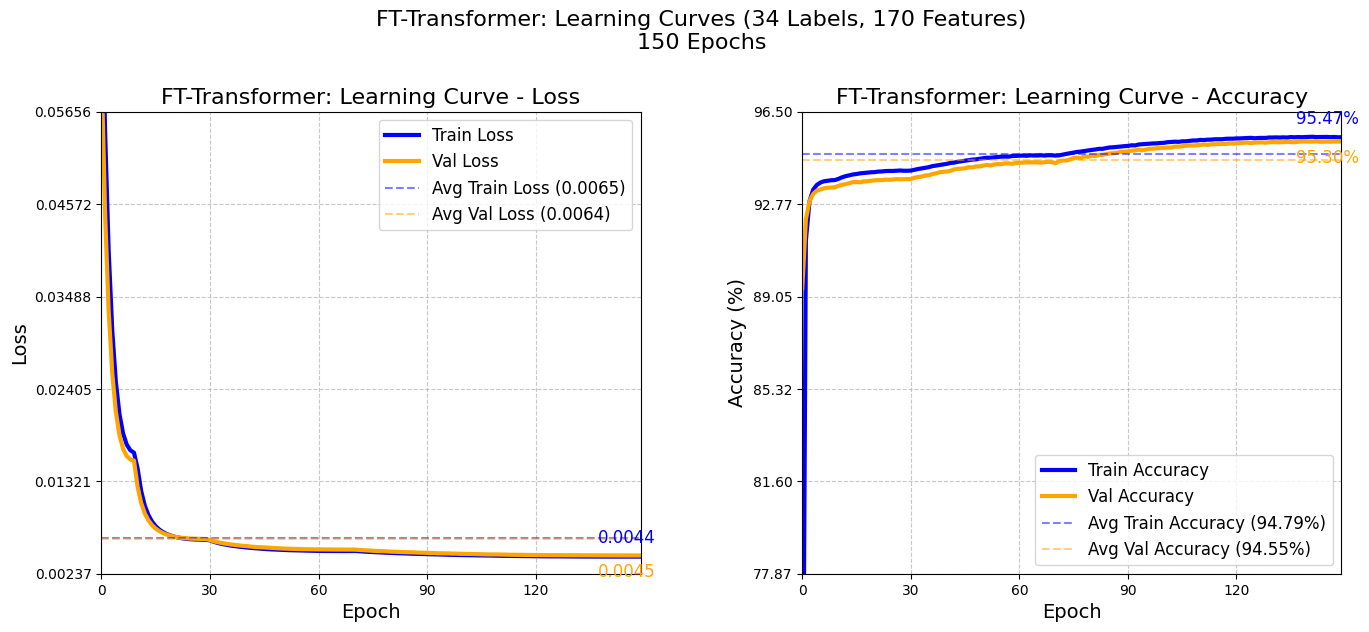

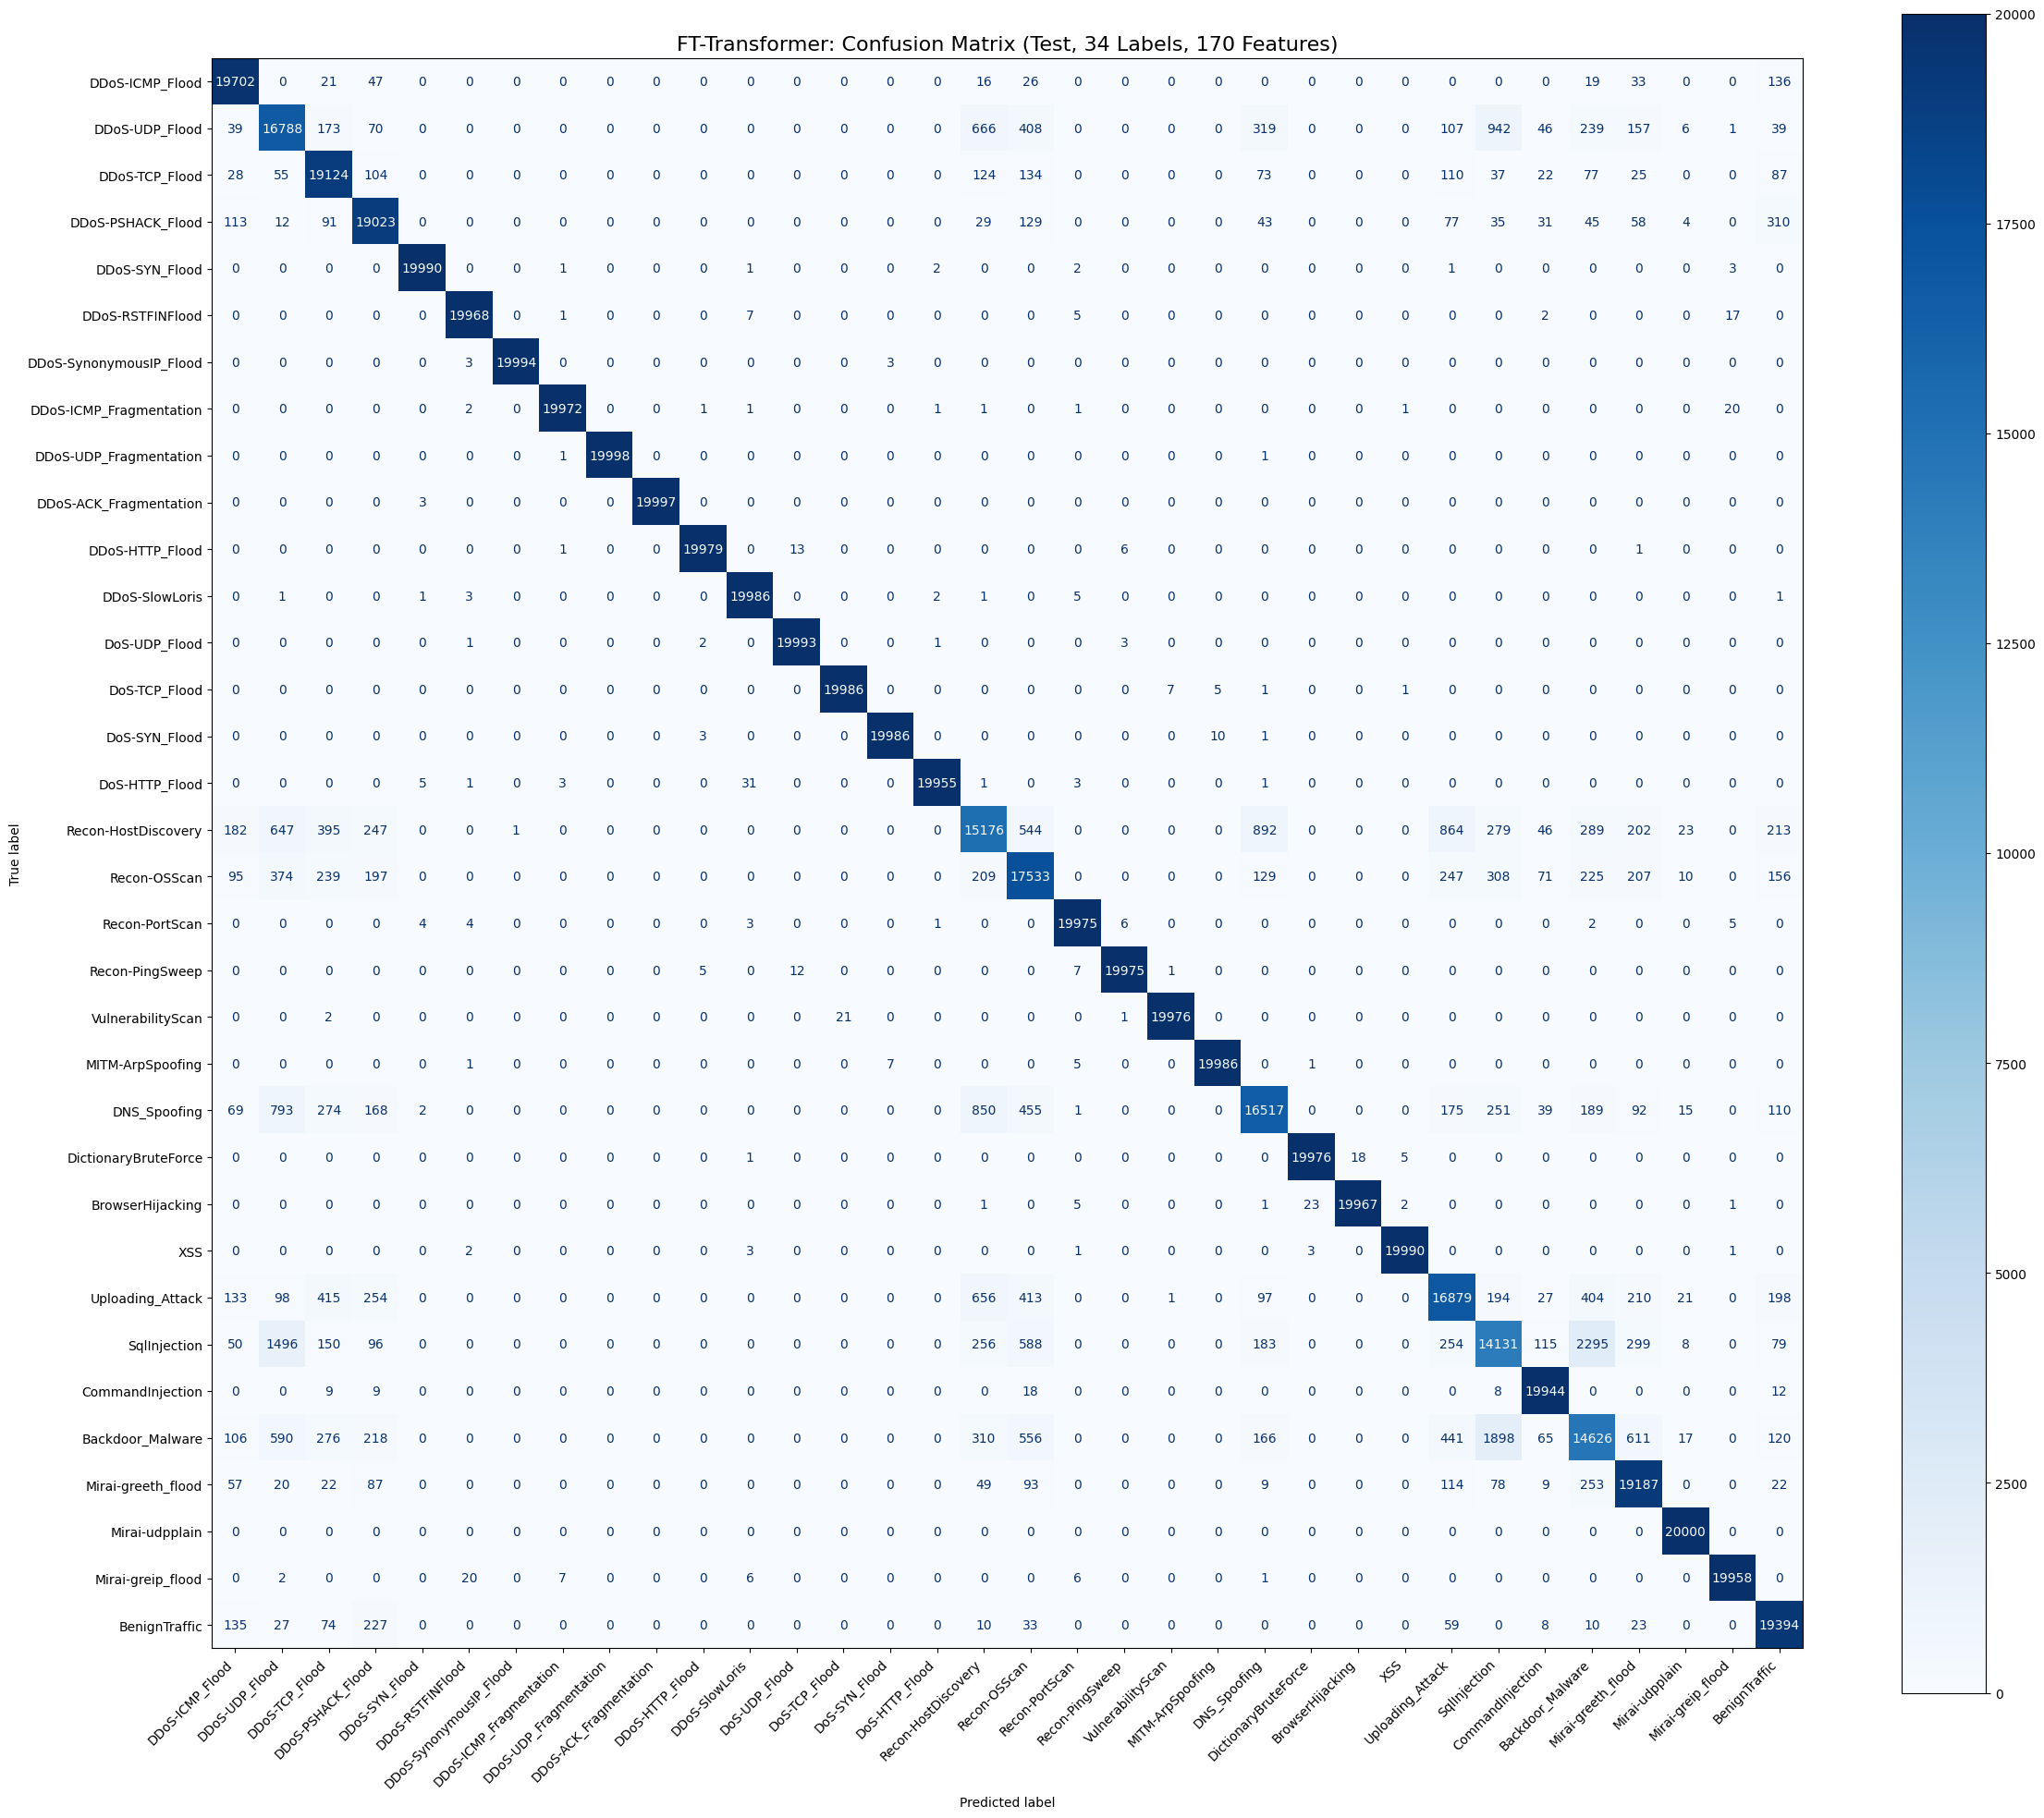

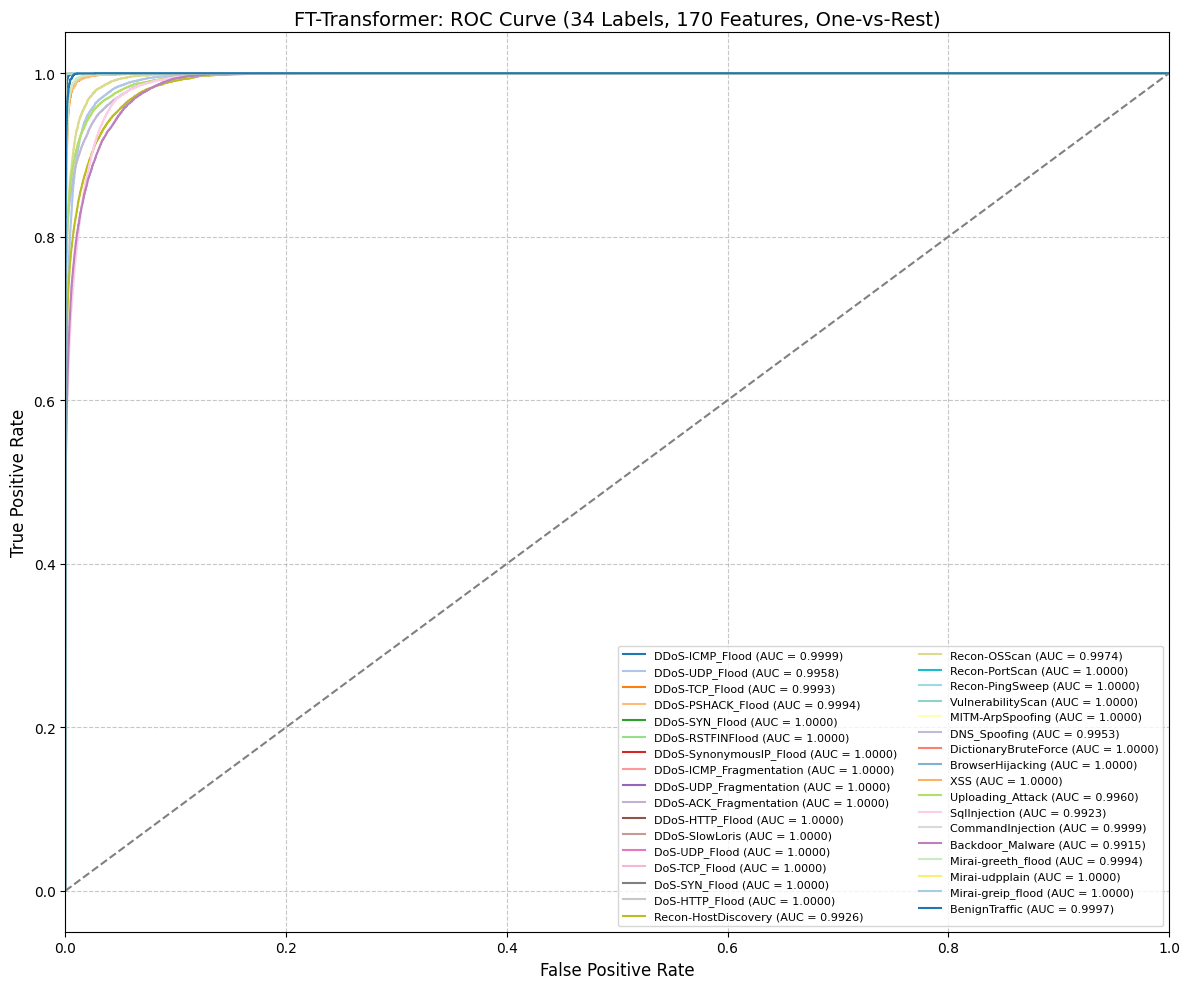

📈 FT-Transformer Macro-average ROC-AUC Score (34 Labels): 0.9988
Shape of test_features: (680000, 34)


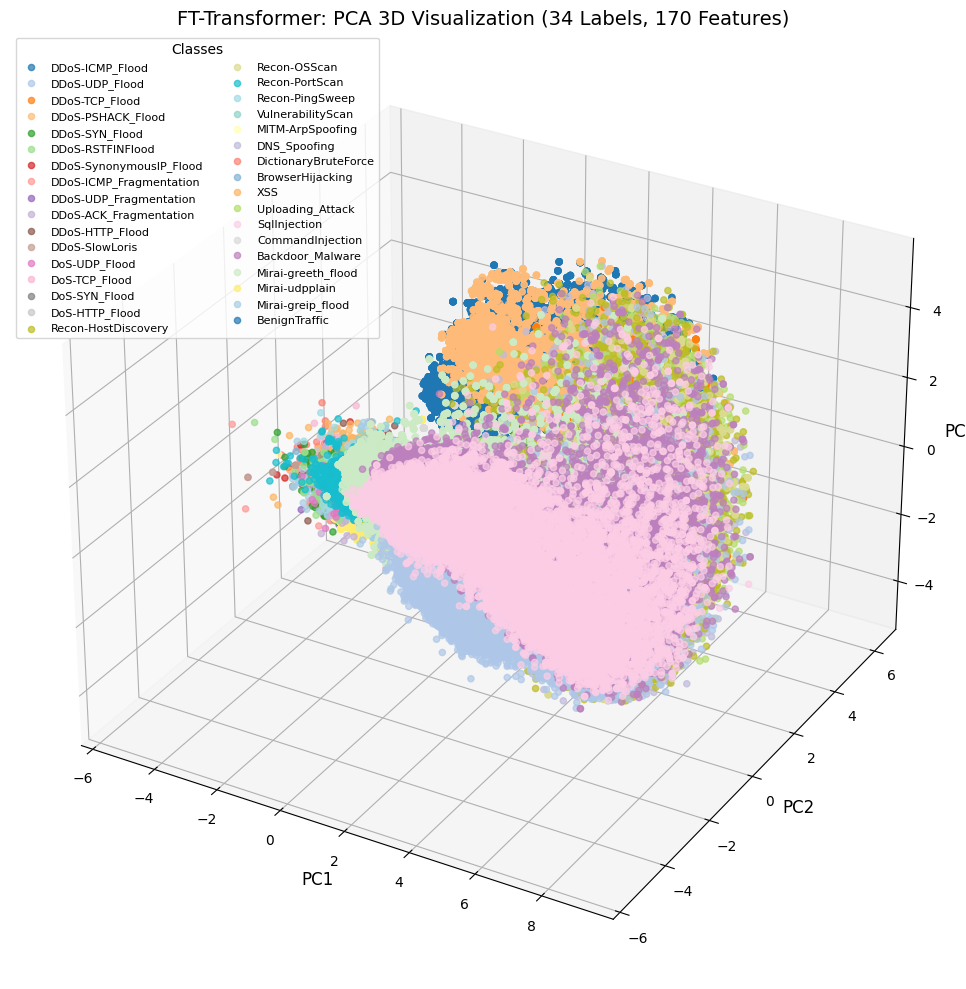

⚠️ Không vẽ Feature Importance vì thiếu file feature_importance.
⏱️ FT-Transformer Thời gian huấn luyện trung bình mỗi epoch: 54.35 giây

📊 FT-Transformer Giá trị trung bình (150 epoch):
Train Loss trung bình: 0.0070
Val Loss trung bình: 0.0068
Train Accuracy trung bình: 94.59%
Val Accuracy trung bình: 94.51%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_fttransformer_pure.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_fttransformer_pure.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_fttransformer_pure.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_fttransformer_pure.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_fttransformer_pure.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_fttransformer_pure.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_fttransformer_pure.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_fttransformer_pure.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_fttransformer_pure.npy")
    # Feature importance có thể không có, thêm try-except
    try:
        feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_fttransformer_pure.npy")
    except FileNotFoundError:
        print("⚠️ File feature_importance không tồn tại. Bỏ qua phần Feature Importance.")
        feature_importance = None
    print("✅ Đã tải dữ liệu cho FT-Transformer (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("FT-Transformer: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("FT-Transformer: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
ax2.set_ylim(77.87, 95.5)  # Giữ đồng bộ với DCN-V2
ax2.set_yticks(np.linspace(77.87, 96.5, 6))
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("FT-Transformer: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_fttransformer_pure_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("FT-Transformer: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_fttransformer_pure_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("FT-Transformer: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_fttransformer_pure_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 FT-Transformer Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("FT-Transformer: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_fttransformer_pure_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
if feature_importance is not None:
    print(f"Shape of feature_importance: {feature_importance.shape}")
    if len(feature_importance.shape) == 2:
        avg_importance = np.mean(feature_importance, axis=0)
    else:
        avg_importance = feature_importance

    input_dim = 170
    selected_features = [f"Feature_{i+1}" for i in range(170)]  # Placeholder
    feature_labels = selected_features

    top_k = 20
    top_indices = np.argsort(avg_importance)[-top_k:]
    top_importance = avg_importance[top_indices]
    top_labels = [feature_labels[i] for i in top_indices]

    plt.figure(figsize=(14, 6))
    plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
    plt.xlabel("Feature", fontsize=12)
    plt.ylabel("Importance Score", fontsize=12)
    plt.title("FT-Transformer: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{results_dir}/feature_importance_fttransformer_pure_34labels_170features.png")
    plt.show()
else:
    print("⚠️ Không vẽ Feature Importance vì thiếu file feature_importance.")

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ FT-Transformer Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 FT-Transformer Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **CODE TẢI KẾT QUẢ**

In [8]:
import os
import zipfile
from IPython.display import FileLink

# Đường dẫn đến các thư mục
processed_data_dir = "/kaggle/working/processed_data"
results_dir = "/kaggle/working/results"

# Tạo file ZIP cho thư mục processed_data
# processed_zip = "/kaggle/working/processed_data.zip"
# with zipfile.ZipFile(processed_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(processed_data_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Thêm file vào ZIP với đường dẫn tương đối
#             zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Tạo file ZIP cho thư mục results
results_zip = "/kaggle/working/results.zip"
with zipfile.ZipFile(results_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Thêm file vào ZIP với đường dẫn tương đối
            zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Hiển thị liên kết tải xuống
# print("Tải xuống processed_data.zip:")
# display(FileLink("processed_data.zip"))

print("Tải xuống results.zip:")
display(FileLink("results.zip"))

Tải xuống results.zip:


/kaggle/working/results.zip